In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

# Shallow Water Equations in 1D with Python and Numpy

The one-dimensional (non-rotating small-amplitude gravity wave on a resting basic state, without topography) Shallow Water equations have the form

$$\frac{\partial H}{\partial t} + \hat{H} \frac{\partial (U)}{\partial x} = 0$$

$$\frac{\partial (U)}{\partial t} + g \frac{\partial ( H )}{\partial x} = 0$$

Where $U$ is the velocity, $H$ is the height of the water column and $g$ is the gravitational acceleration.

We will discretize using the FTCS scheme:

$$H^{n+1}_i = H^{n}_i - \hat{H} \frac{\Delta t}{2\Delta x} \left( U^{n}_{i+1} - U^{n}_{i-1}\right)$$

$$U^{n+1}_i = U^{n}_{i} - g \frac{\Delta t}{2\Delta x} \left(H^{n}_{i+1} - H^{n}_{i-1}\right)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
%matplotlib inline

The following function will solve the equations as we've discretized above.  There are two different initial conditions set up here.  The first is a "dam" problem, which simulates a wall of water being suddenly released.  The second is an exponential which simulates the after effect of a drop of water hitting a calm surface.  

The boundary conditions applied here are those of "free boundaries."  Any fluid which reaches the edge of the simulation area is allowed to simply flow out of the viewable window.

In [3]:
def python_1d_shallow(nt, nx, g, xlen, IC=1):
    H = np.zeros(nx)
    HN = np.zeros(nx)
    U = np.zeros(nx)
    UN = np.zeros(nx)
    Hhat = 1.
    
    dx = xlen/(nx-1)
    dt = dx*.125
    x = np.linspace(0,xlen,nx)
    
    if IC == 1:
        H[:nx/2]=3
        H[nx/2:]=1
    
    elif IC == 2:
        x0=xlen/2.
        eps=0.5
        H = 2.0 + eps*np.exp(-(x-x0)**2/0.5)
        
    else:
        return ("invalid IC")
       
    for timestep in range(nt):
        
        H[1:-1] = H[1:-1] - Hhat*dt/(2*dx)  * (U[2:] - U[:-2])
        U[1:-1] = U[1:-1] -    g*dt/(2*dx)  * (H[2:]-  H[:-2])
            
        #Porous boundary conditions
        #H[0]=H[1]
        #H[-1]=H[-2]
        #U[0]=U[1]
        #U[-1]=U[-2]

        #Reflective boundary conditions
        H[0] =H[0] -Hhat*dt/(dx) * U[1]
        H[-1]=H[-1]+Hhat*dt/(dx) * U[-2]
        U[0]=0.
        U[-1]=0.


    return H


##Visualizing results with the "dam" initial condition

Let's take a look at a JSanimation of our results for the dam break initial conditions.  We'll set up our problem as follows:

*  $nx = 101$
*  $g = 1$
*  $xlen = 4$

and we'll look at 100 frames (which corresponds to 100 timesteps)

##Visualizing results with the "droplet" initial condition

Let's take a look at a JSanimation of our results for the droplet initial conditions.  We'll use the same setup except specify to the solver to use our second set of initial conditions.  



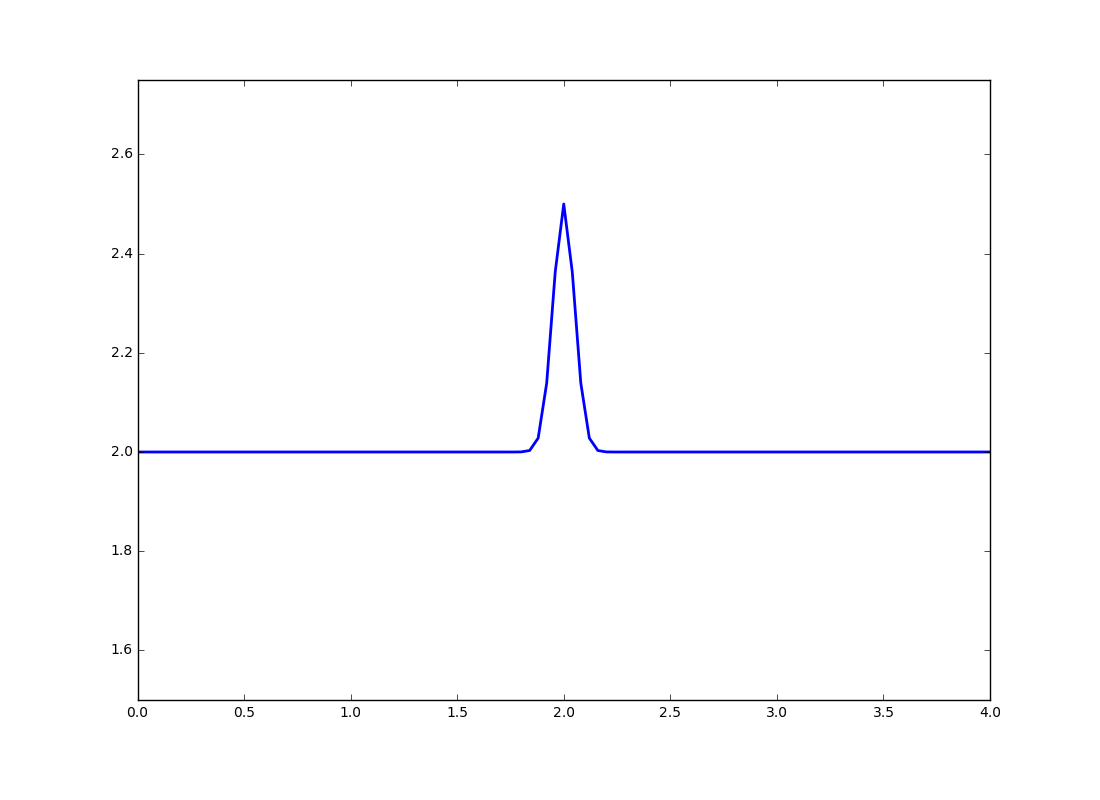
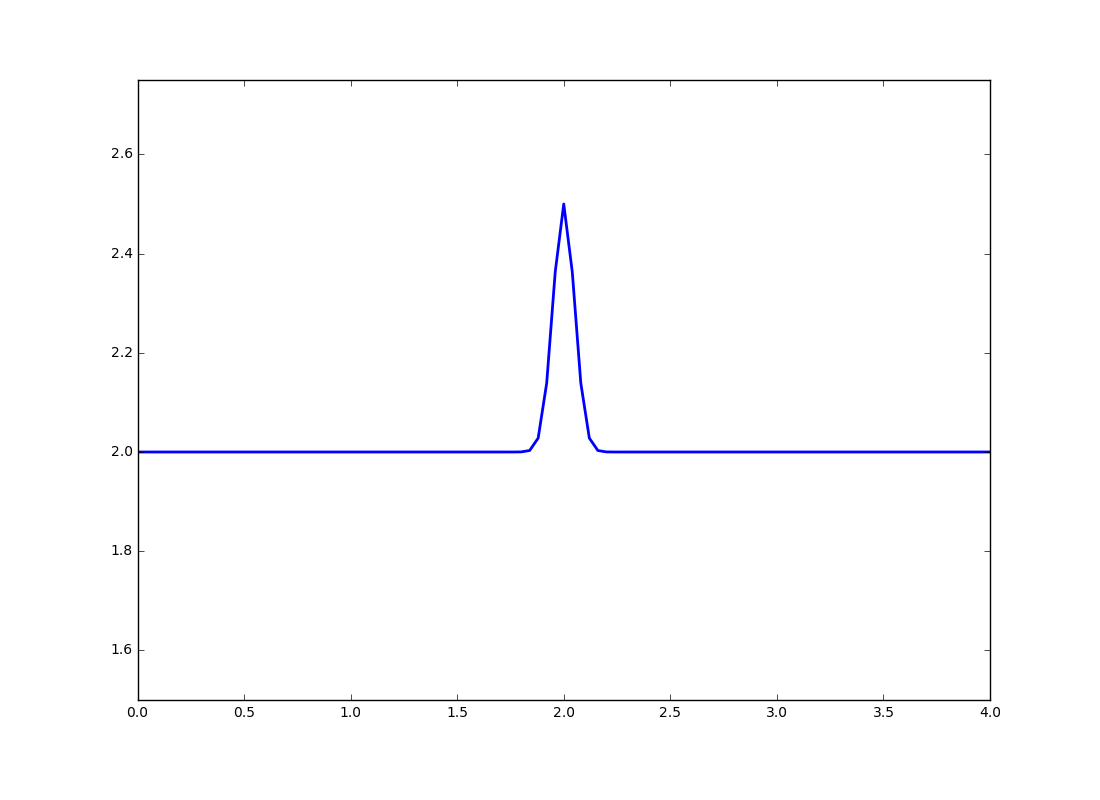
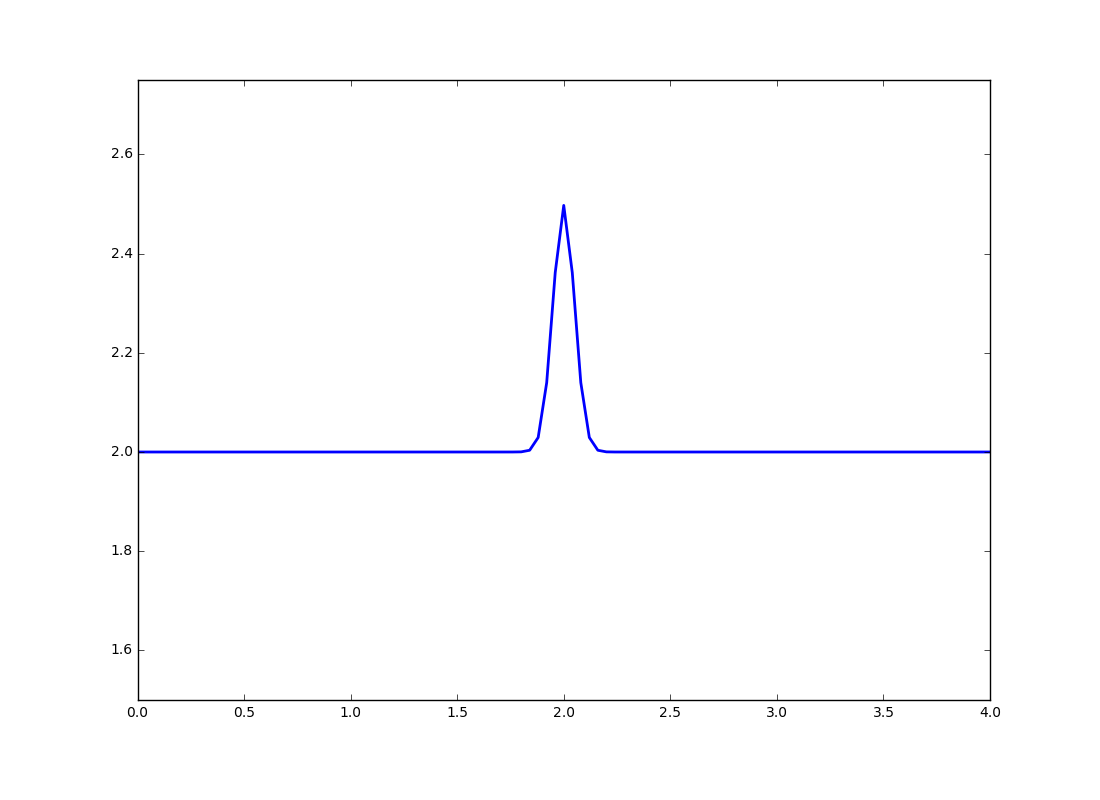
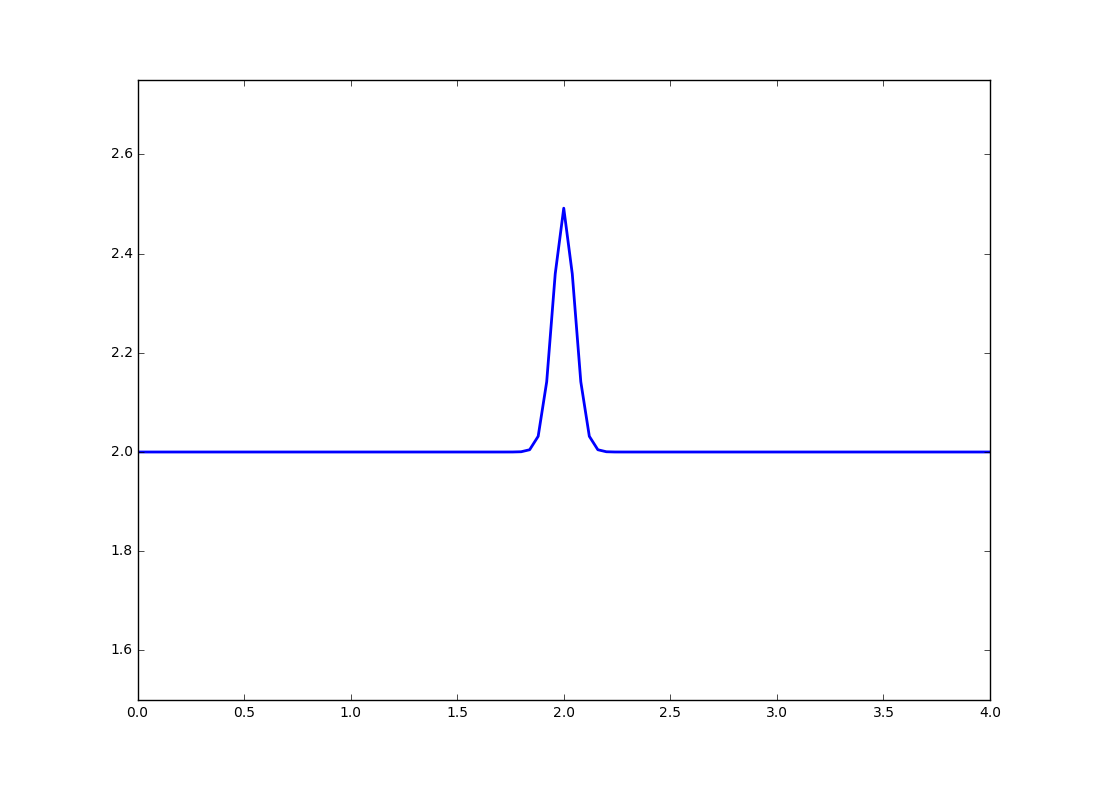
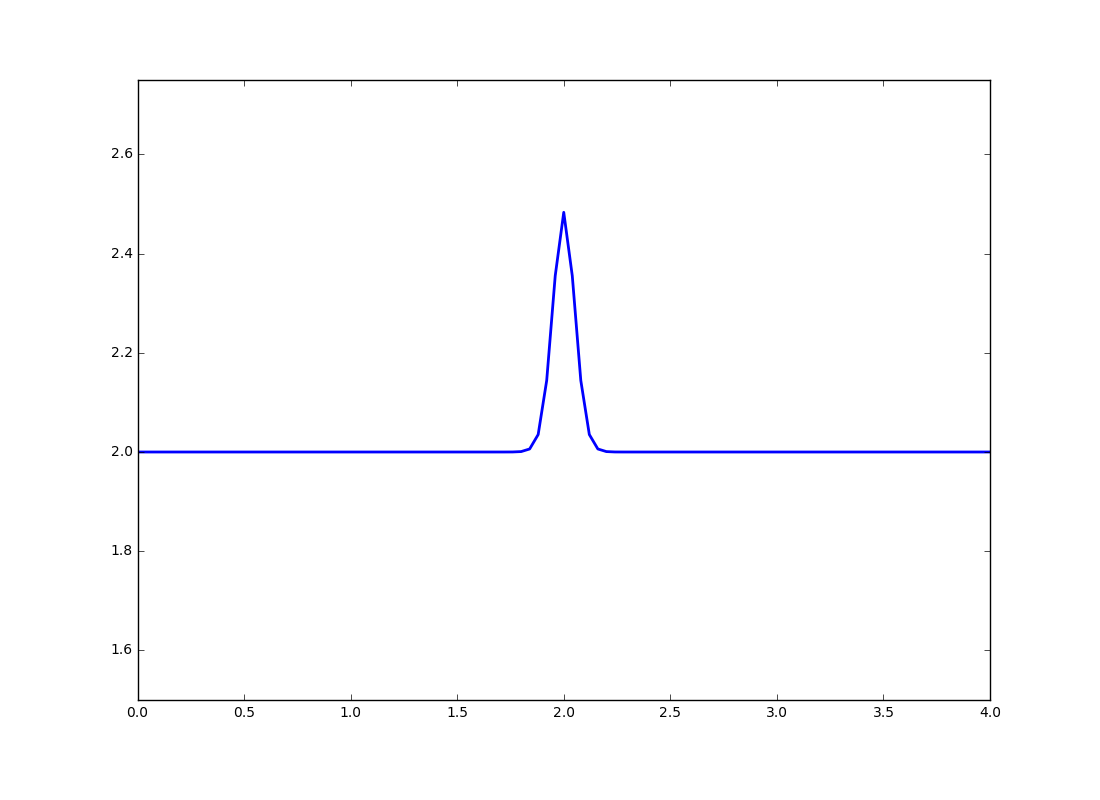
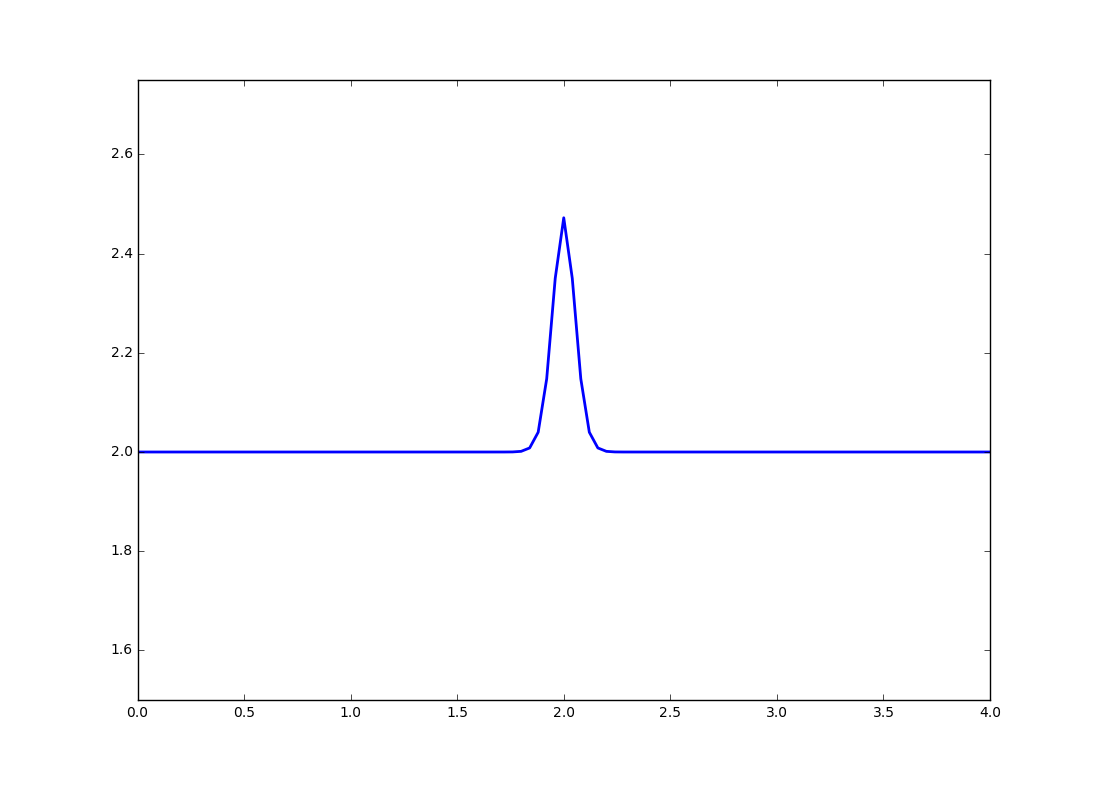
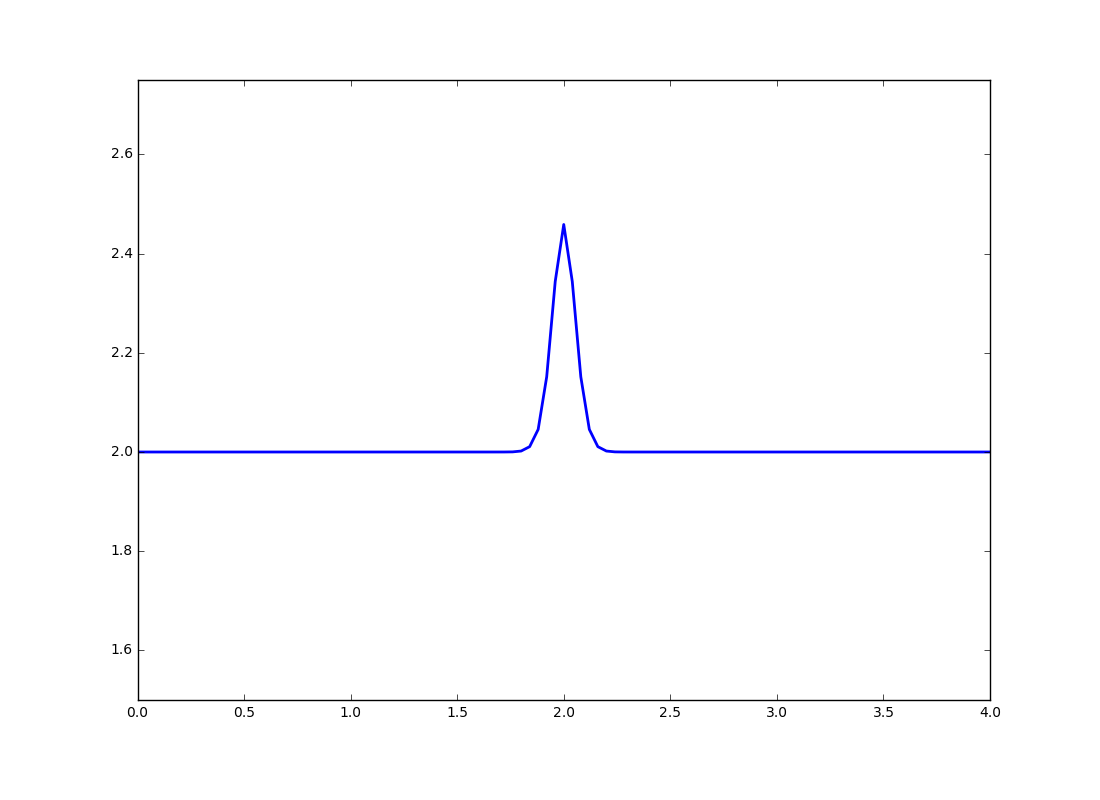
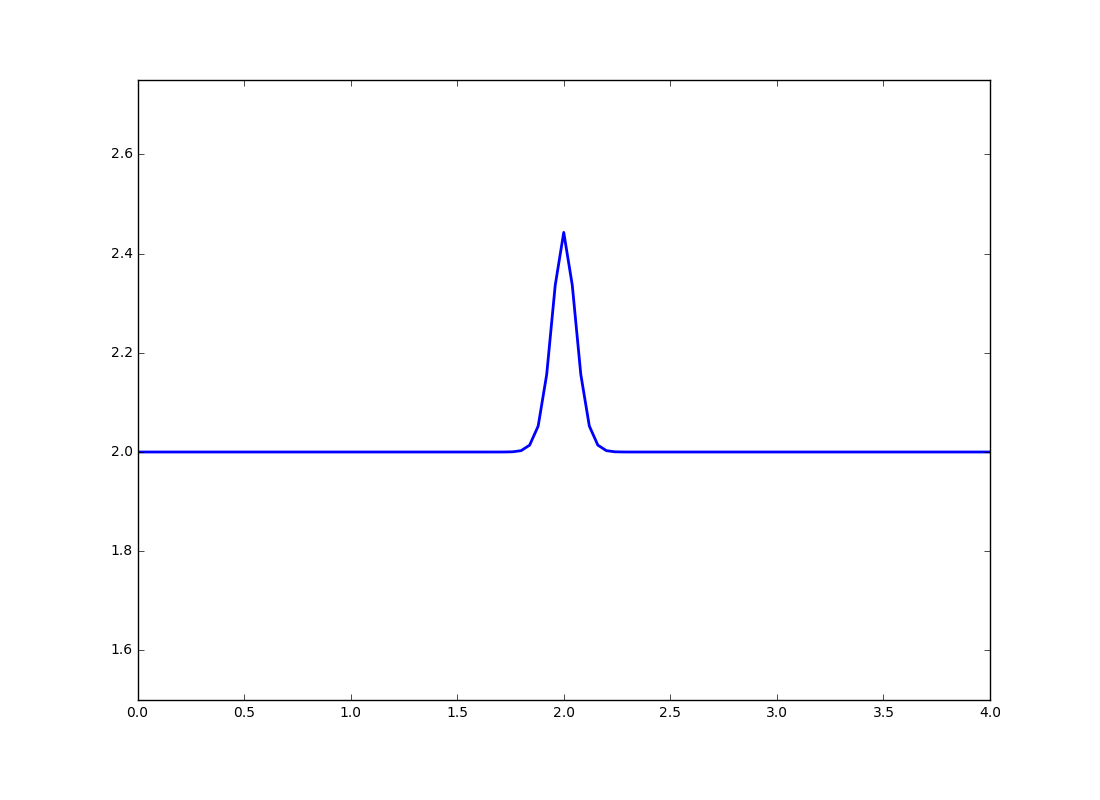
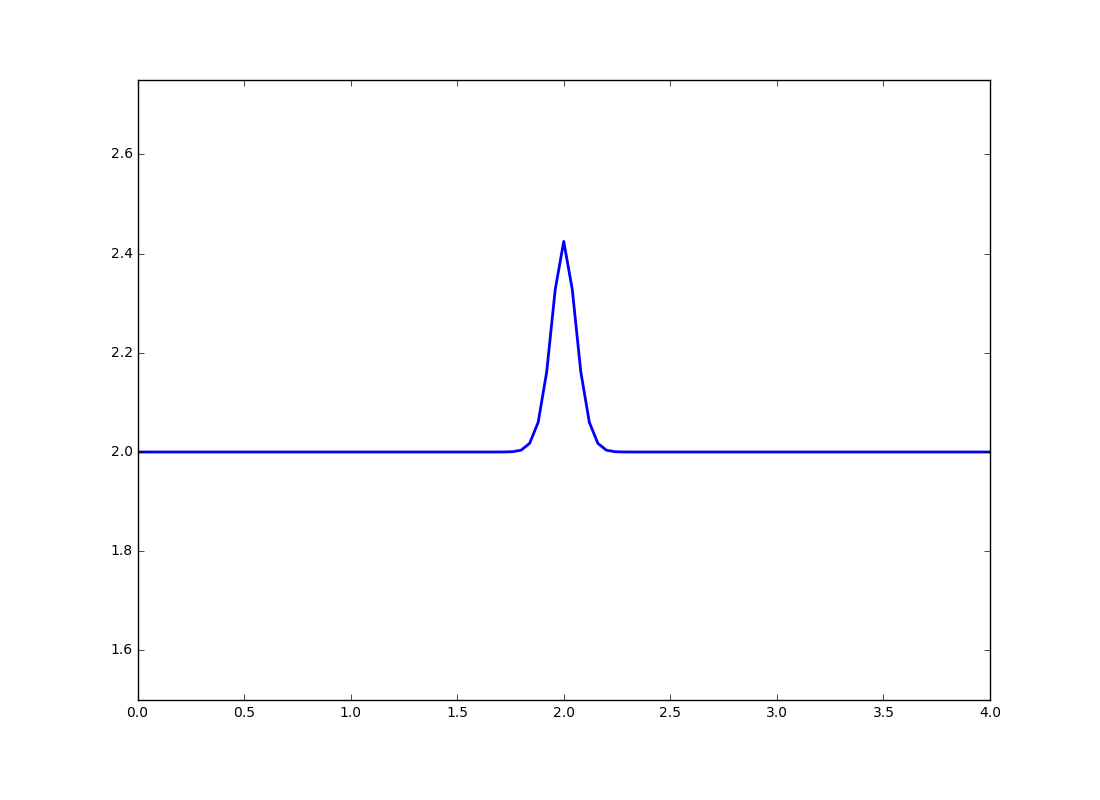
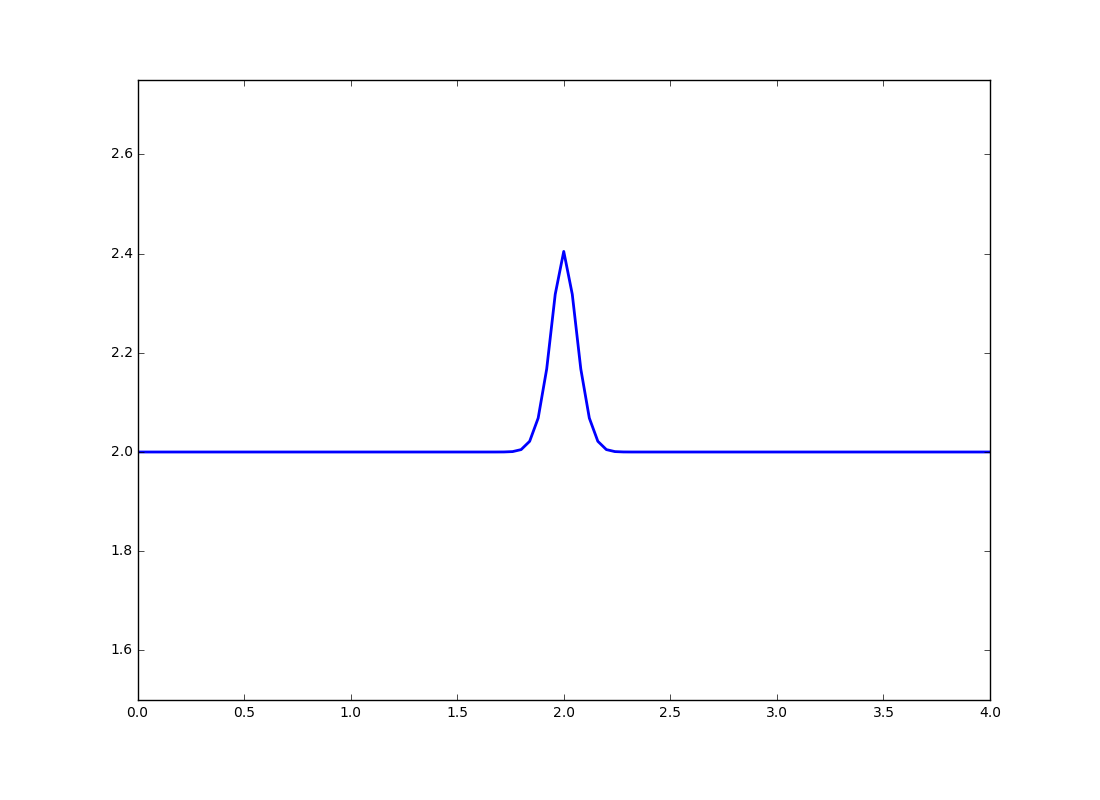
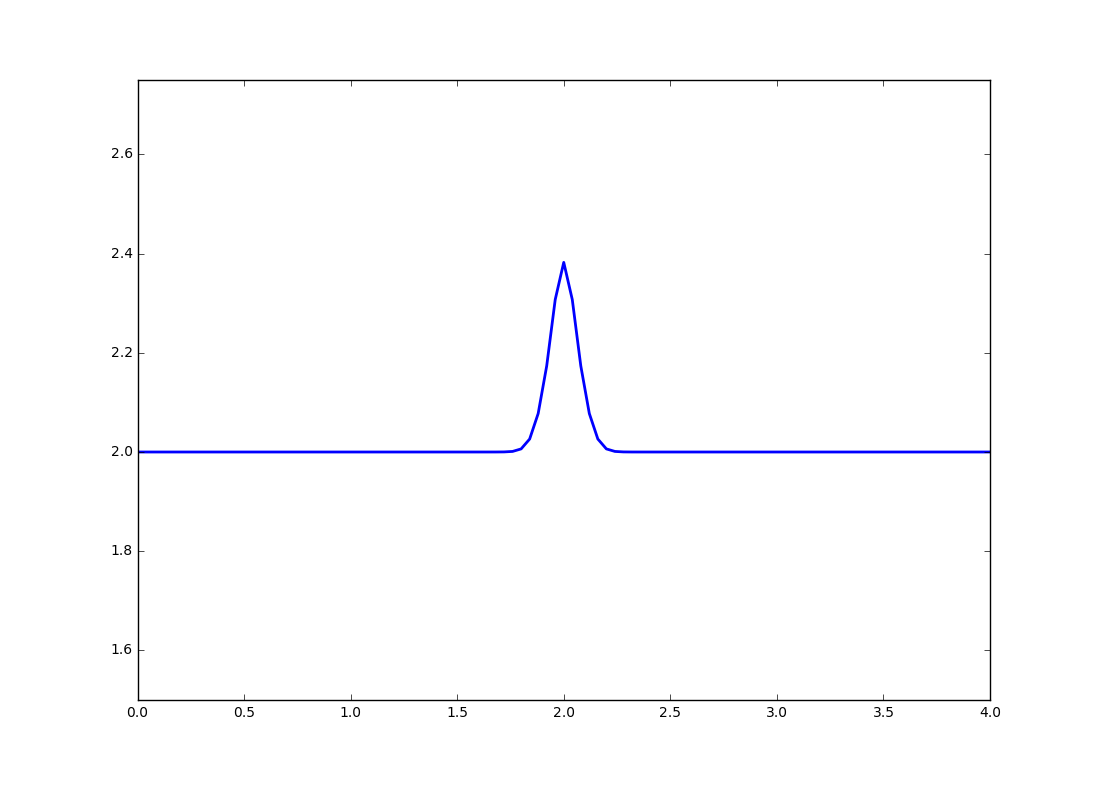
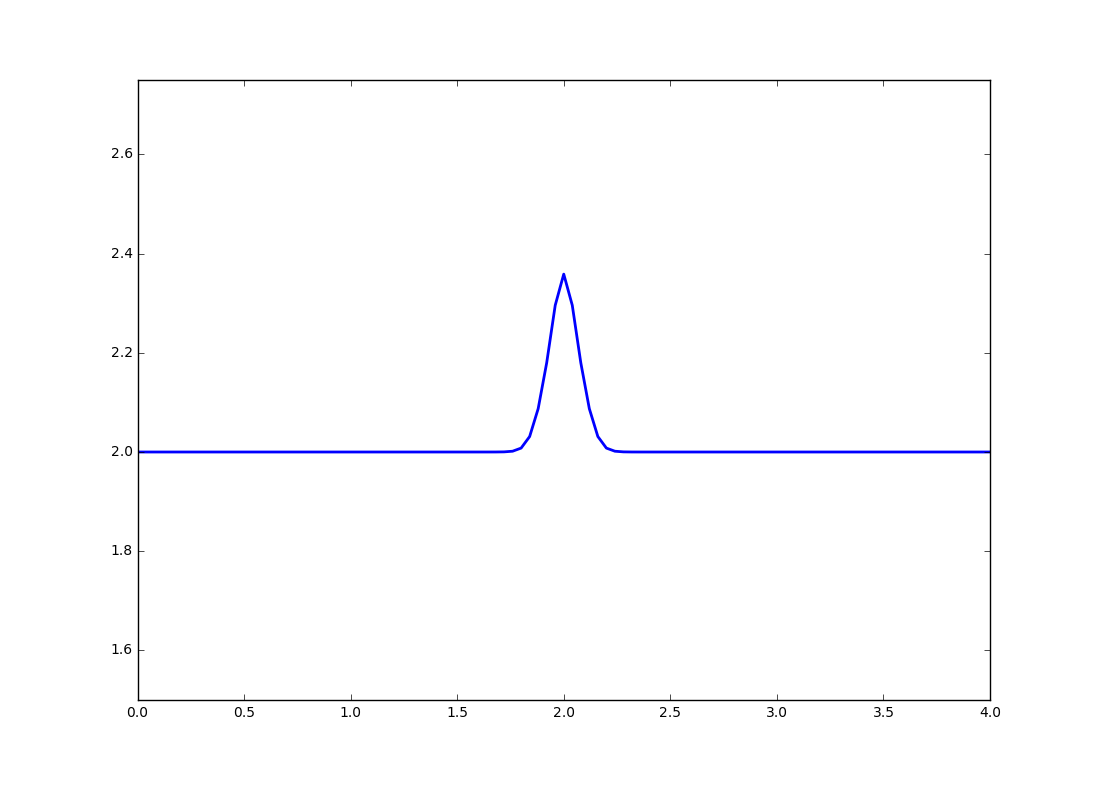
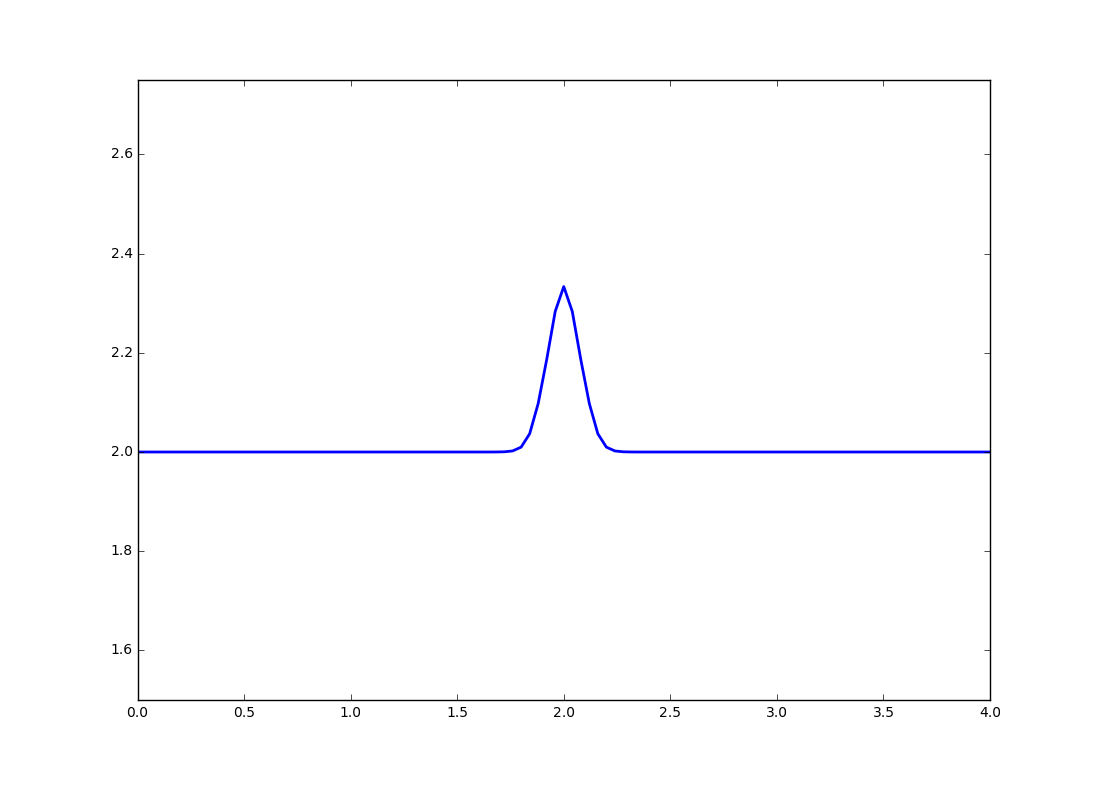
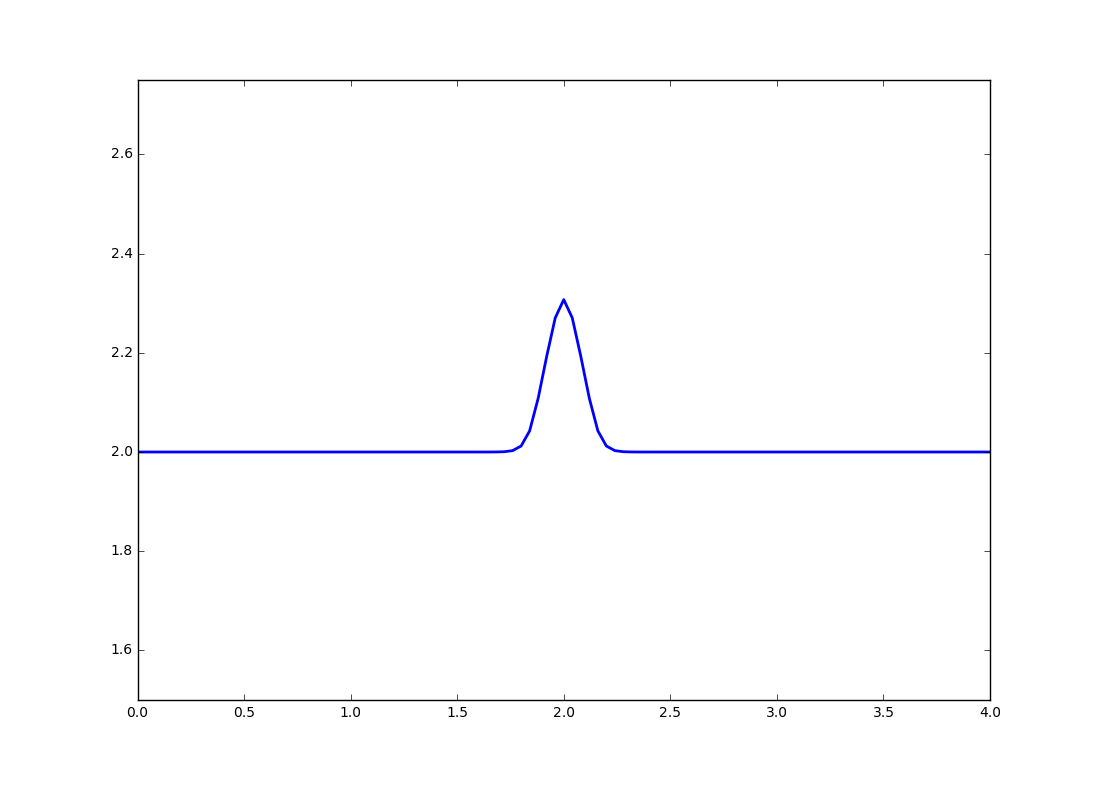
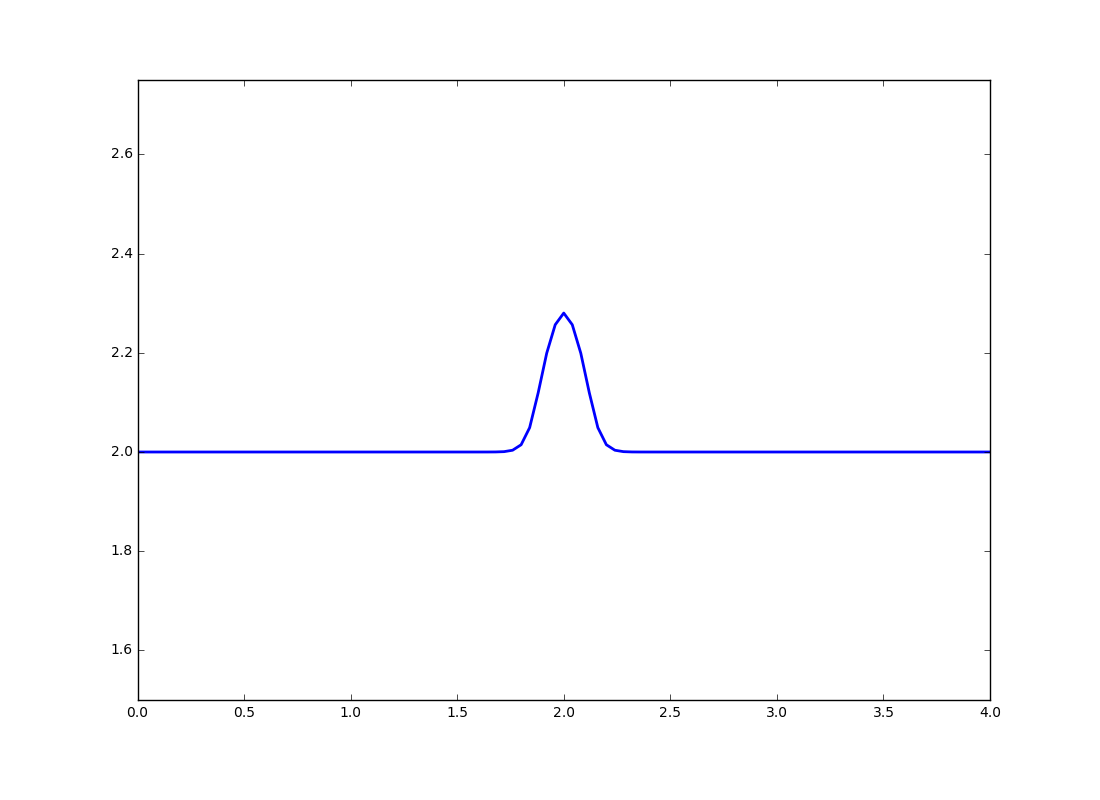
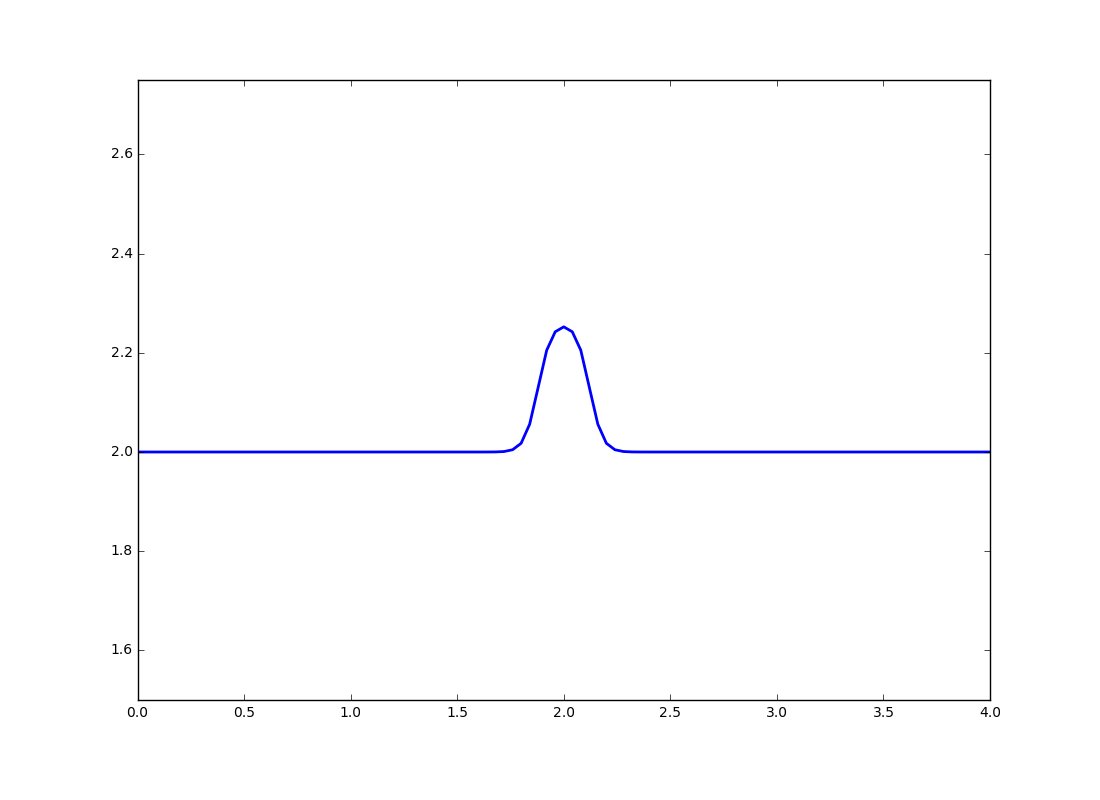
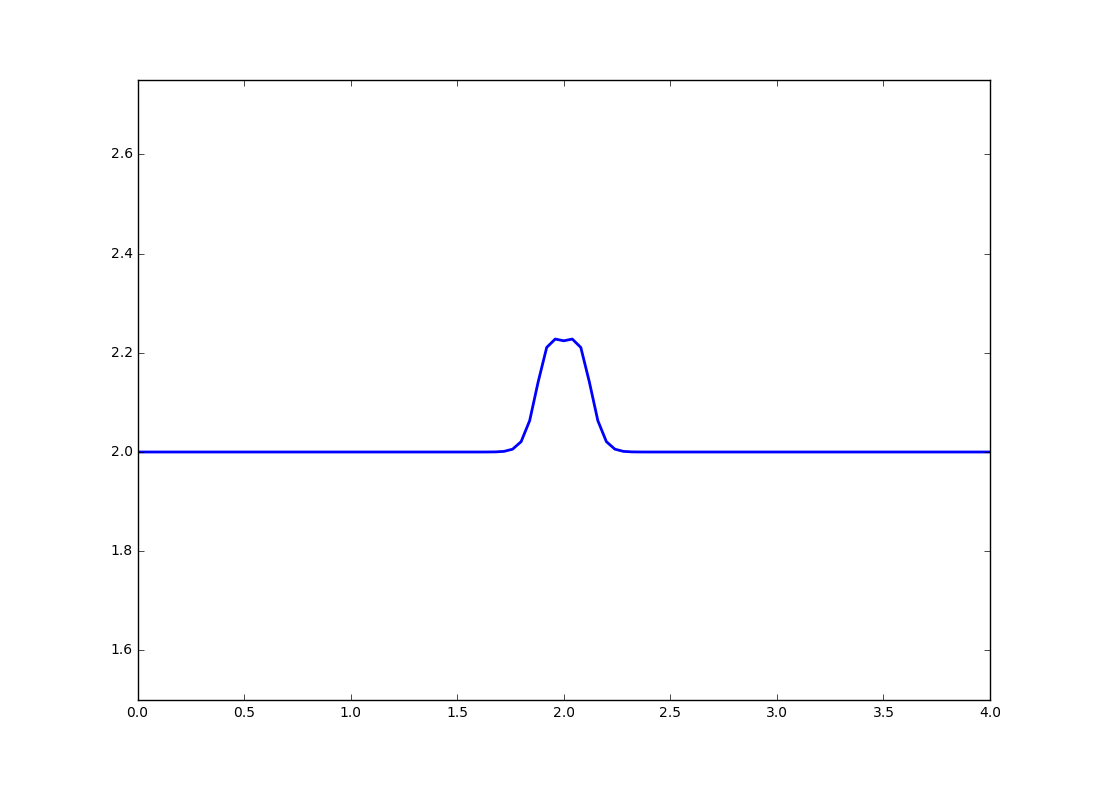
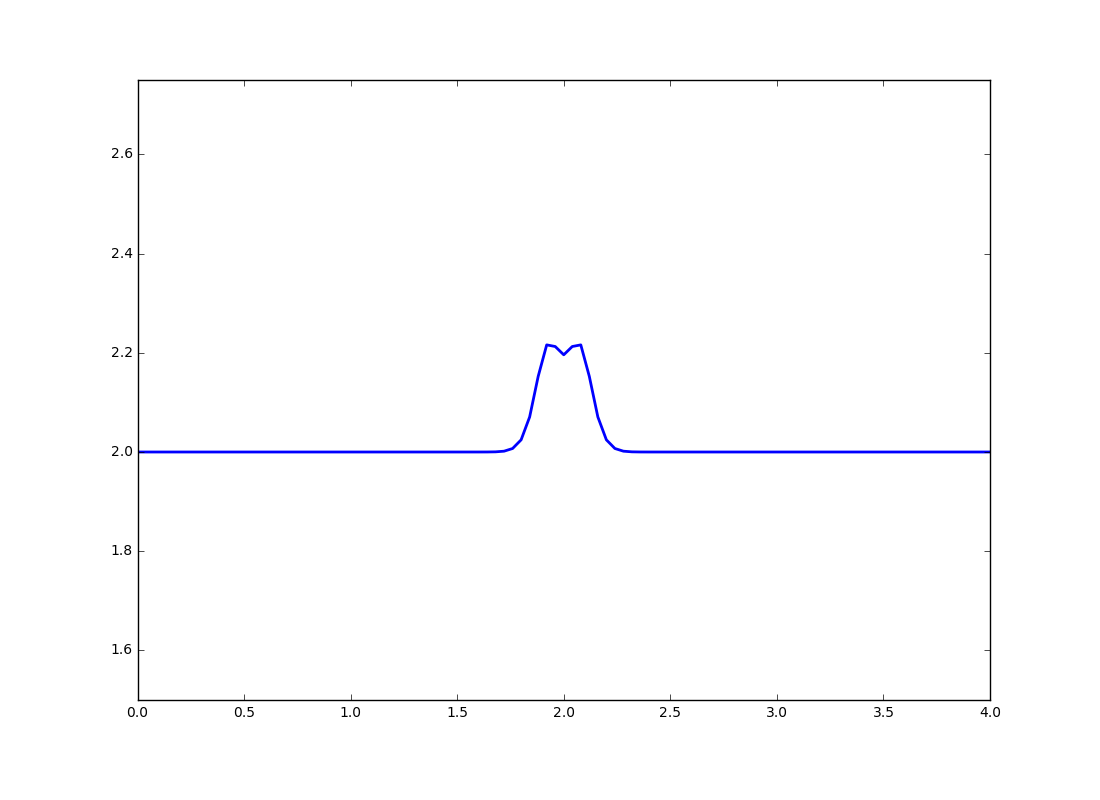
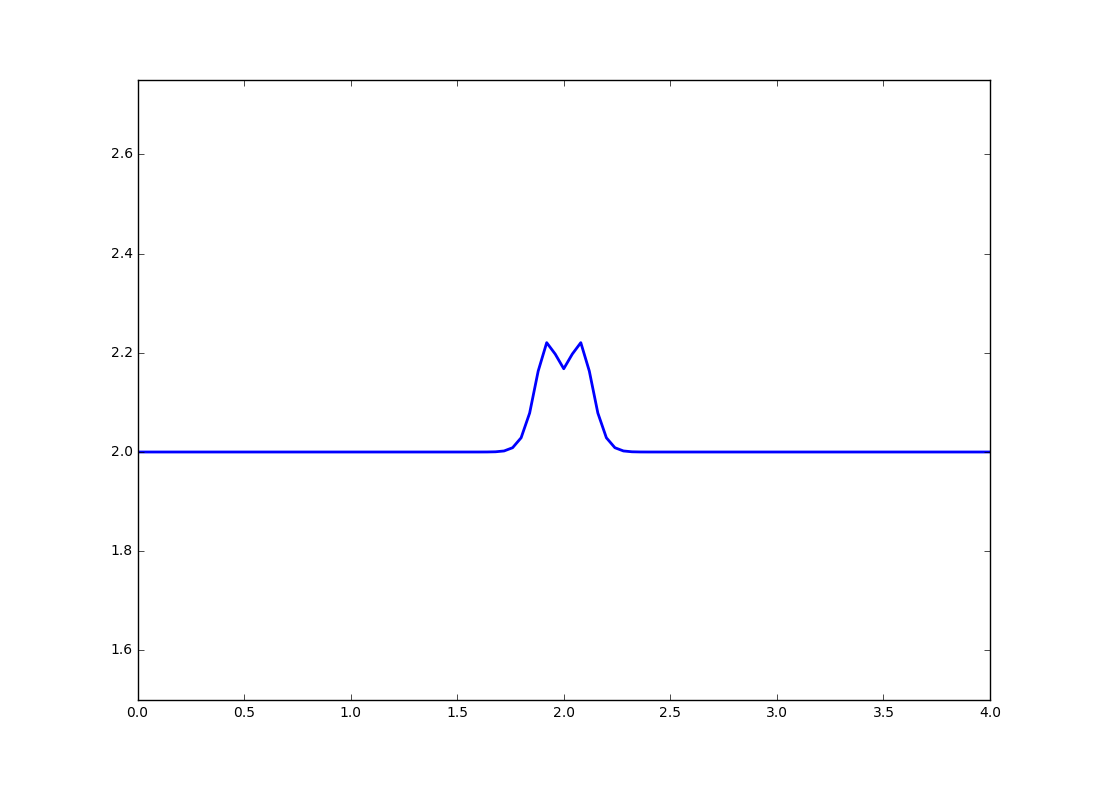
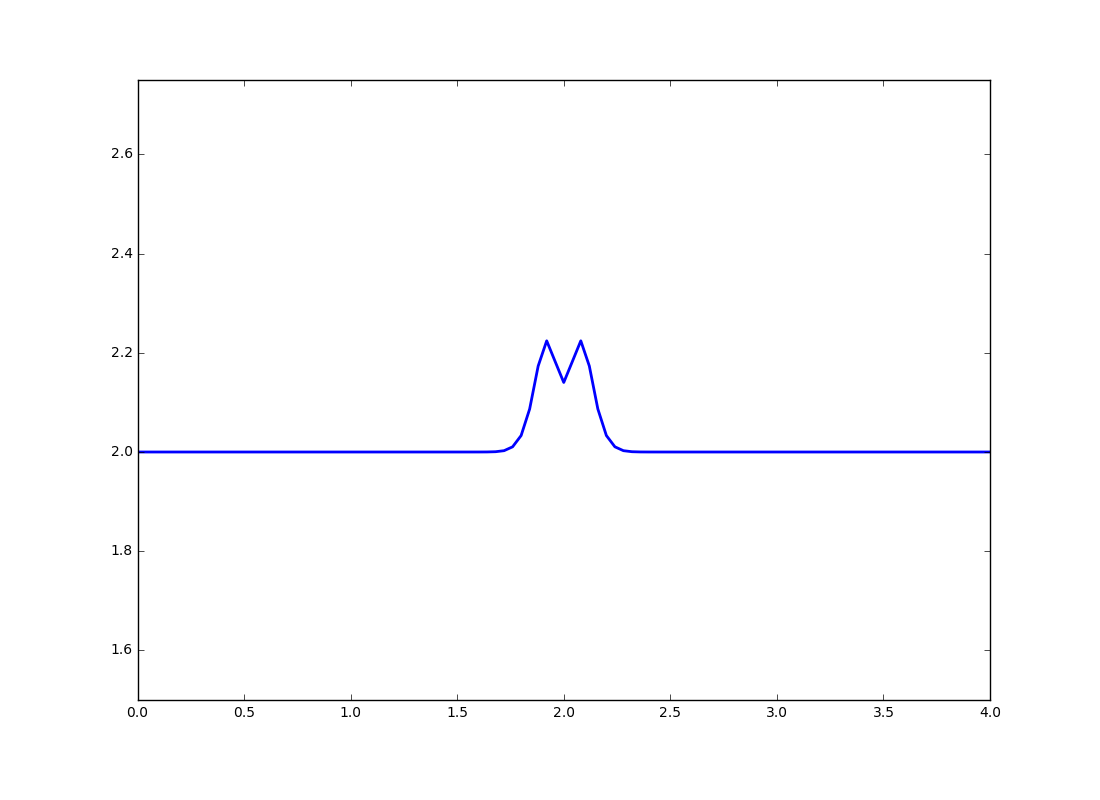
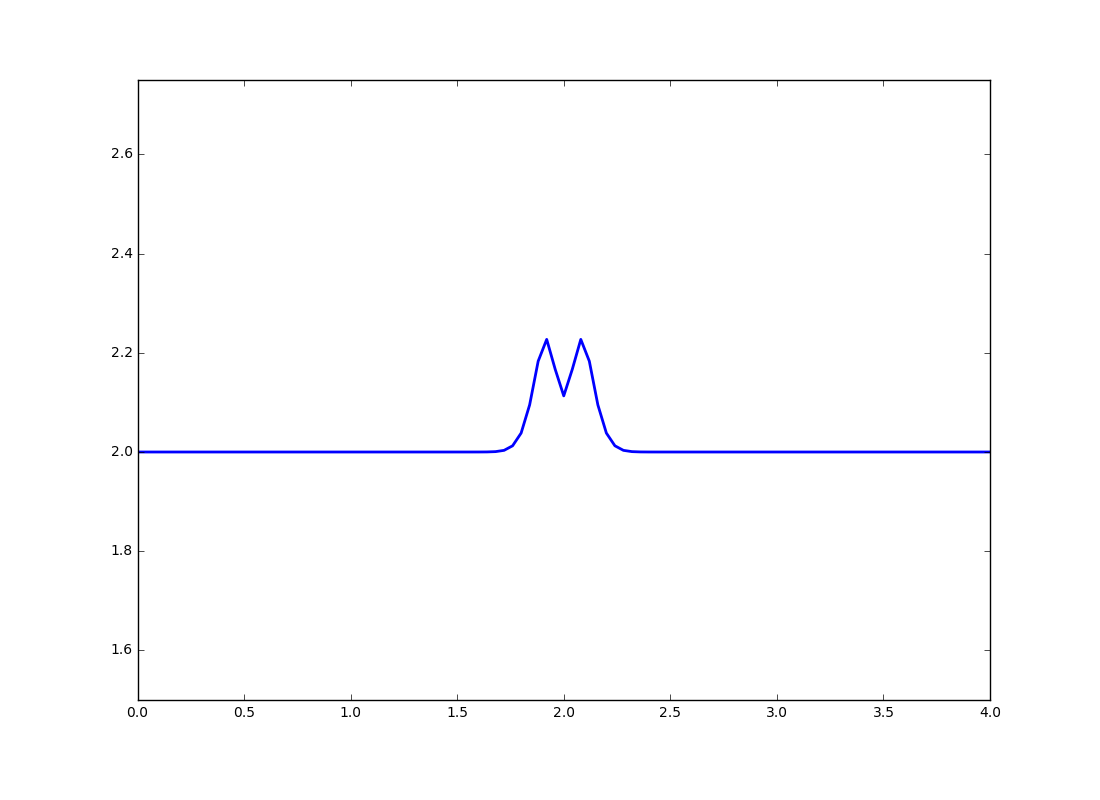
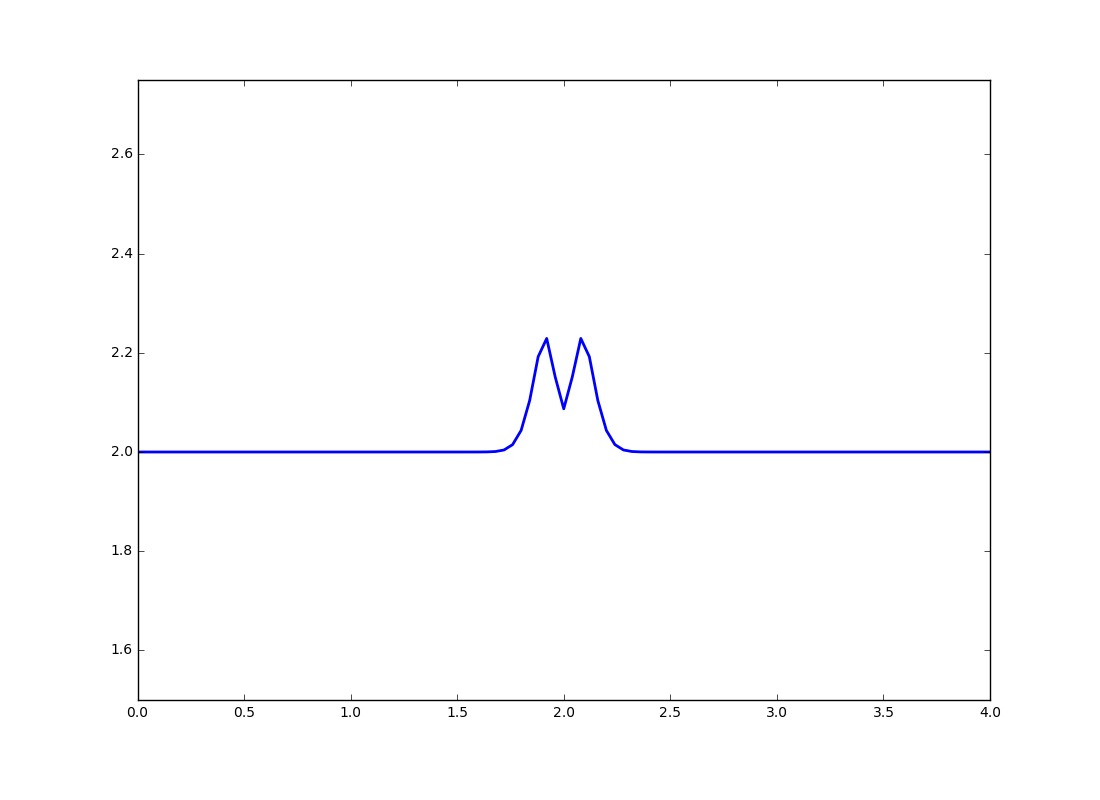
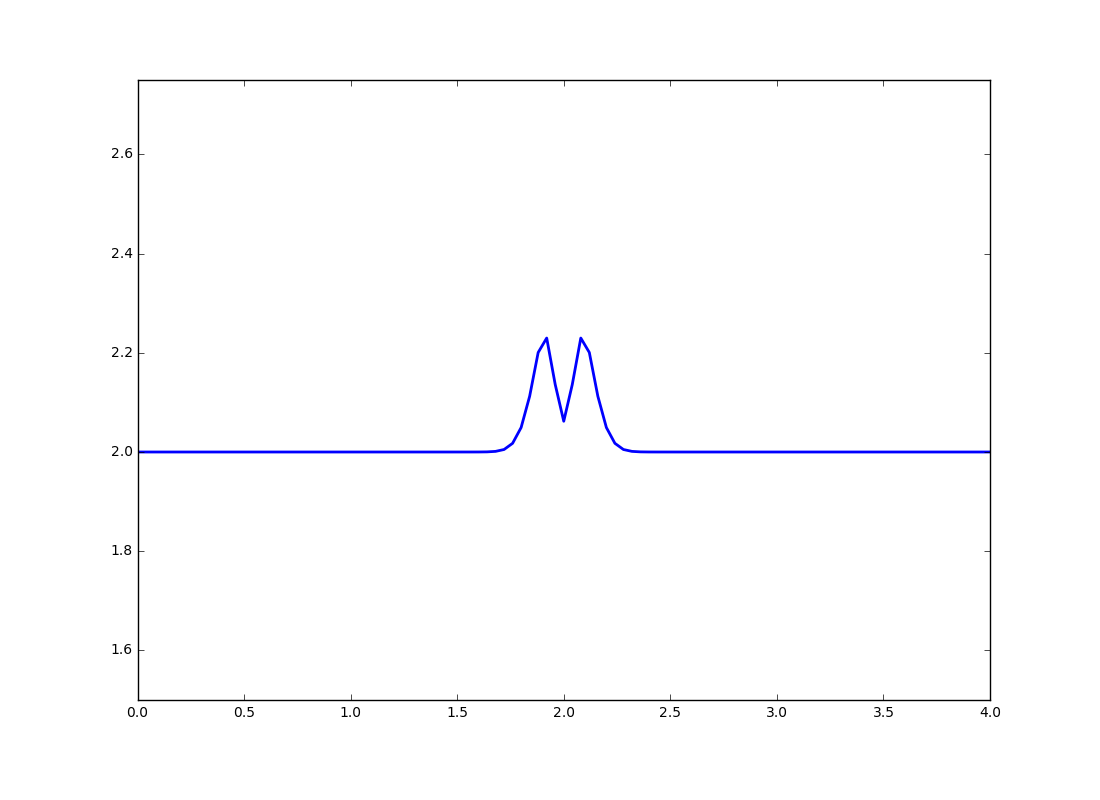
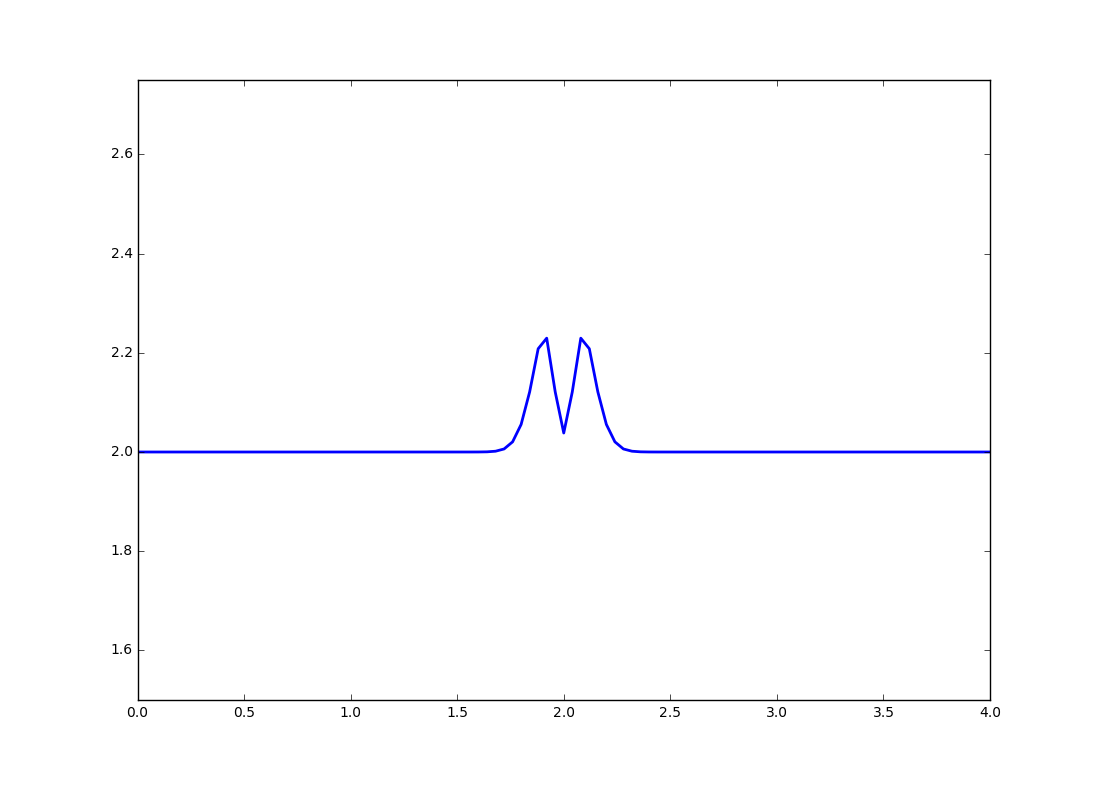
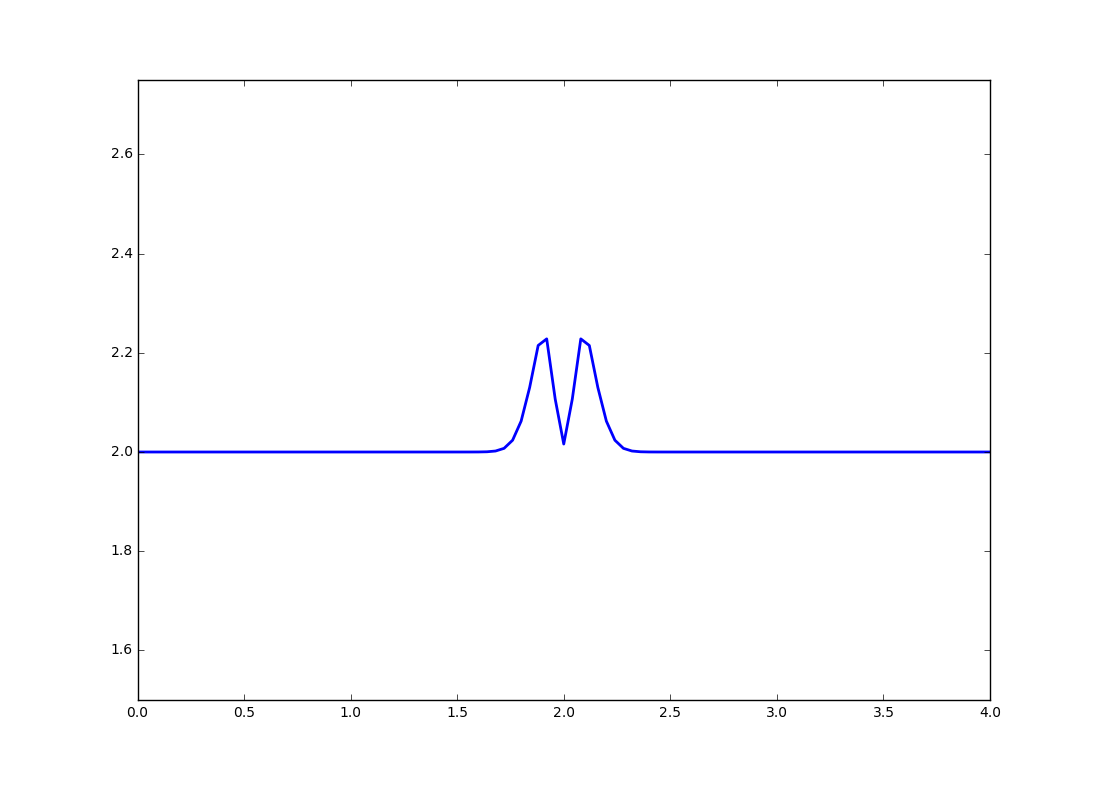
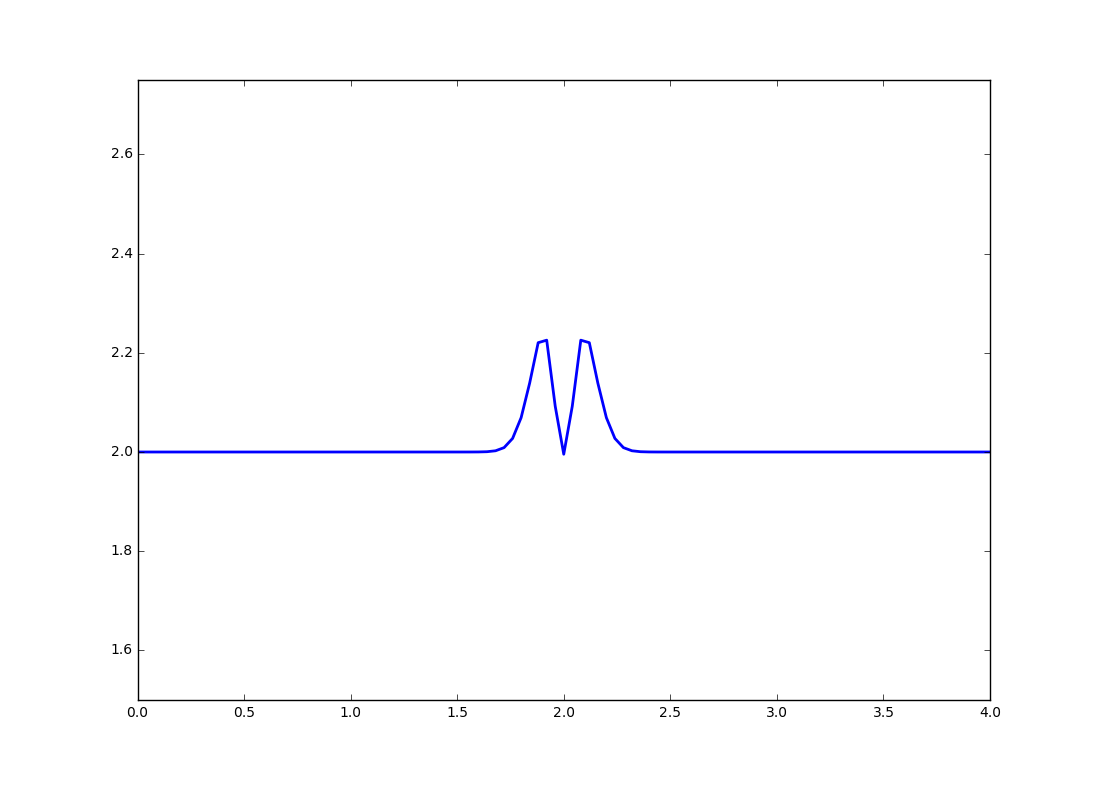
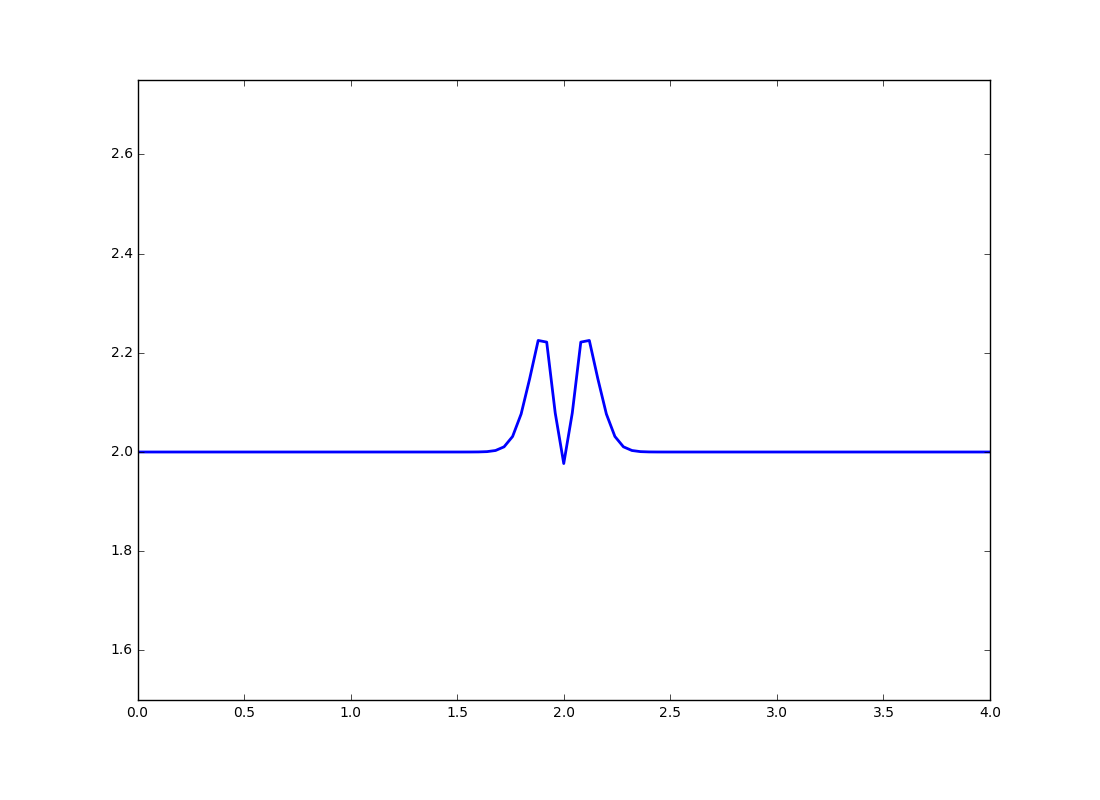
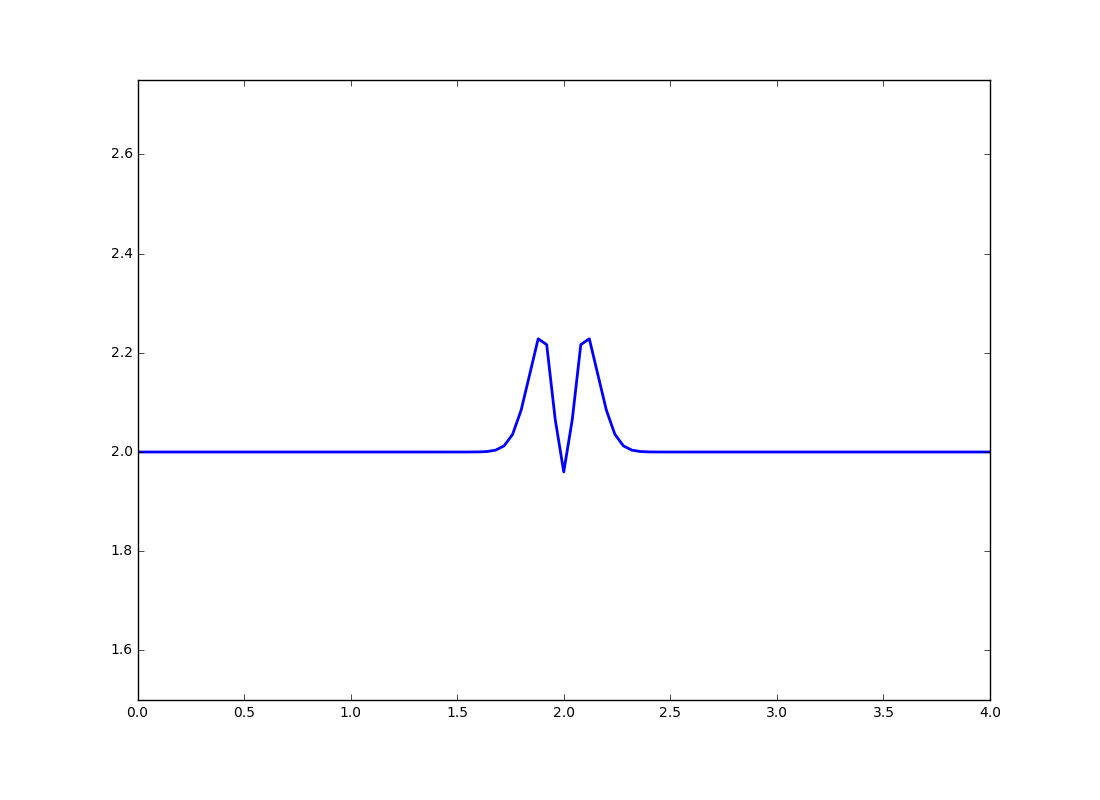
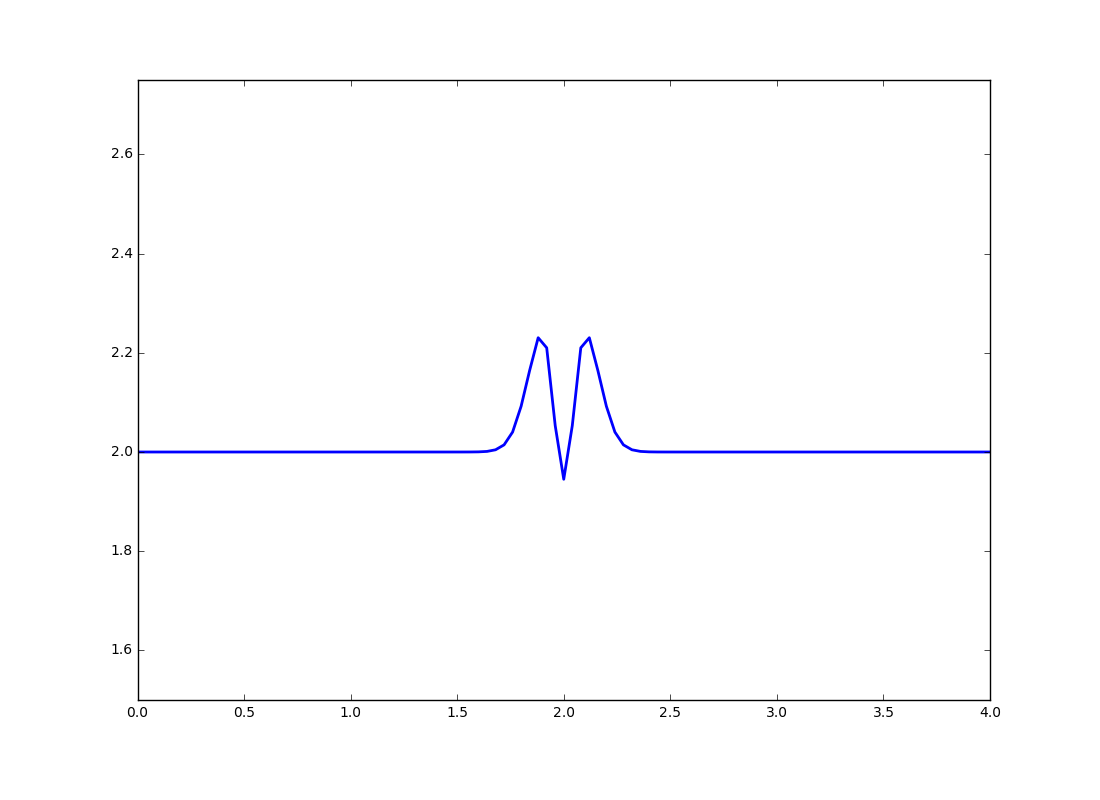
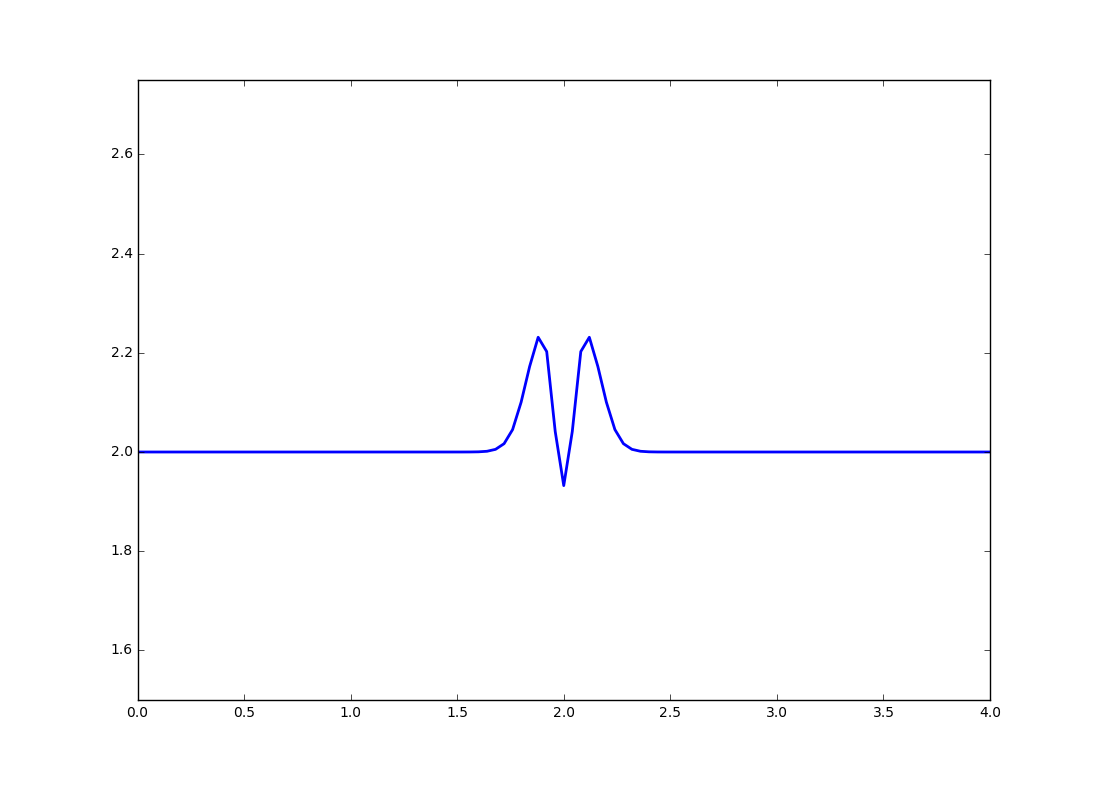
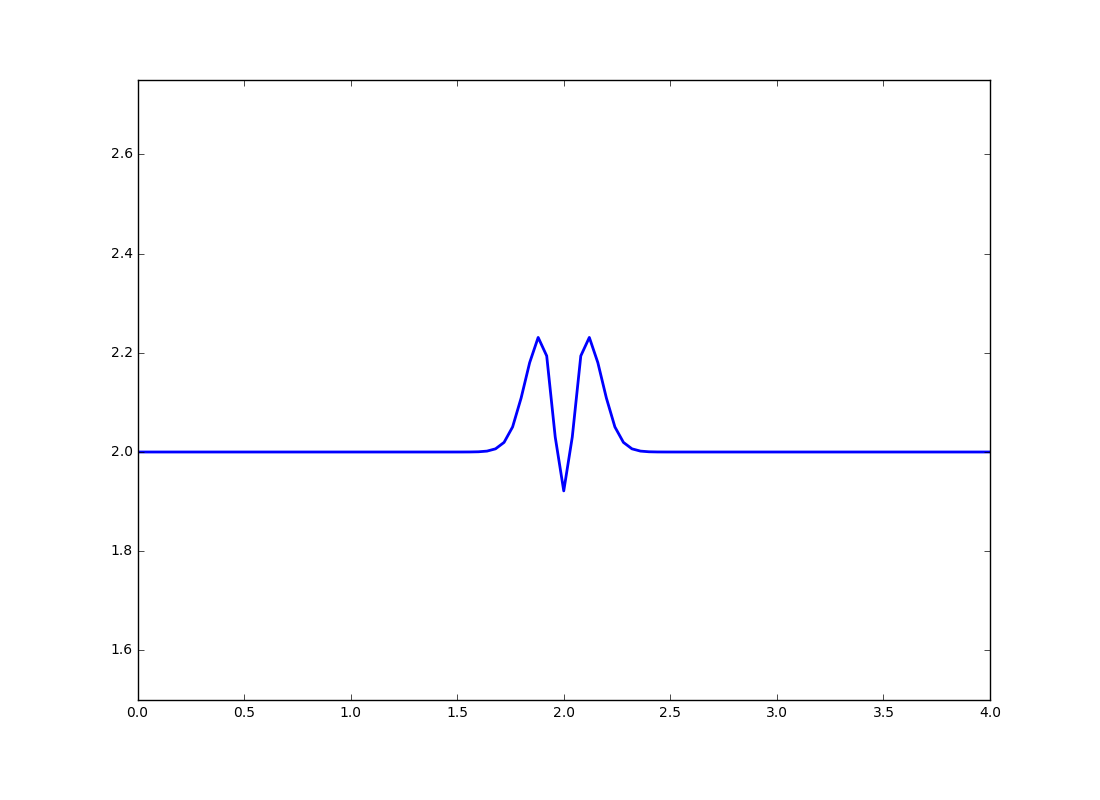
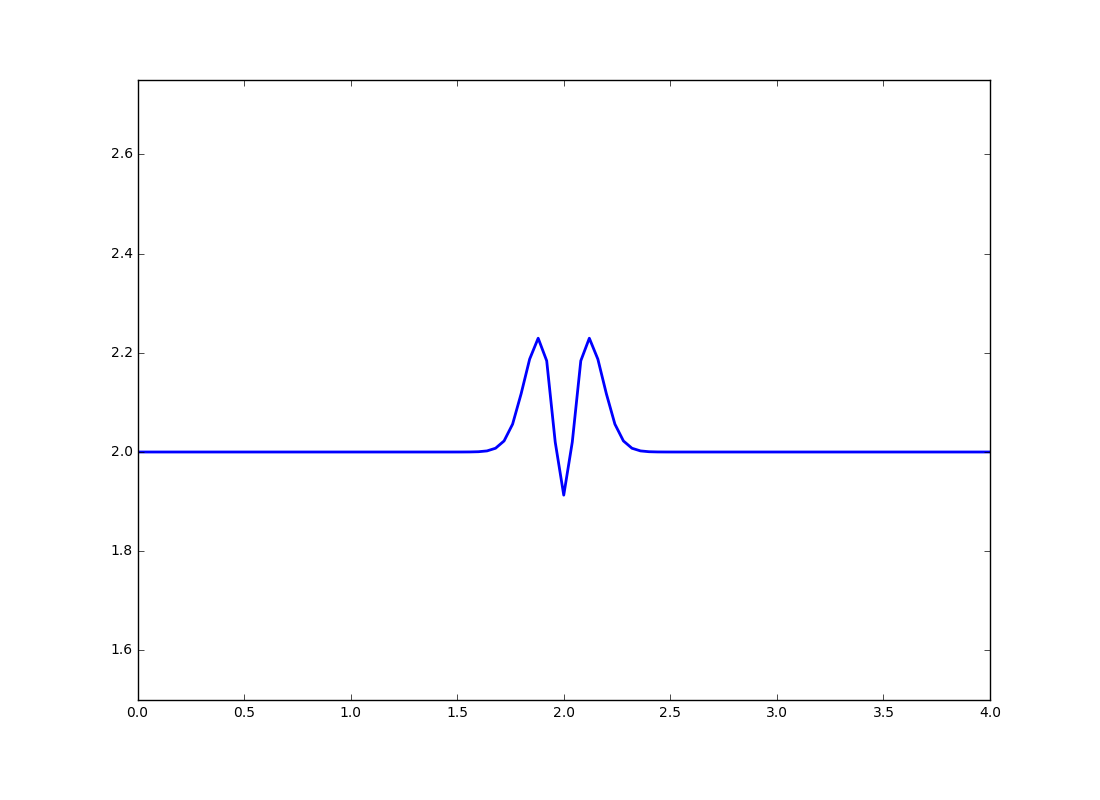
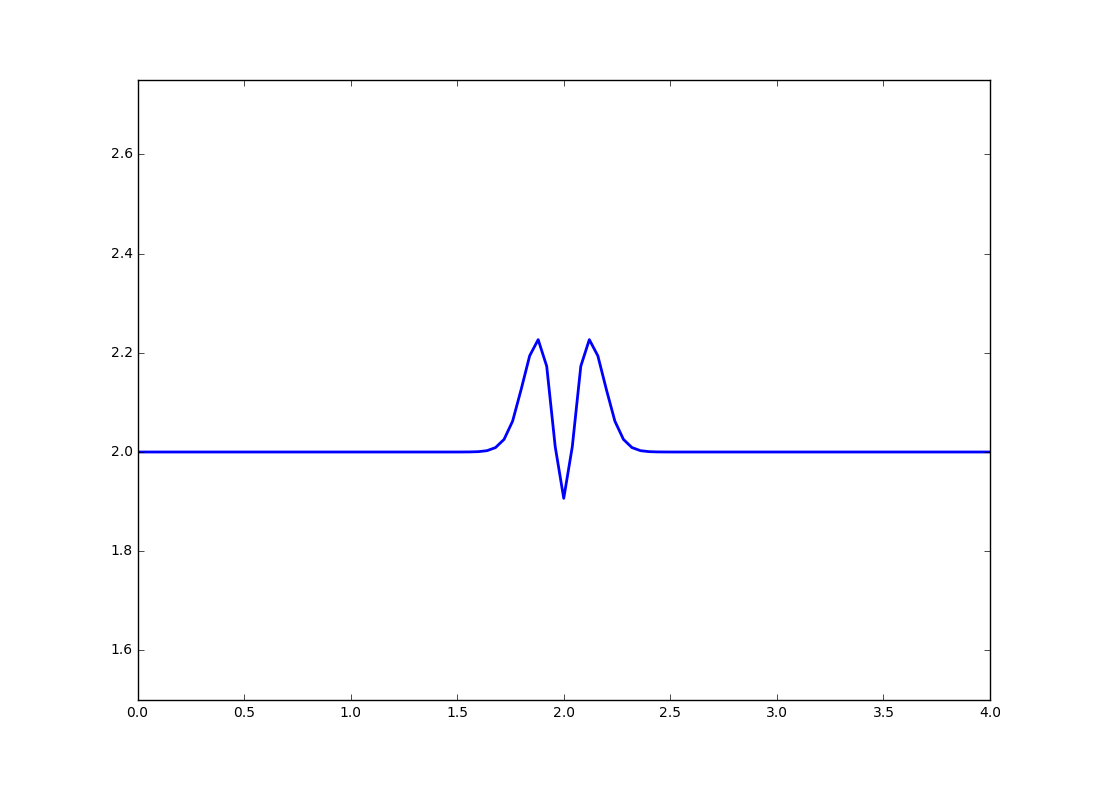
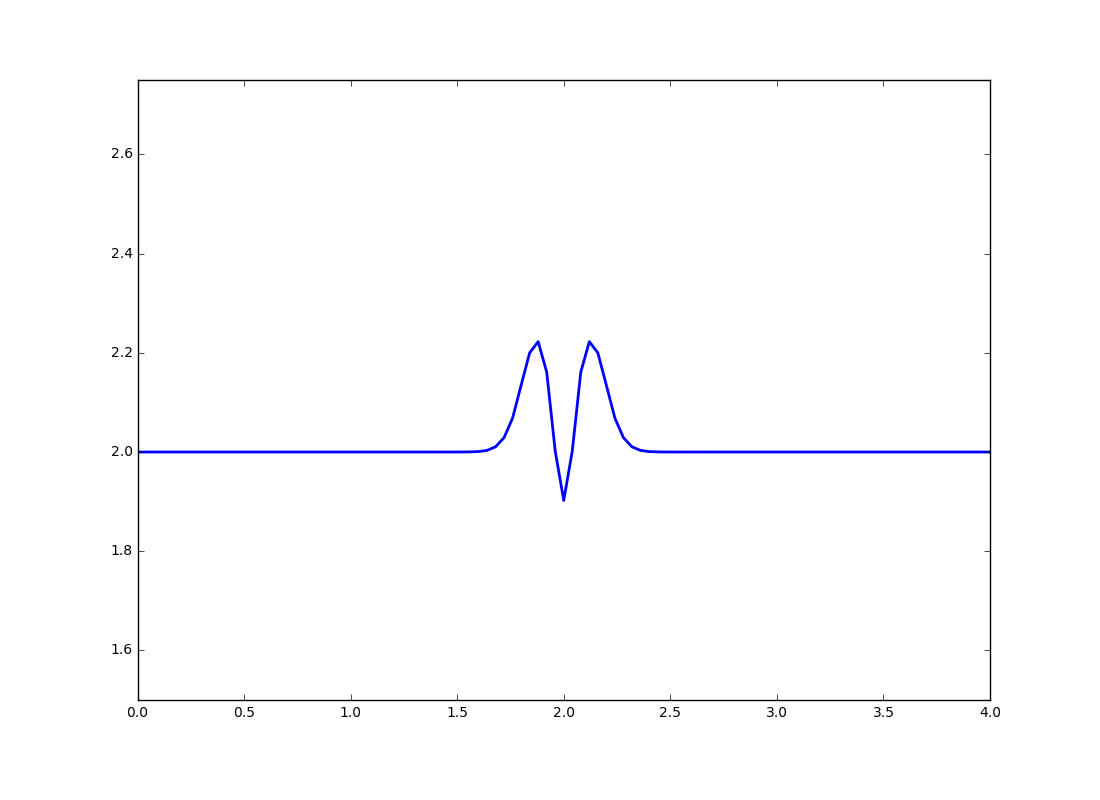
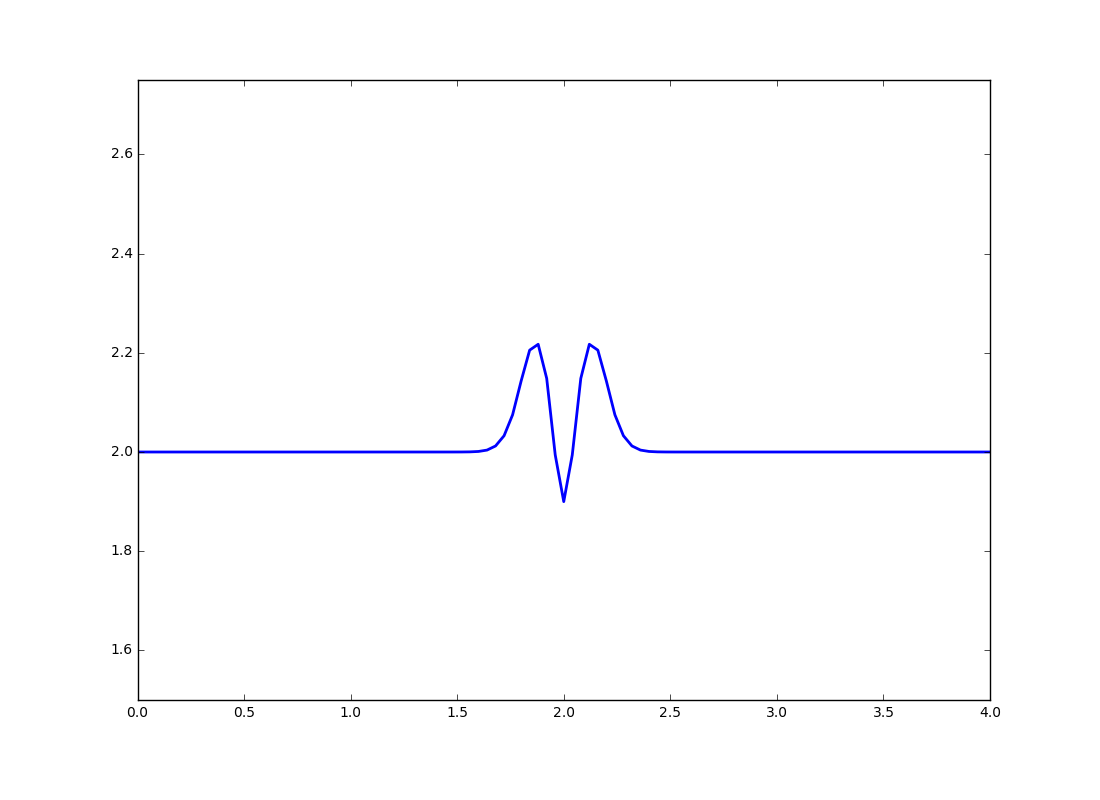
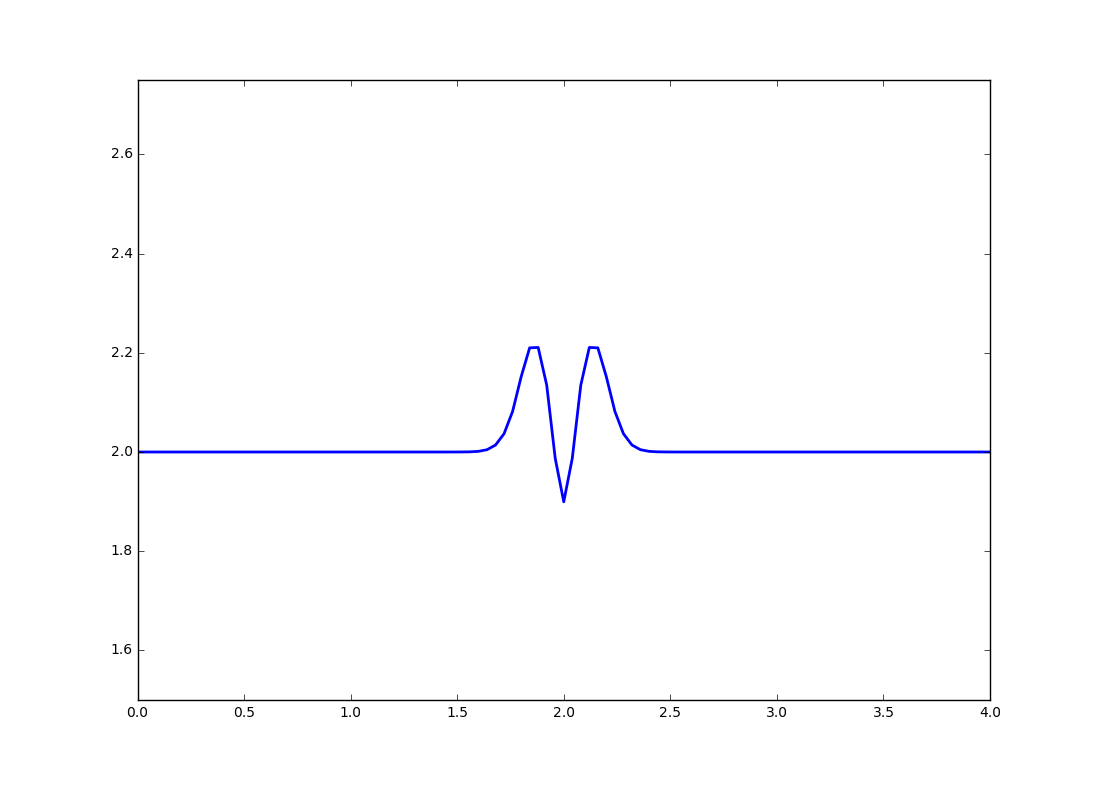
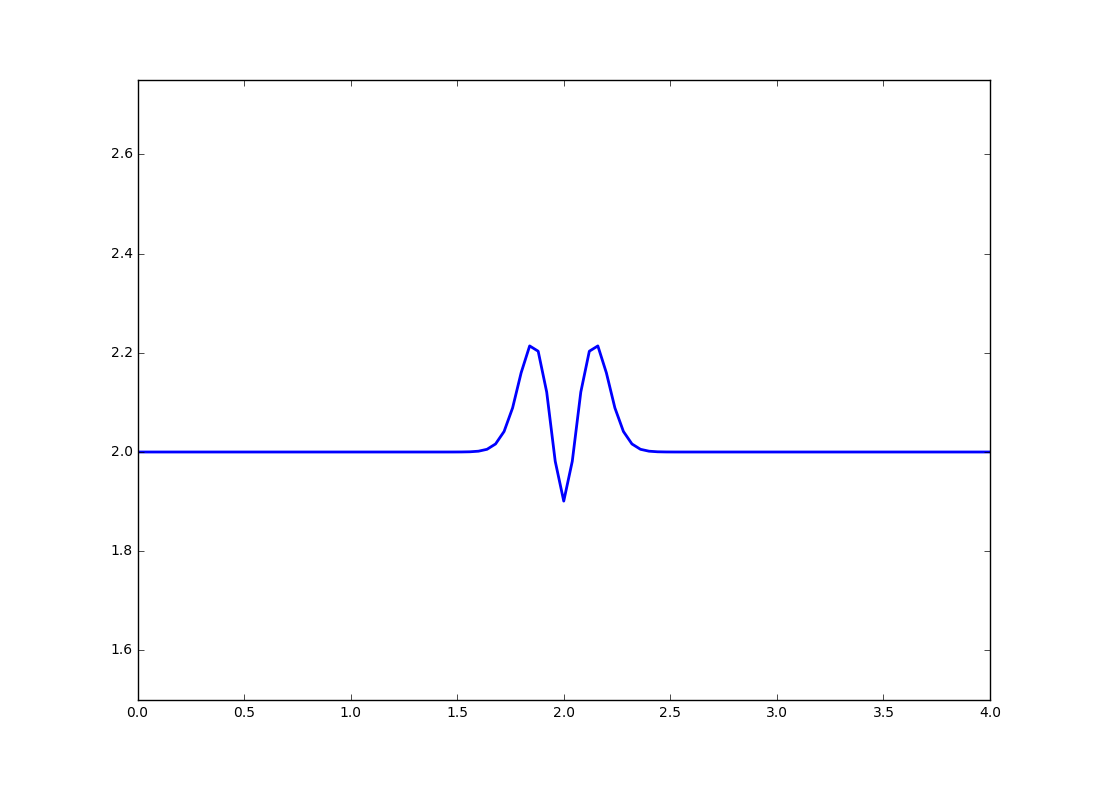
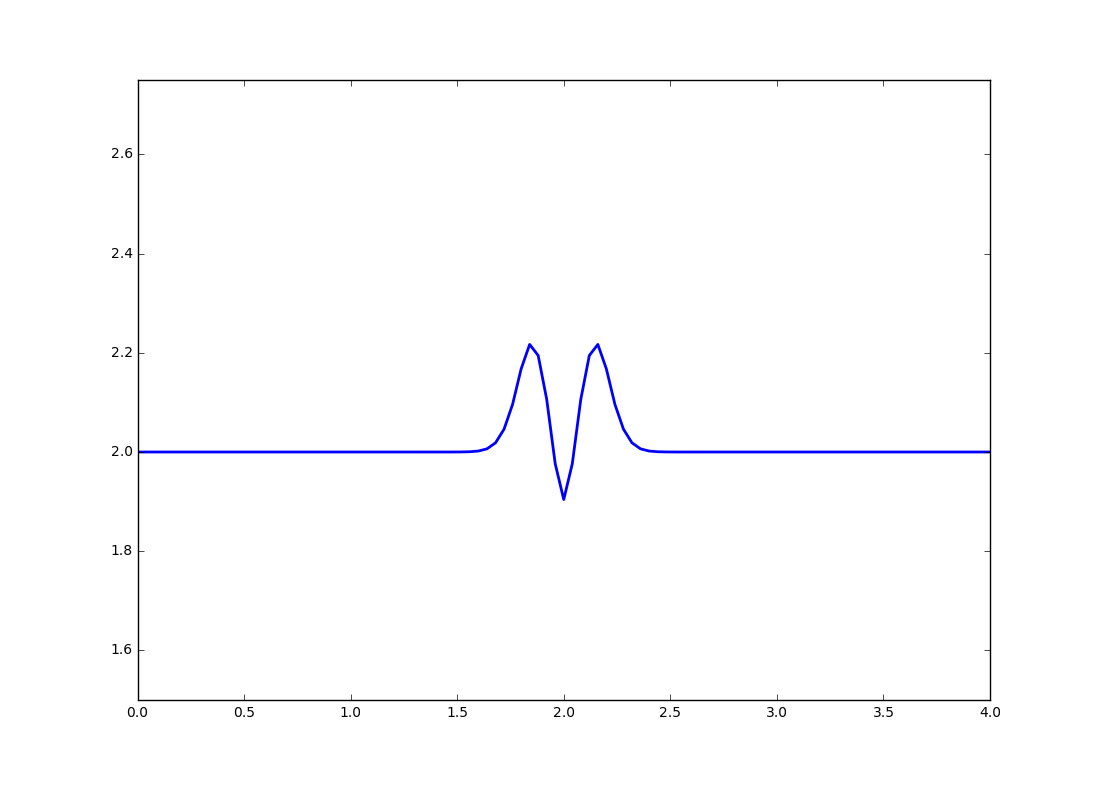
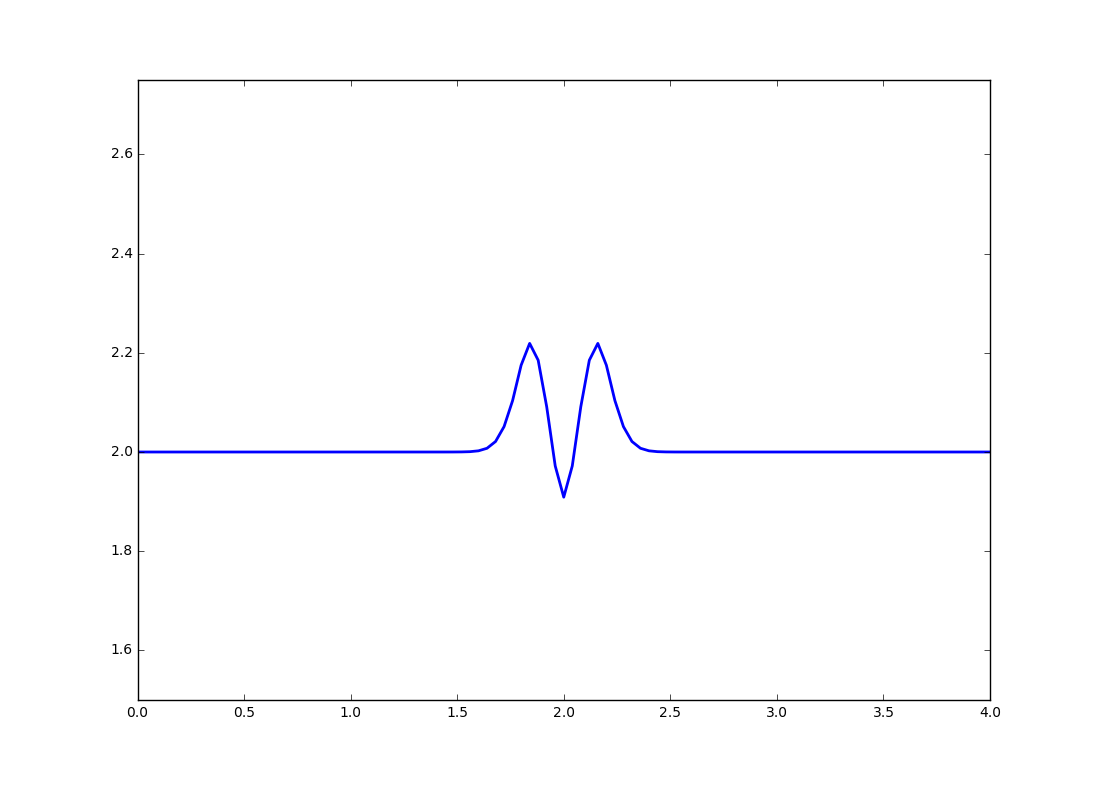
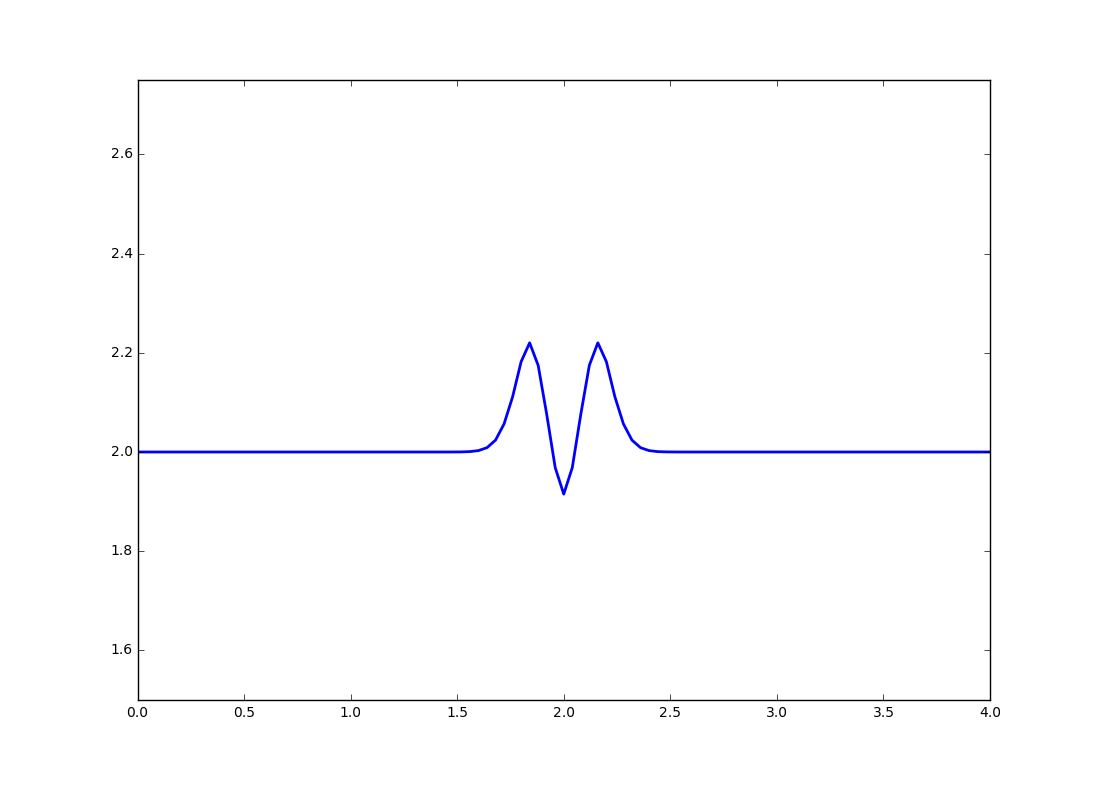
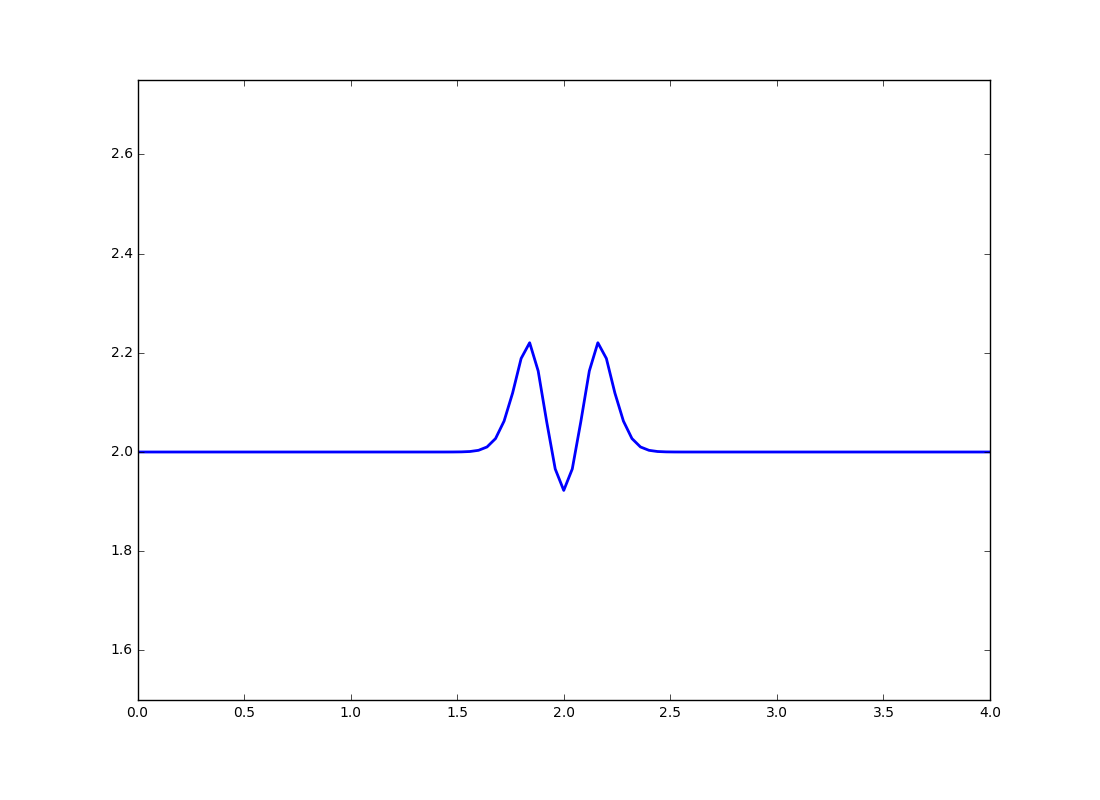
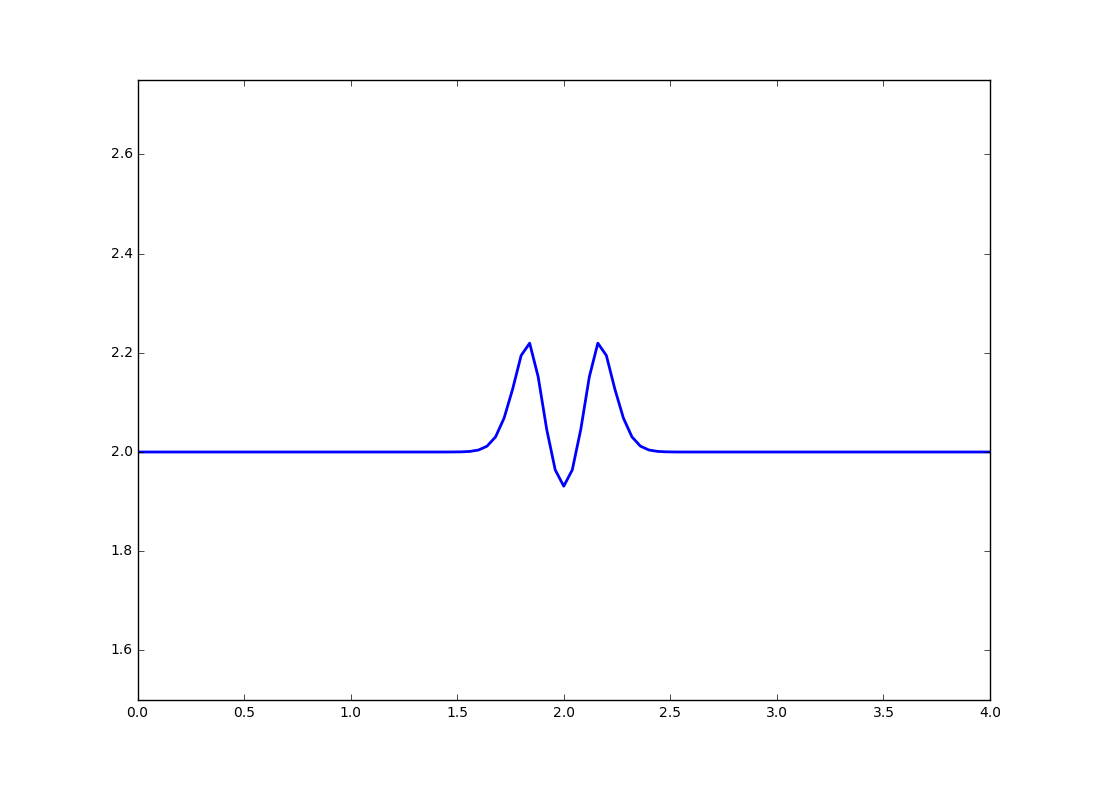
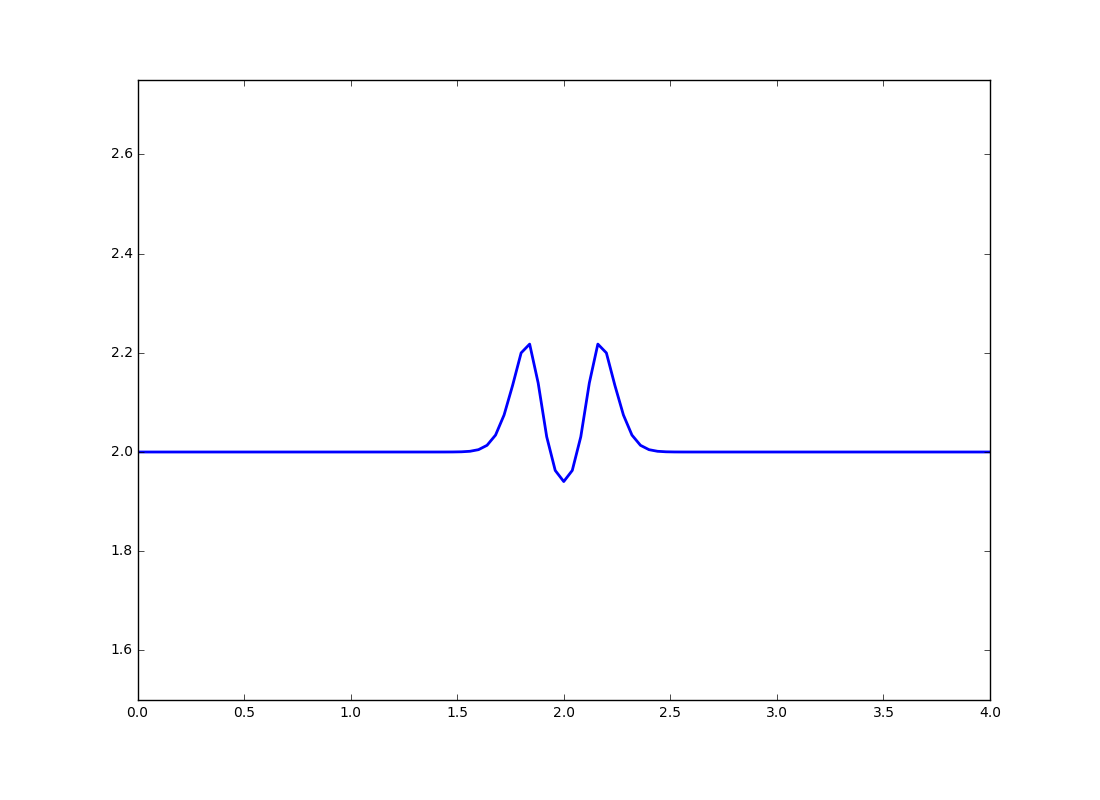
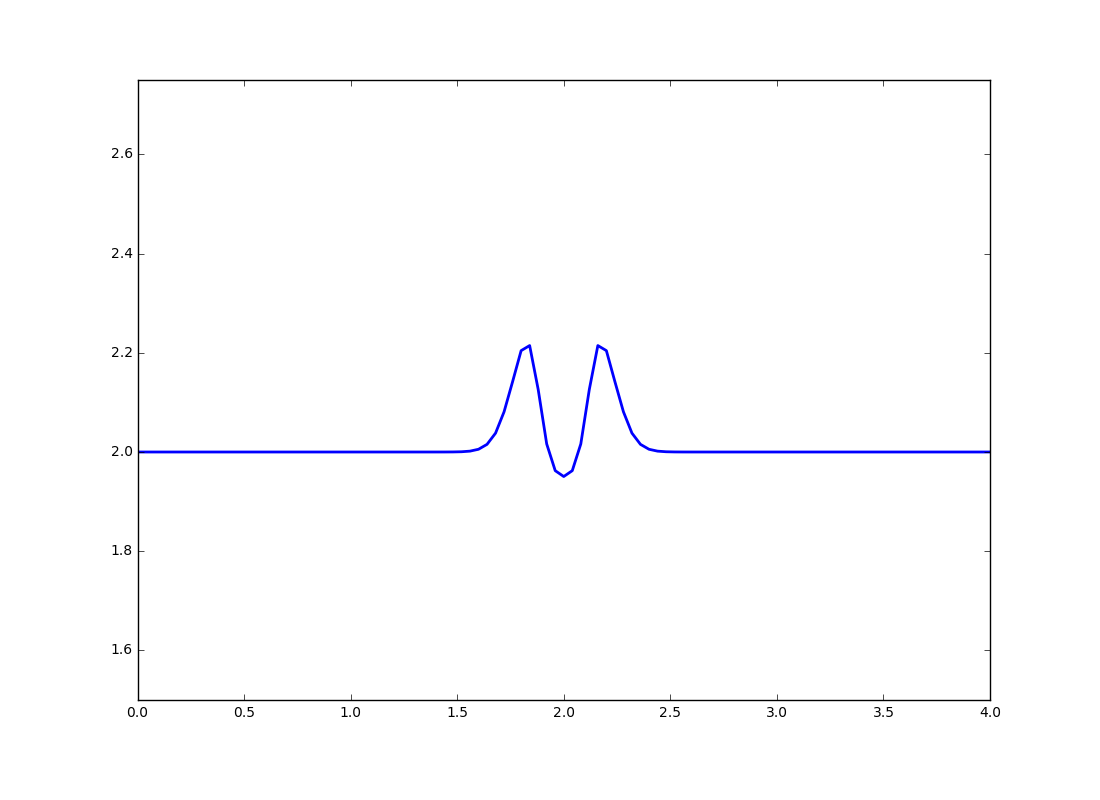
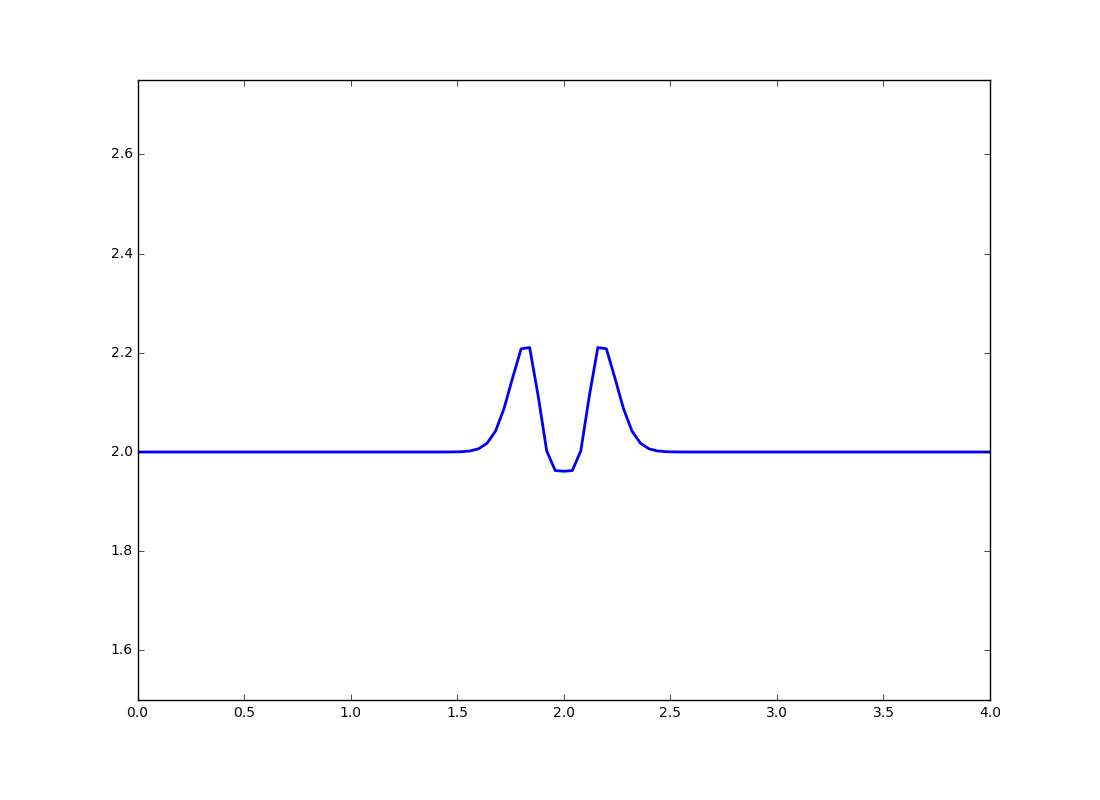
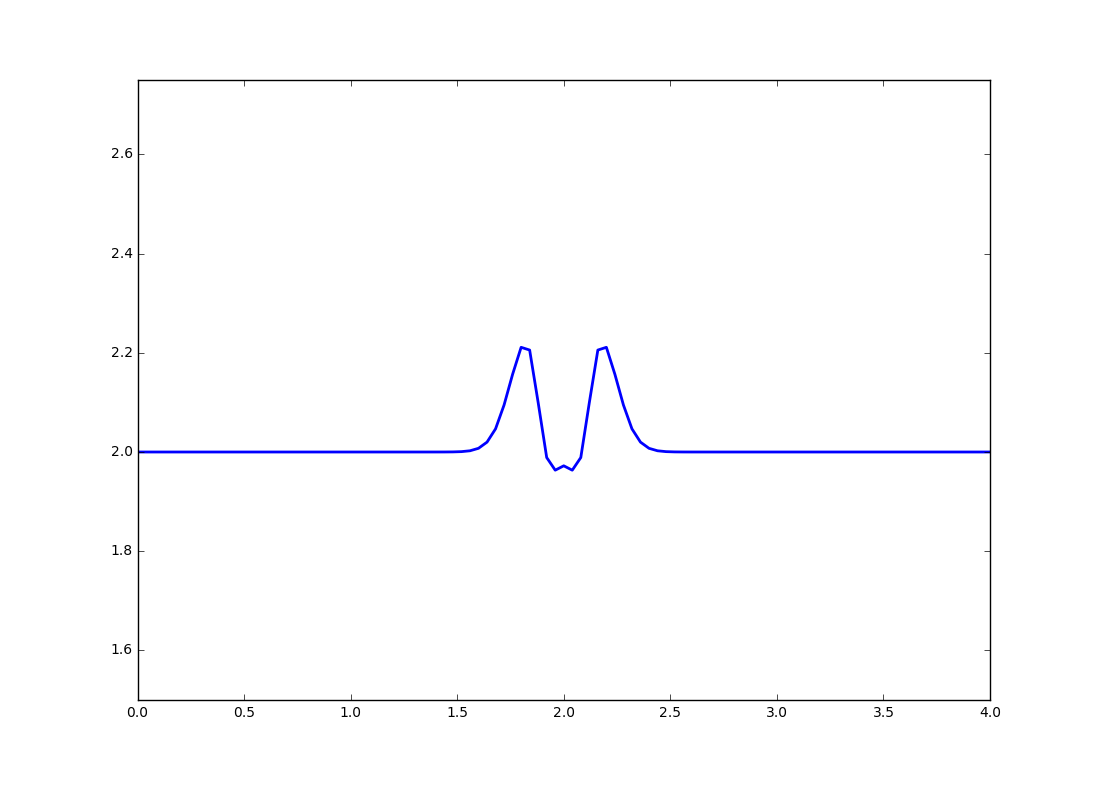
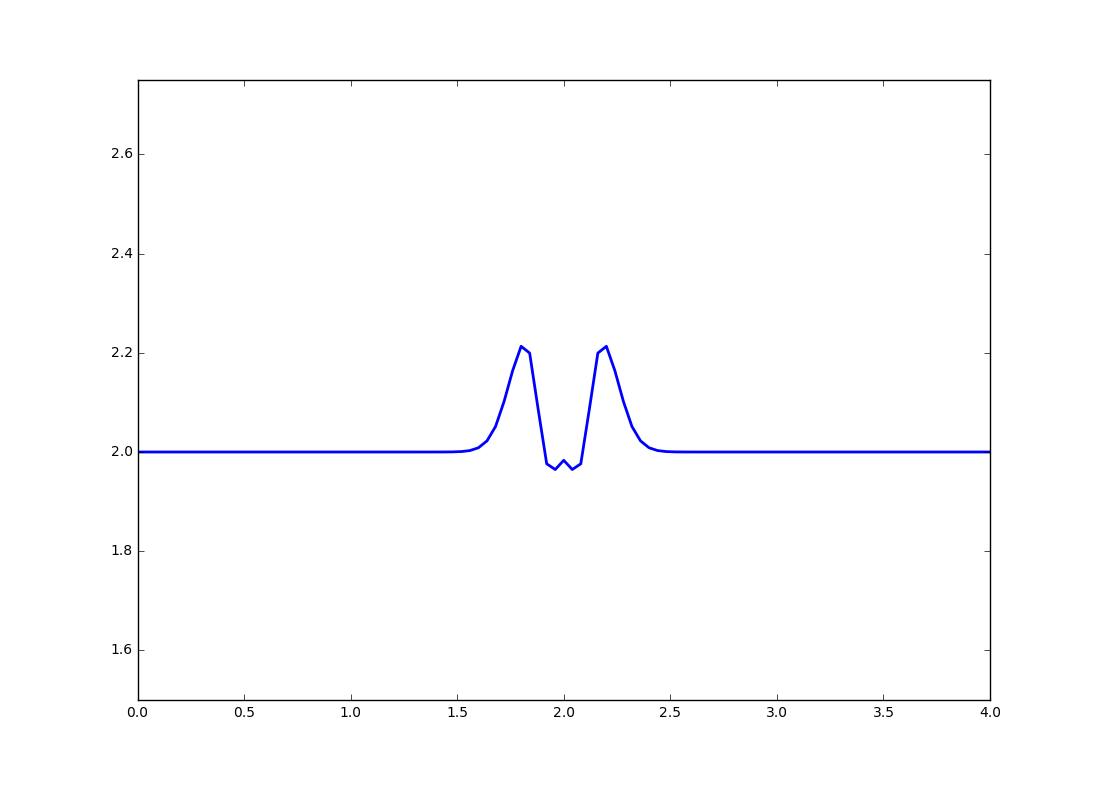
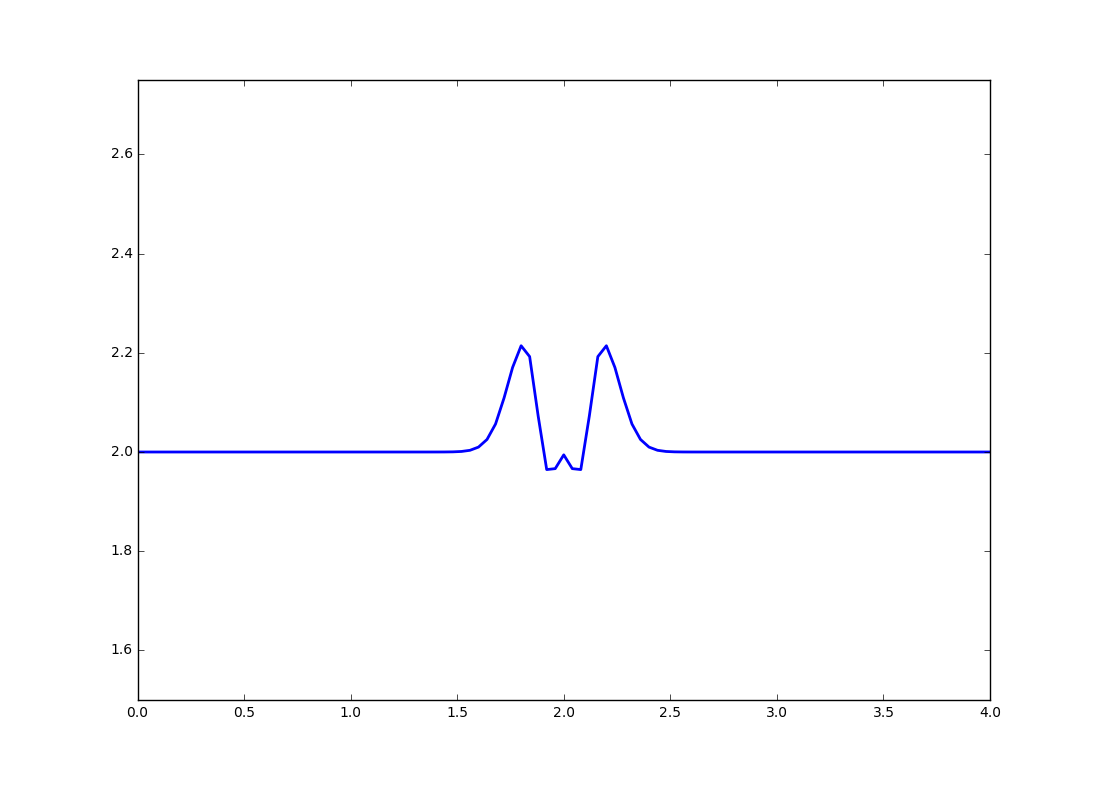
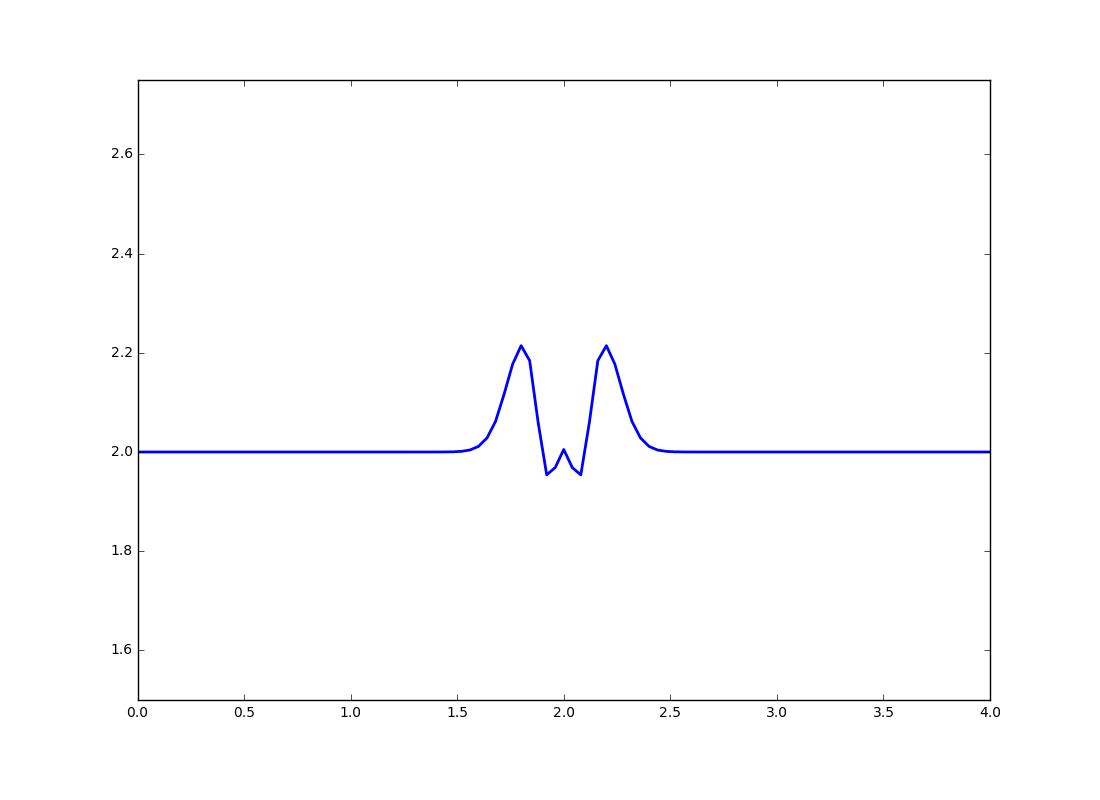
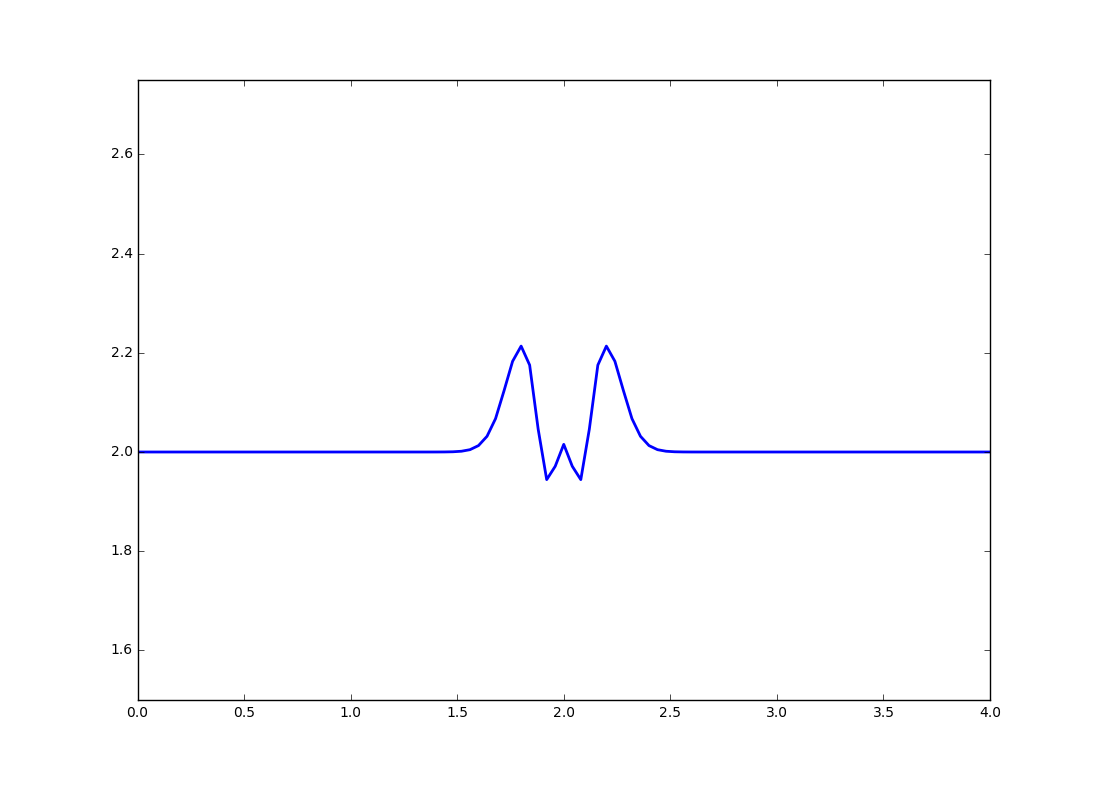

In [4]:
x = np.linspace(0,4,101)
fig = plt.figure(figsize=(11,8))
ax = plt.axes(xlim=(0,4), ylim=(1.5,2.75))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return line, 

def animate(i):
    line.set_data(x, python_1d_shallow(i, 101, 1, 40., 2))
    return line,

animation.FuncAnimation(fig, animate, init_func=init, frames=50, interval=10, blit=True)


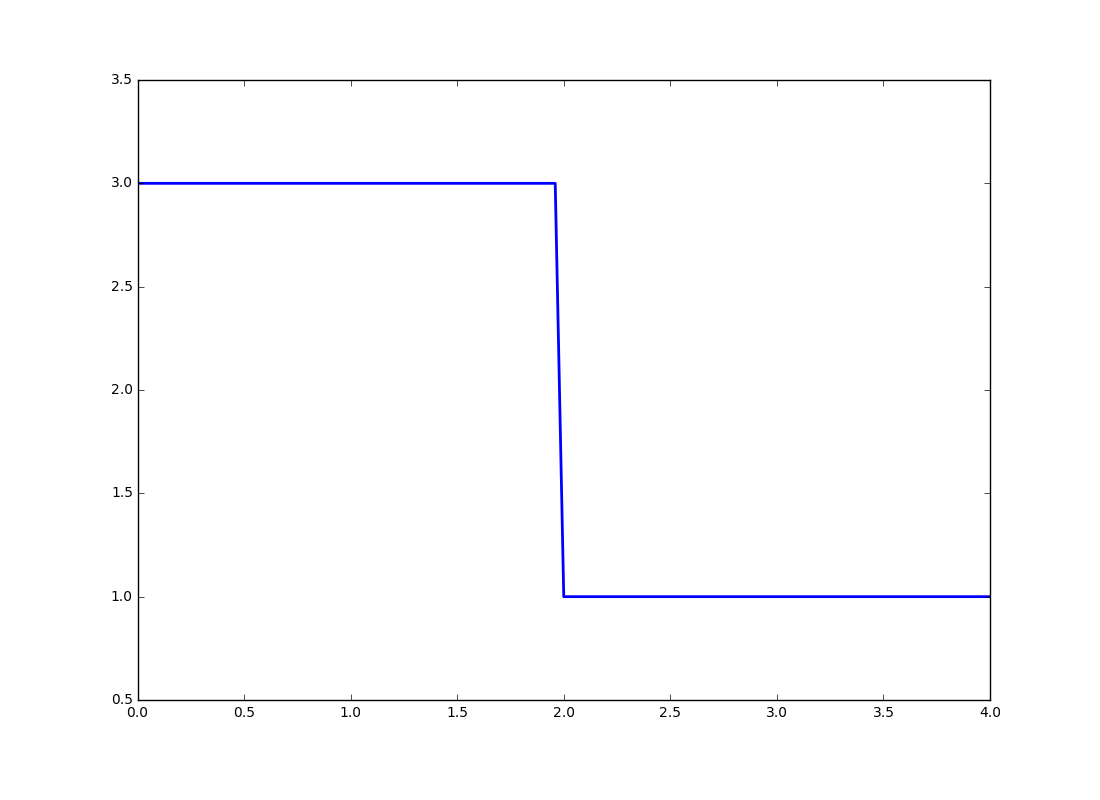
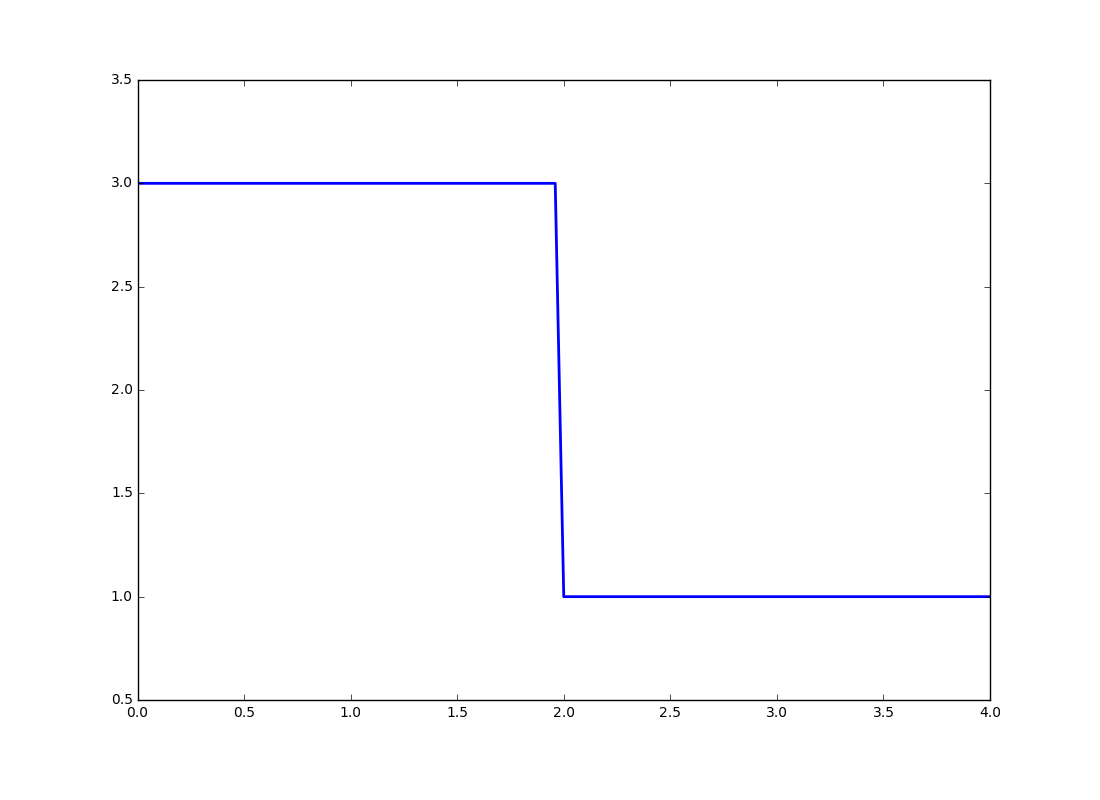
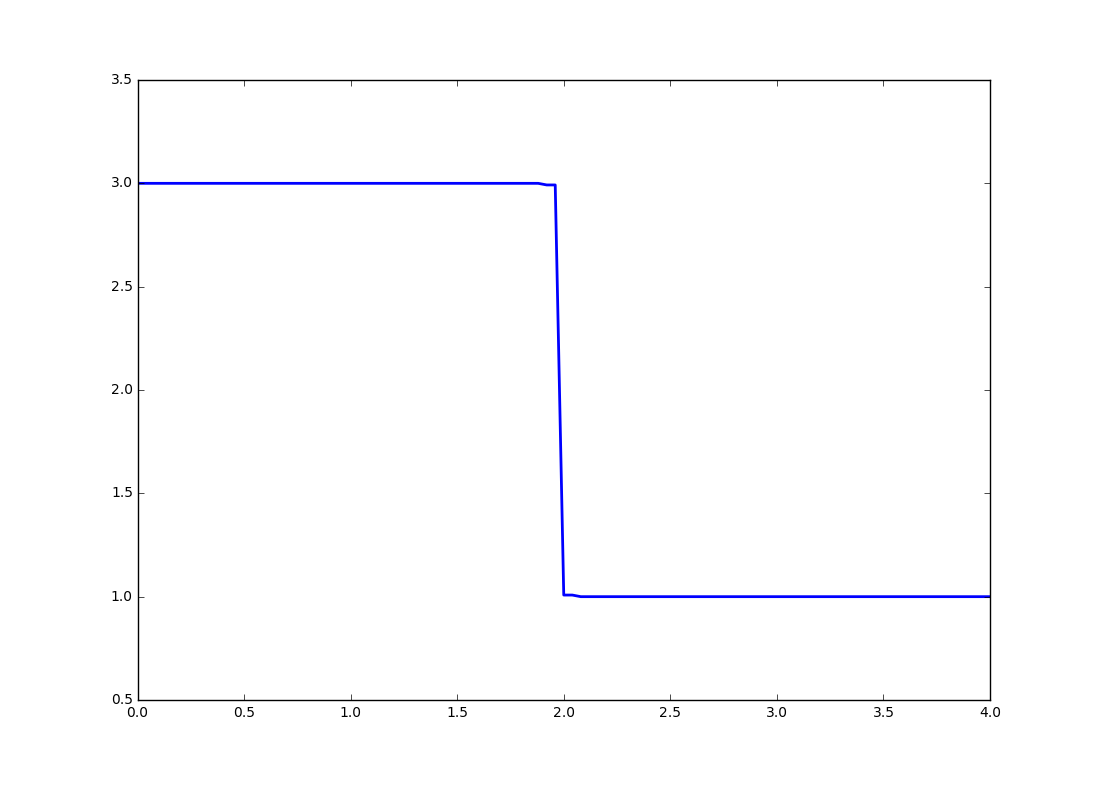
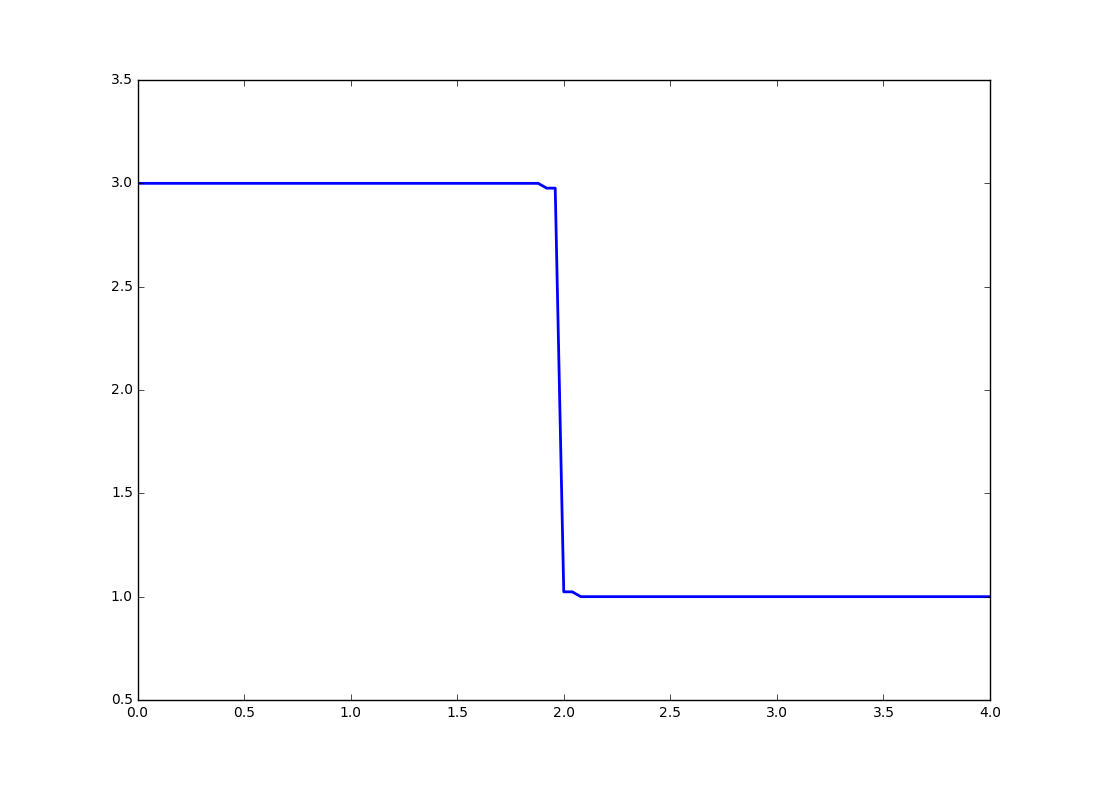
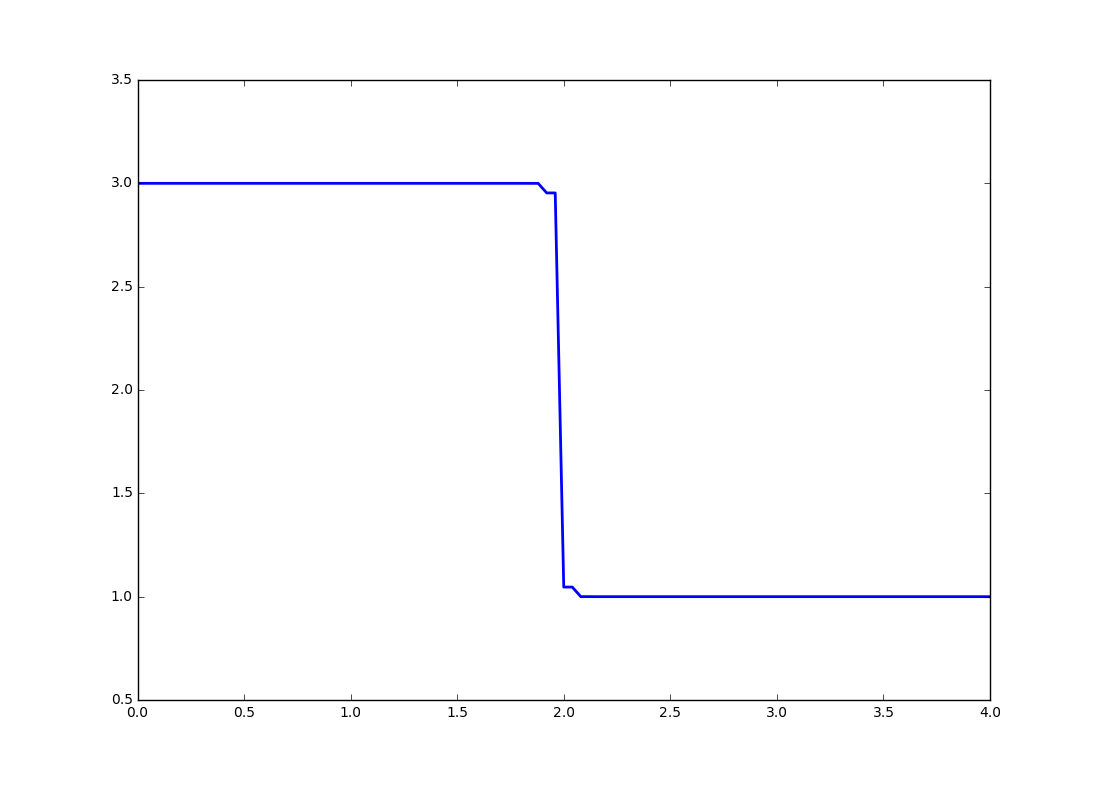
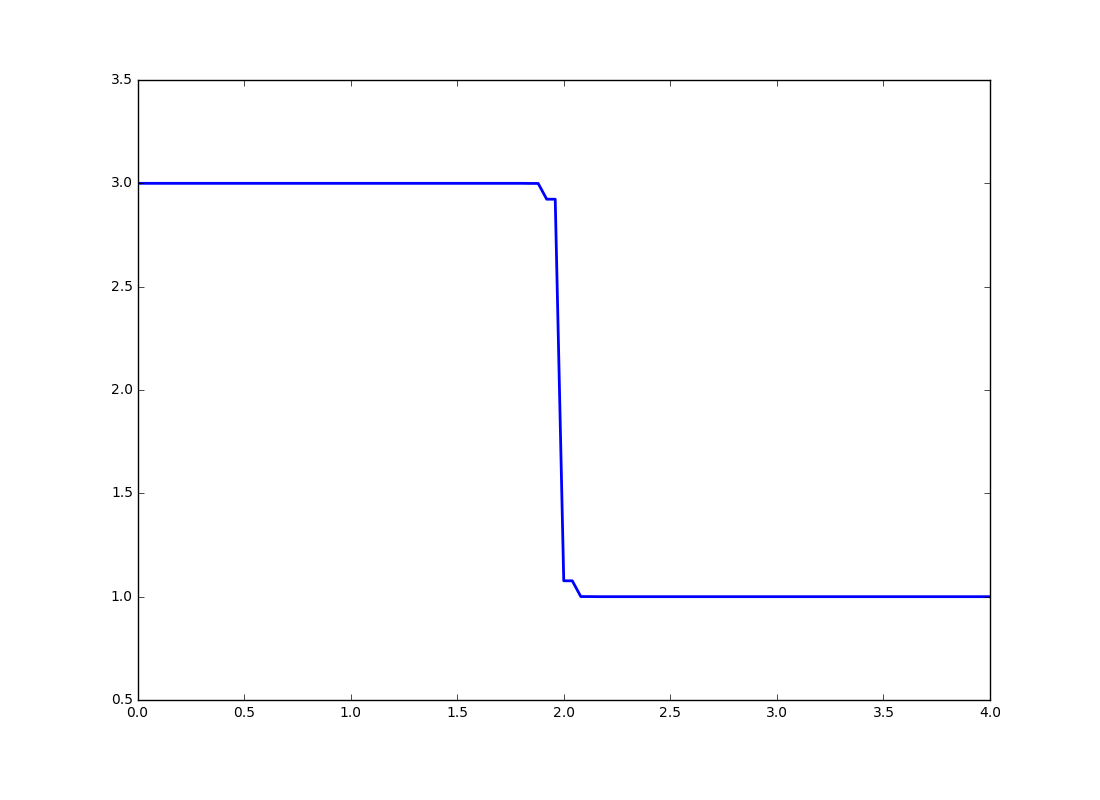
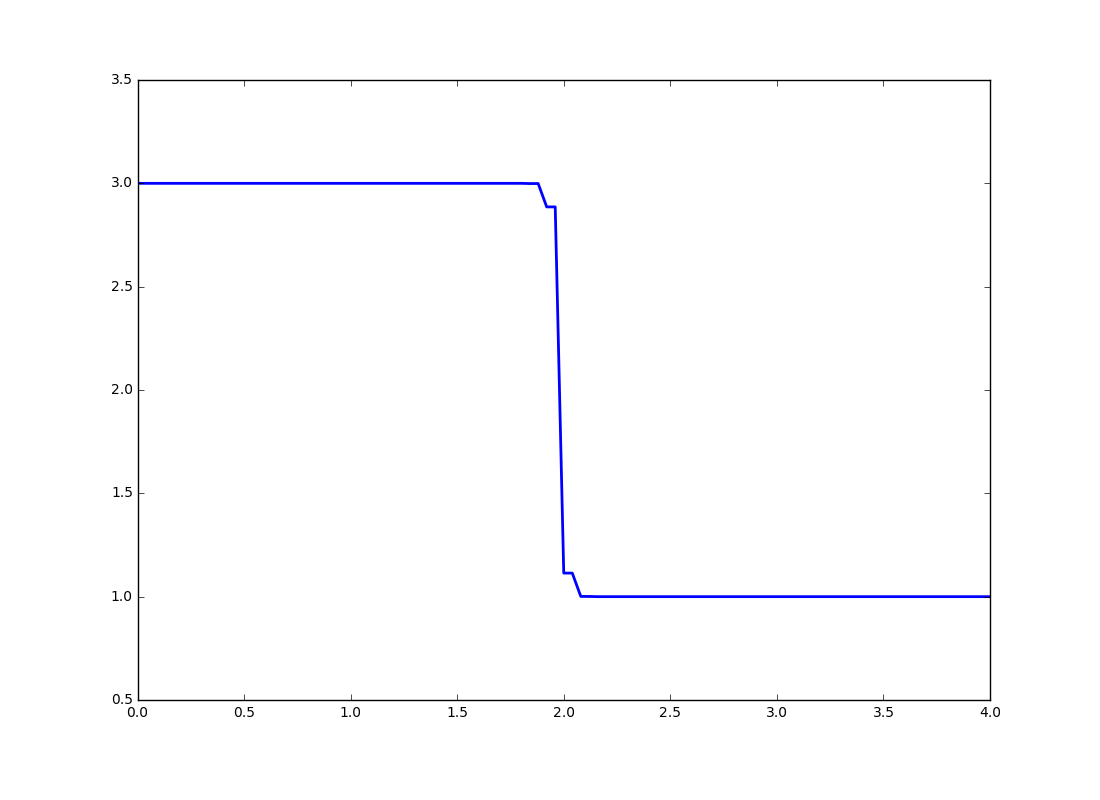
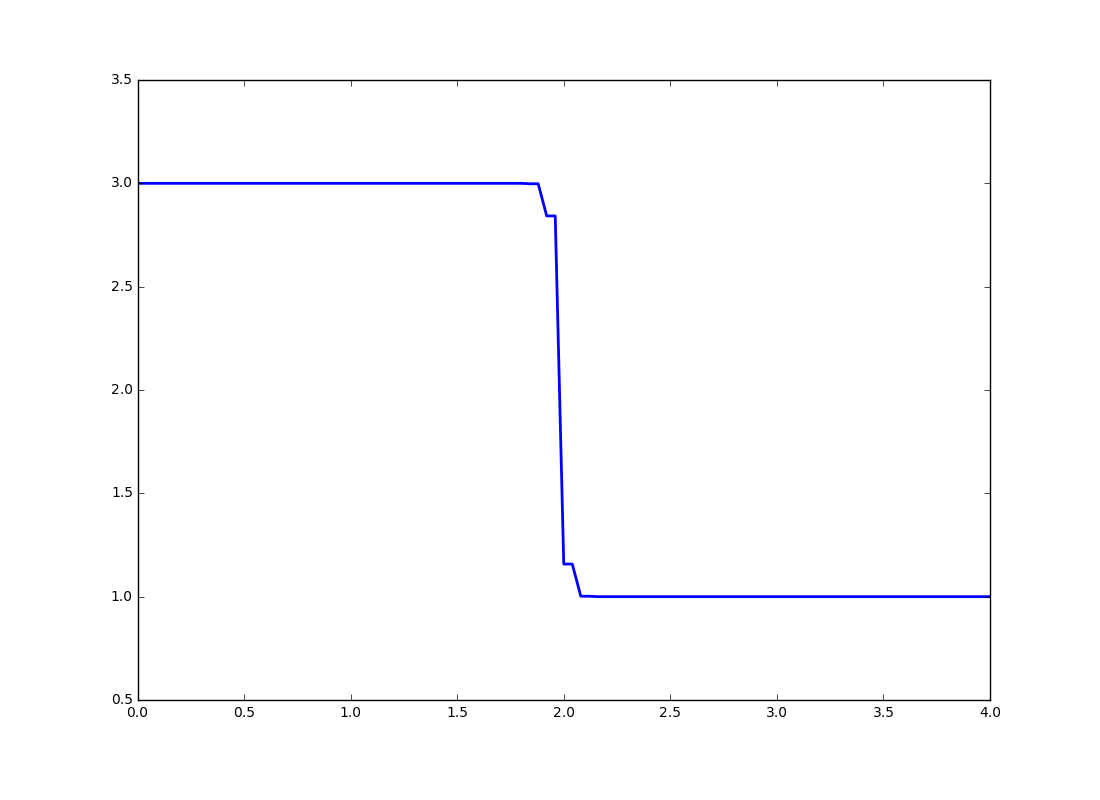
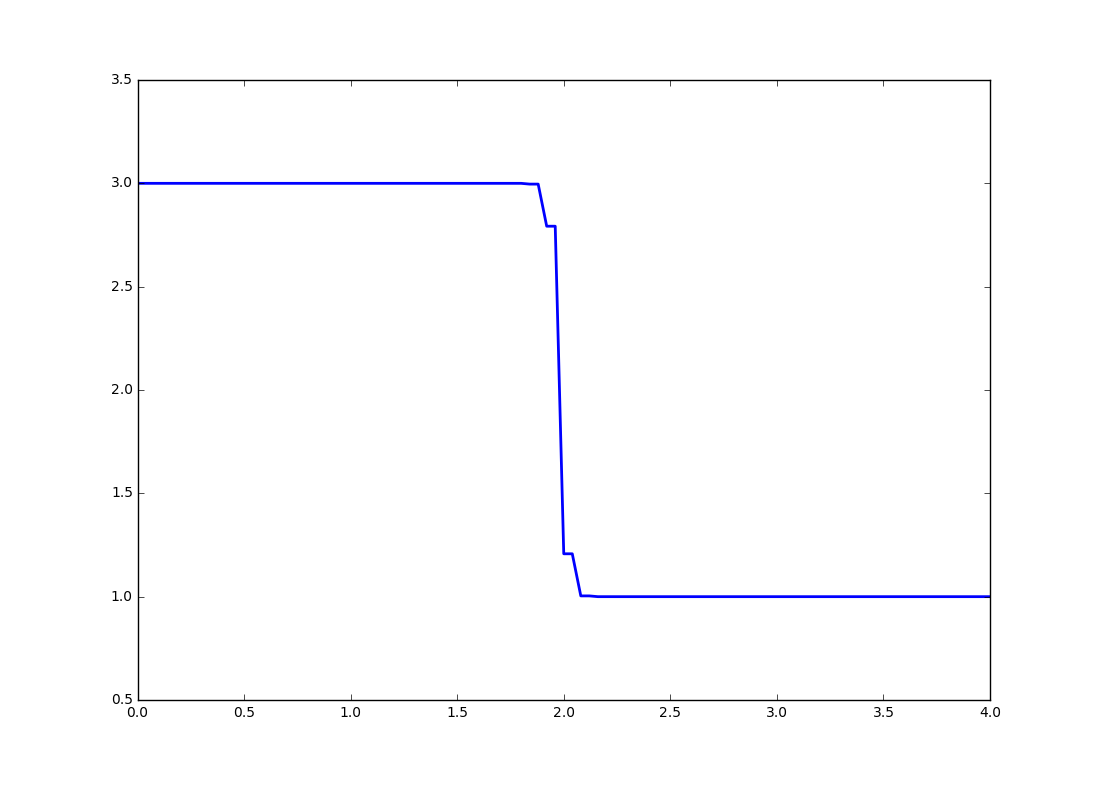
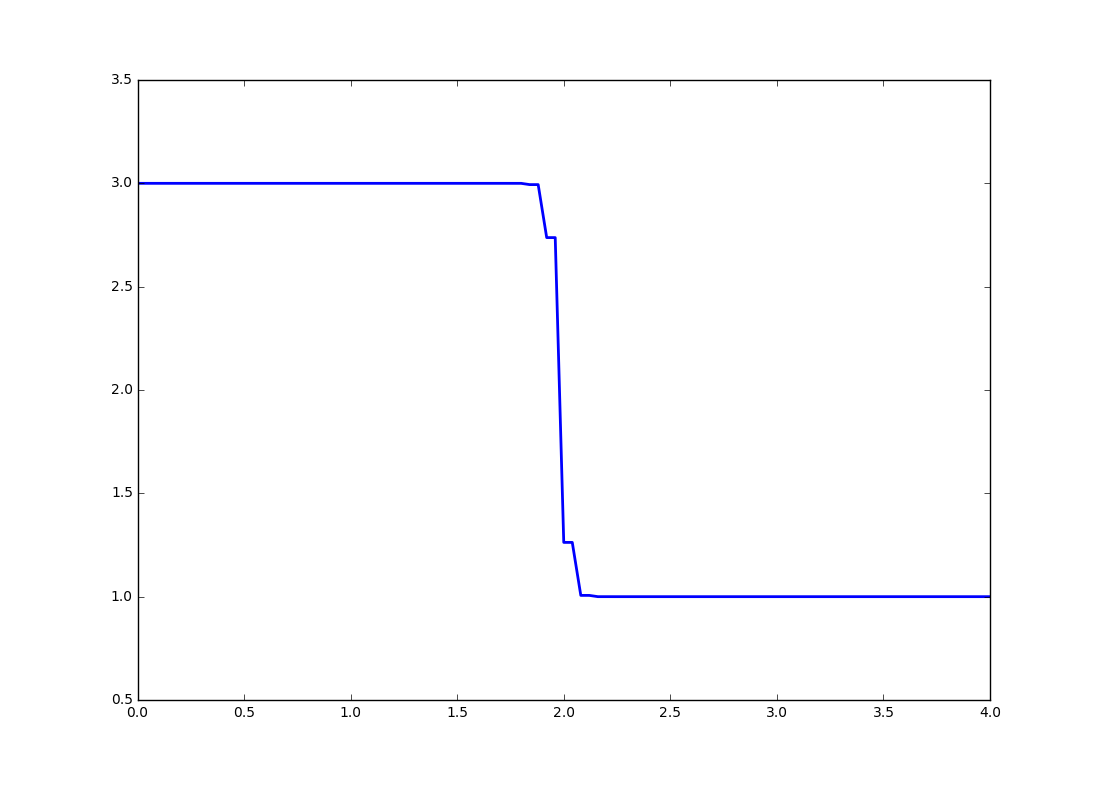
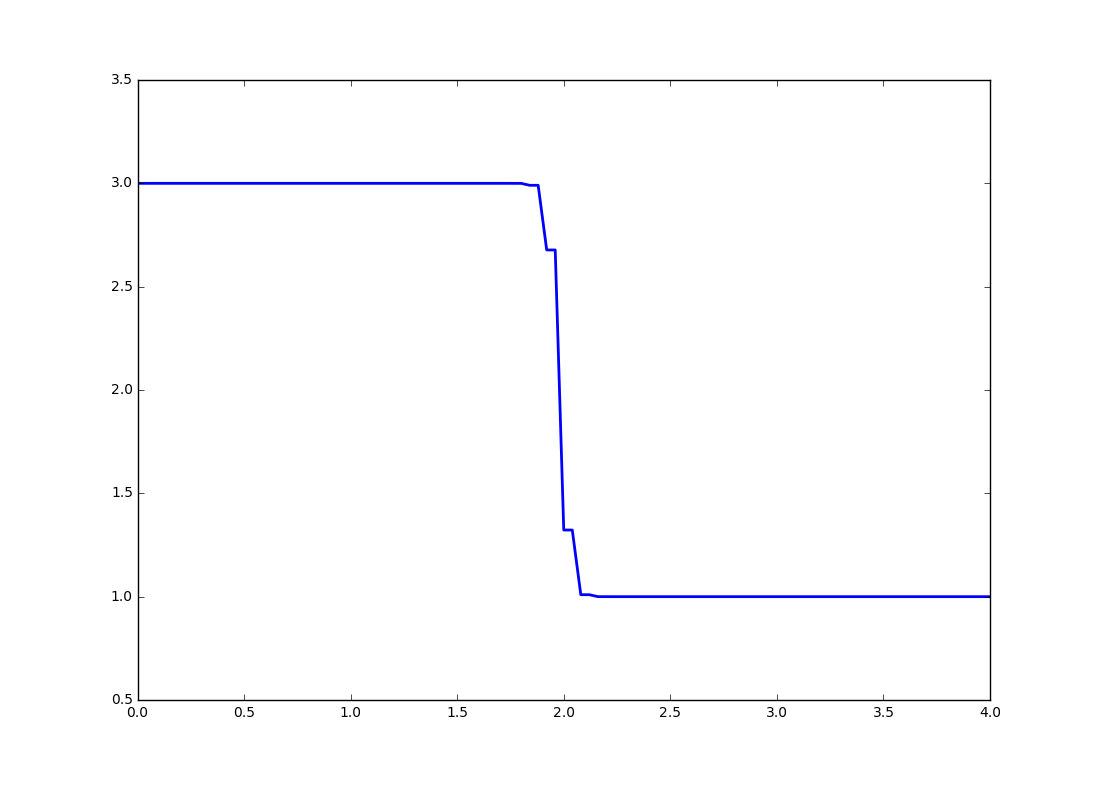
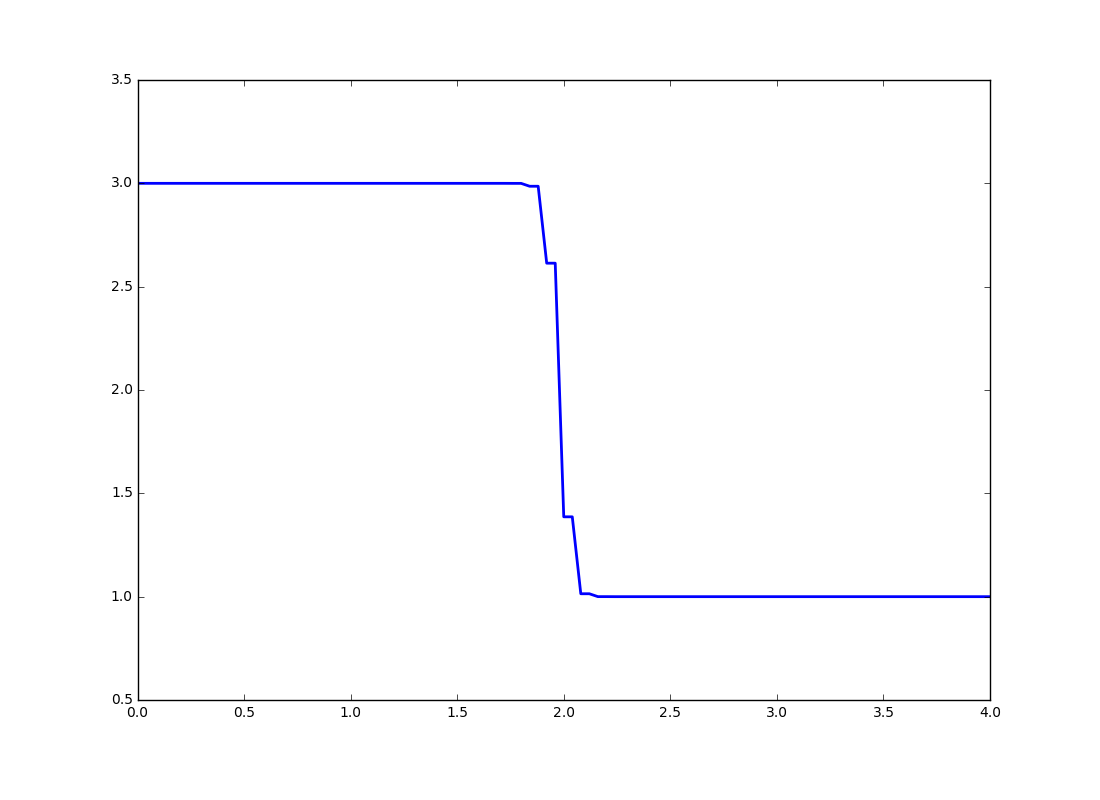
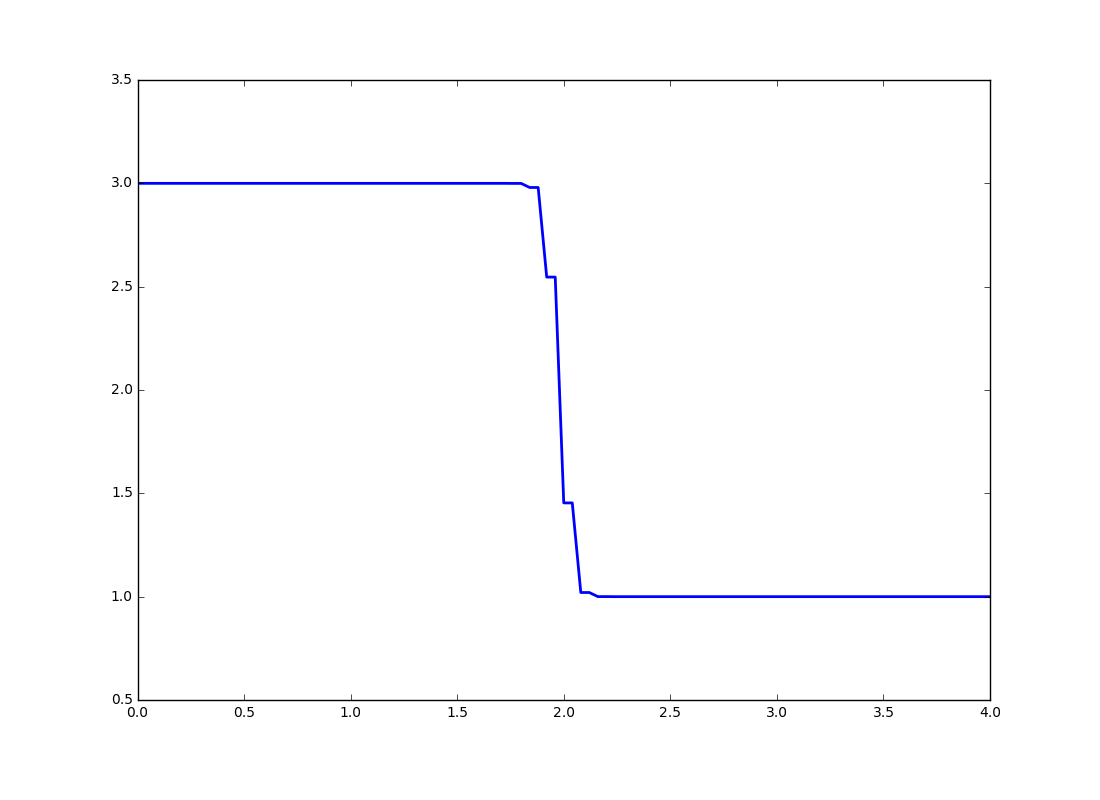
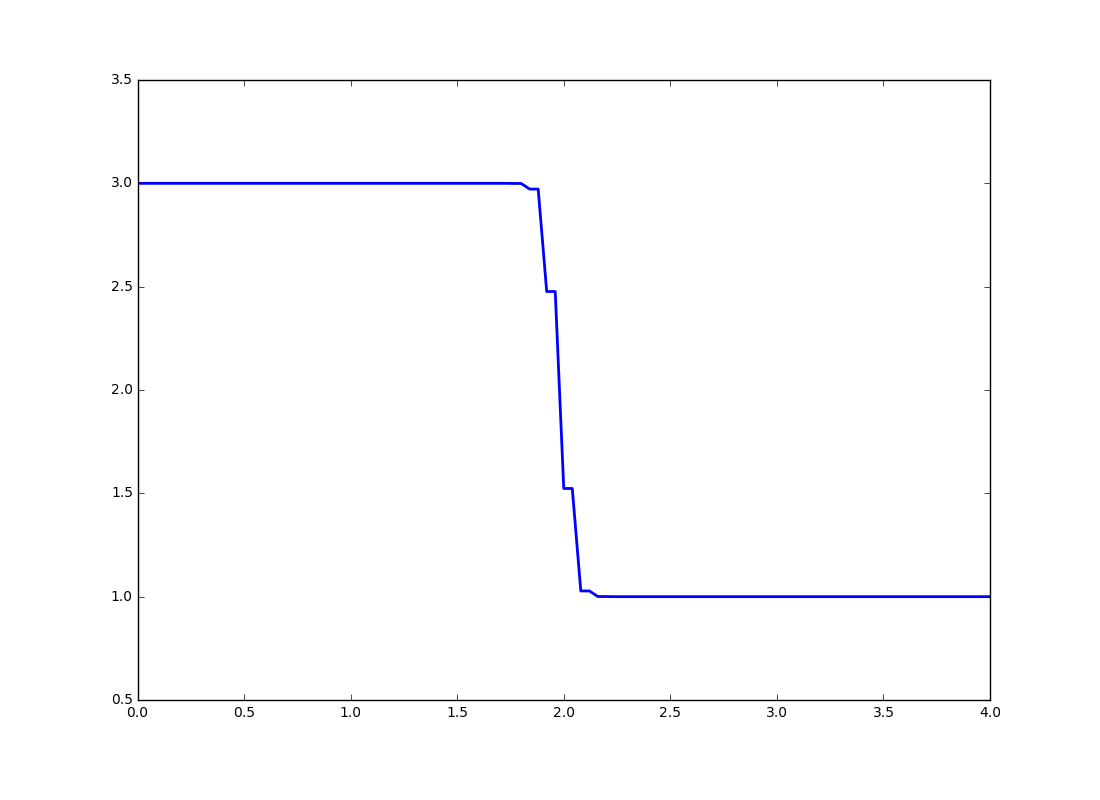
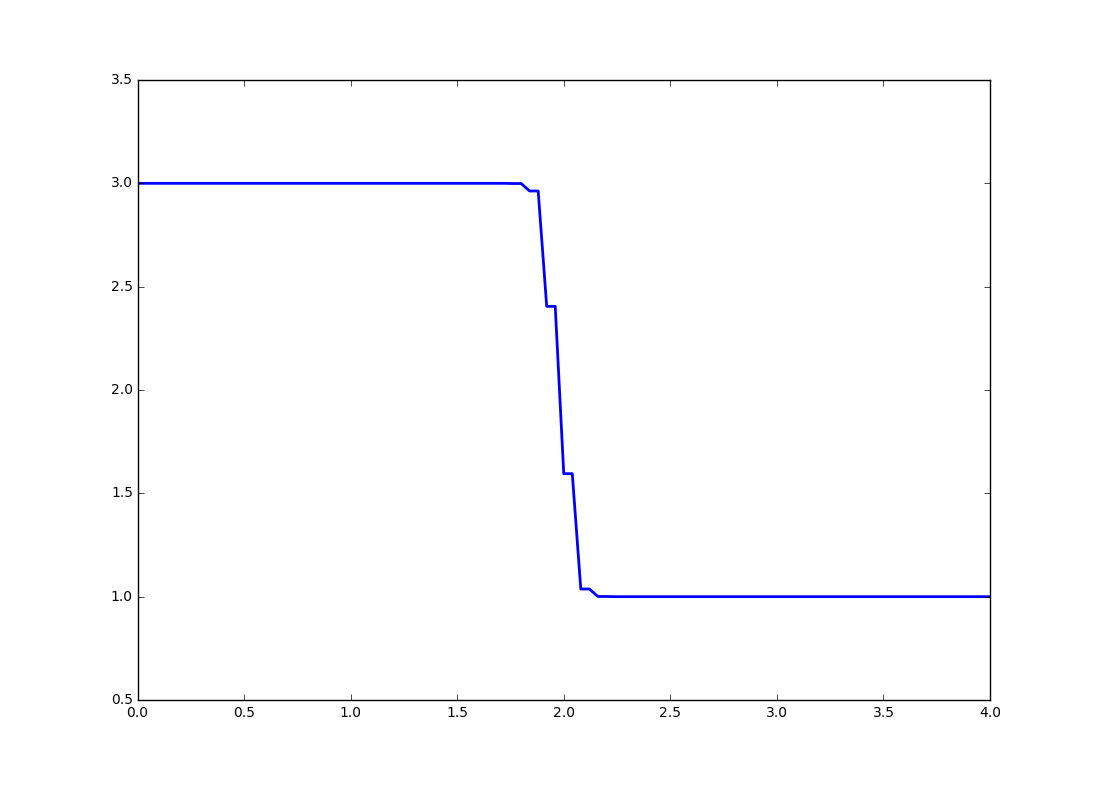
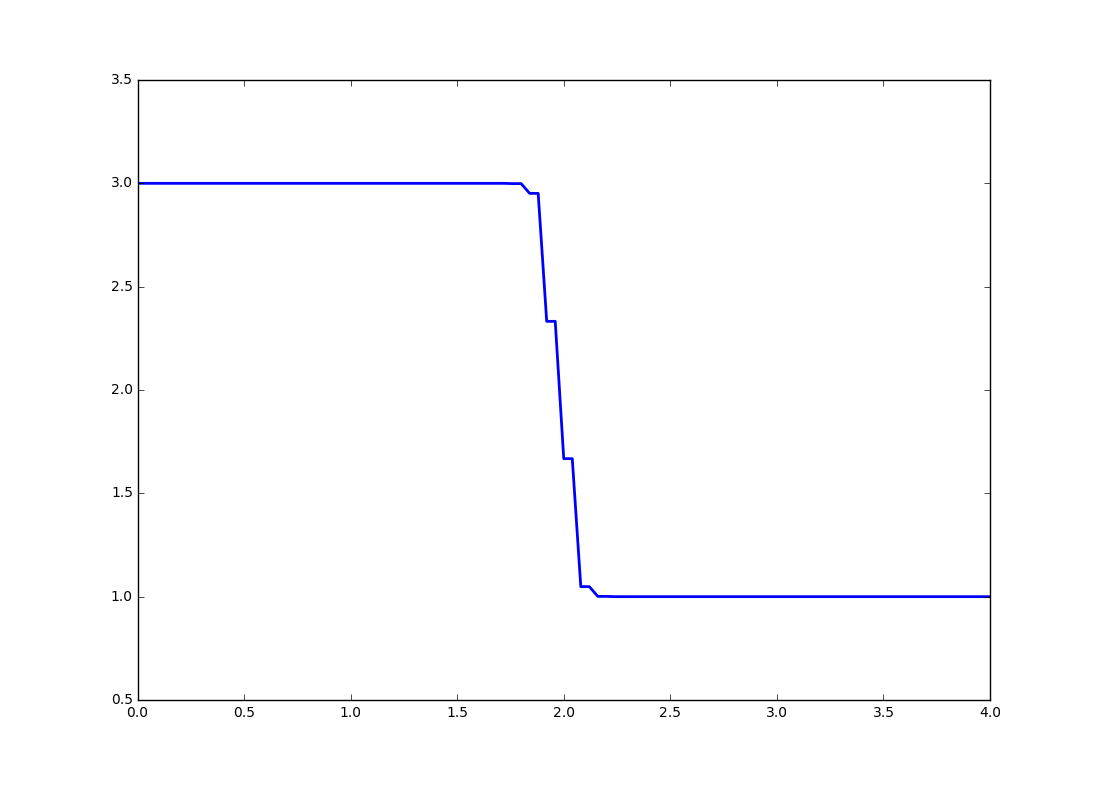
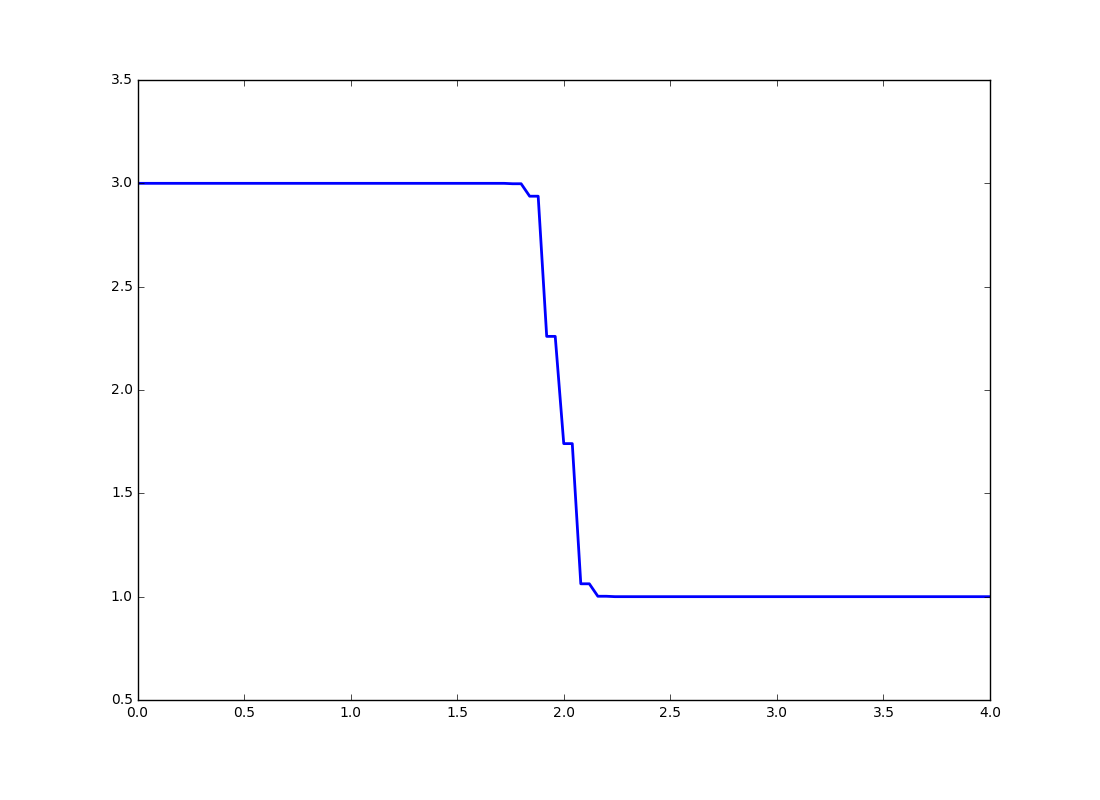
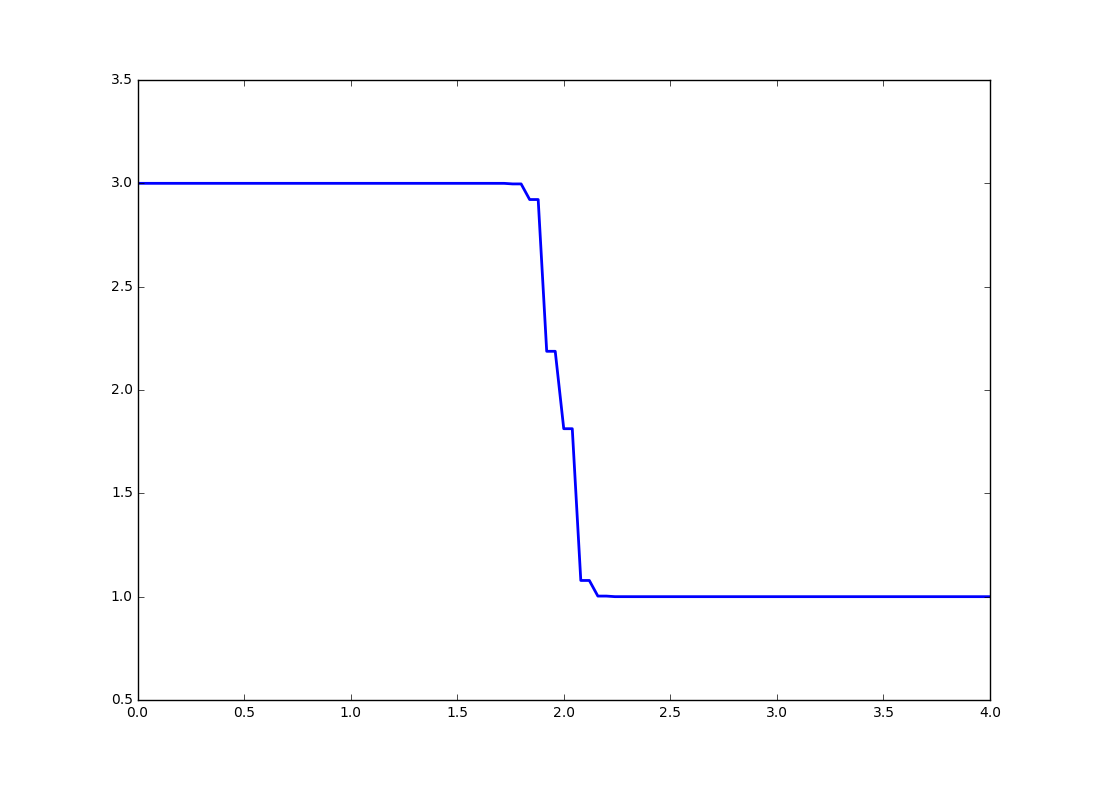
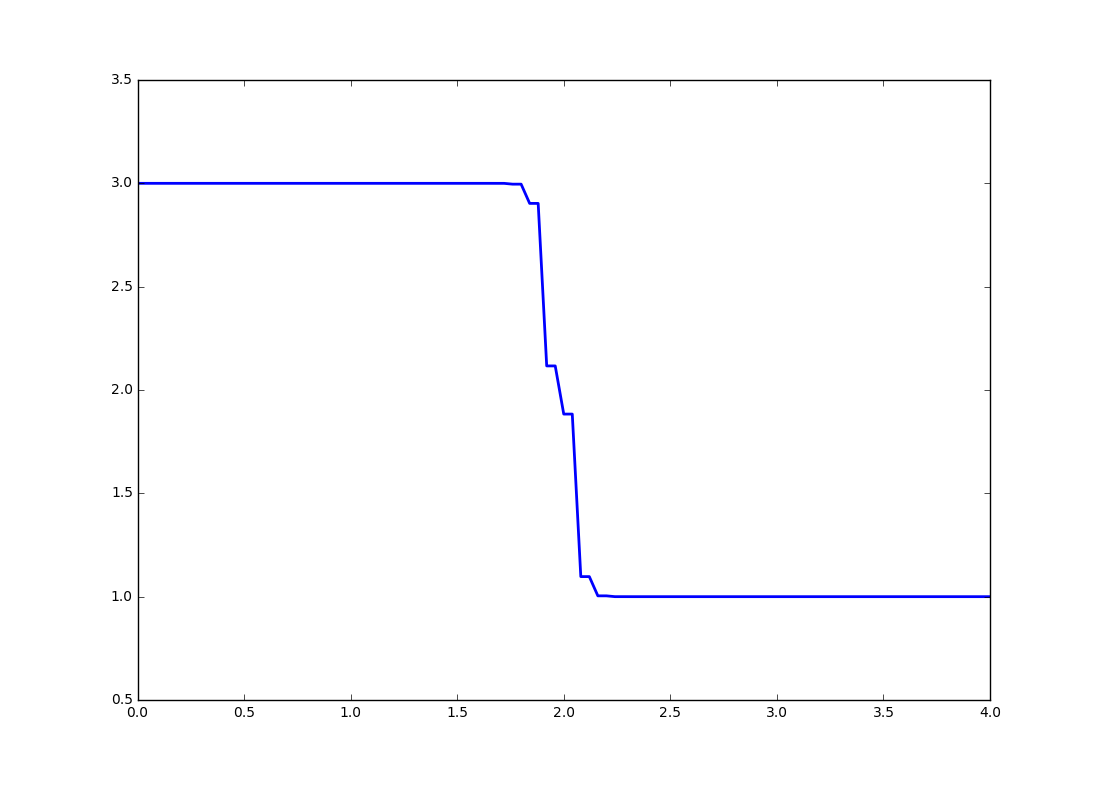
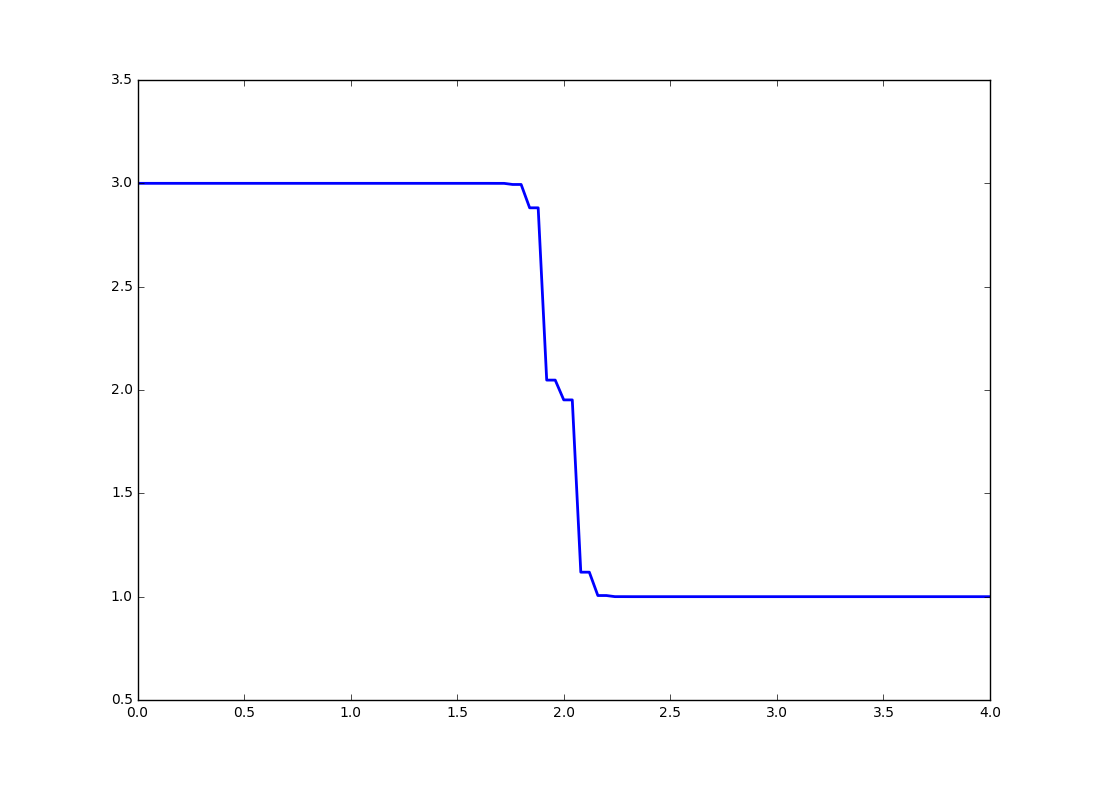
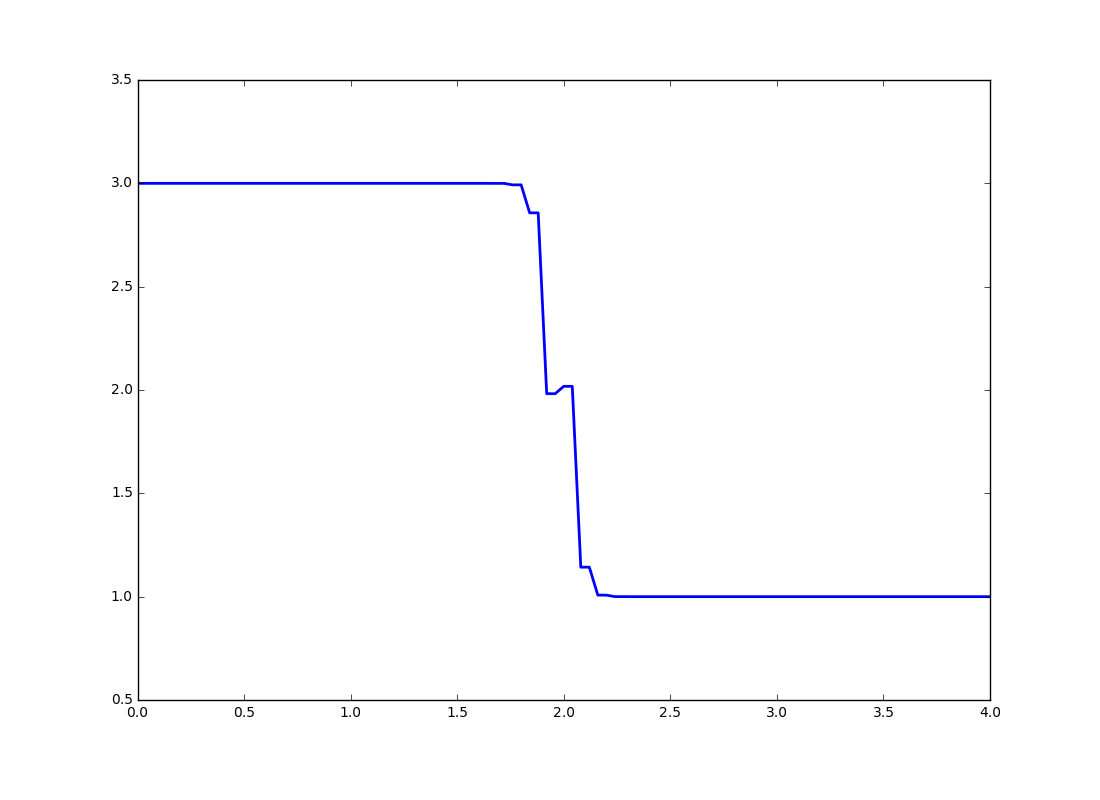
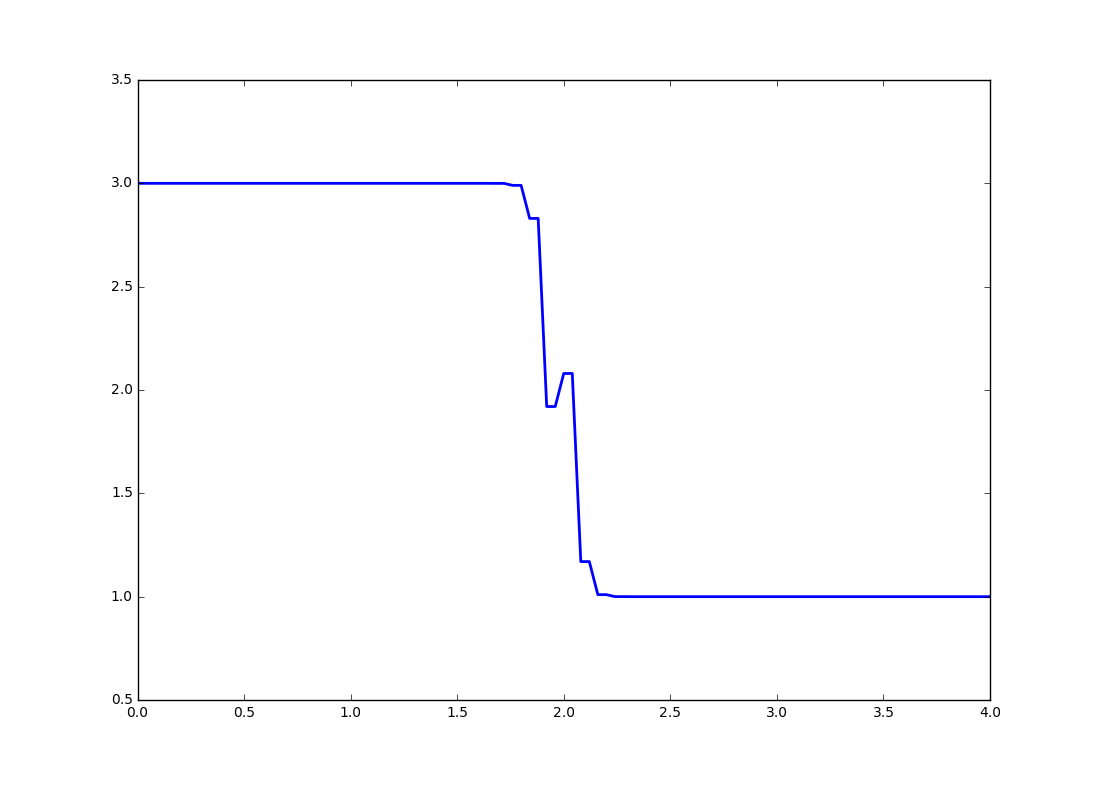
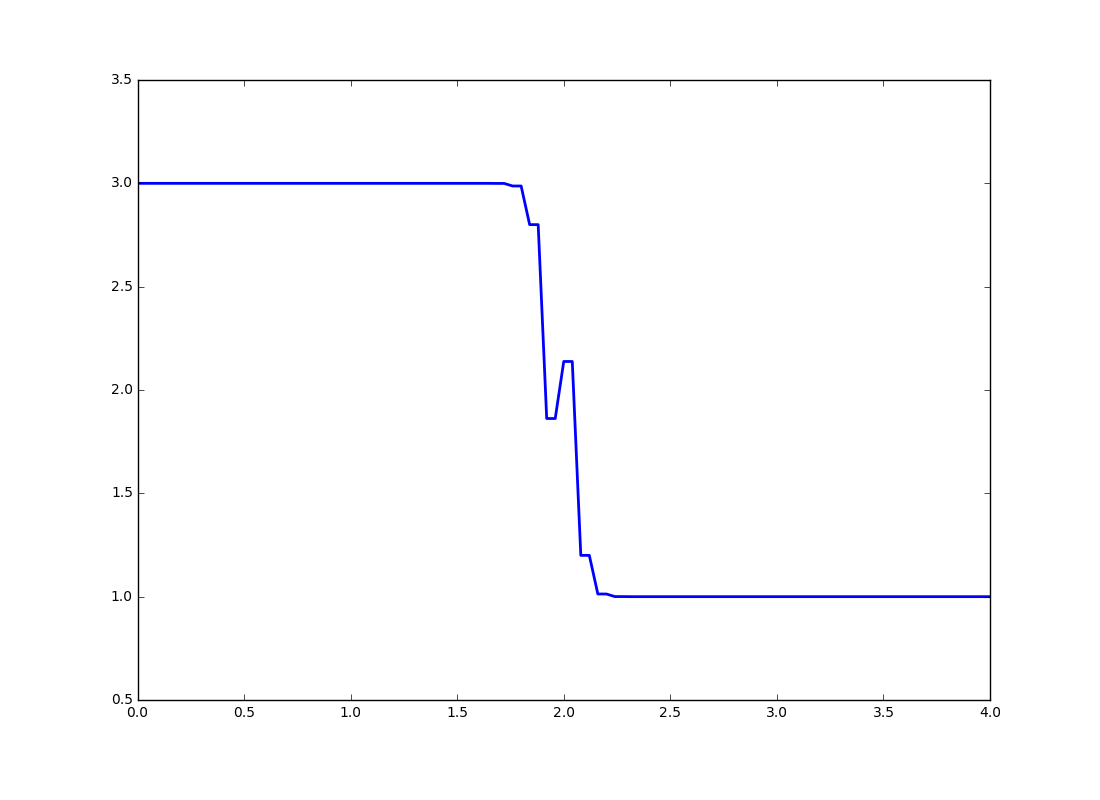
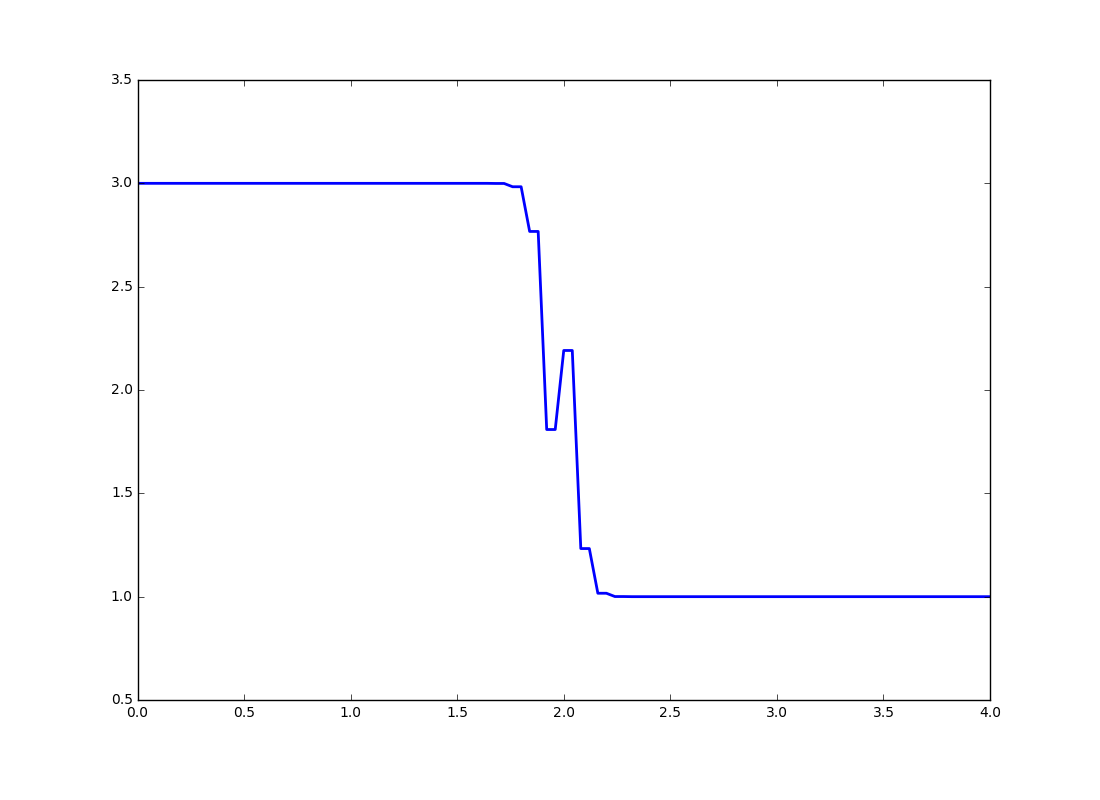
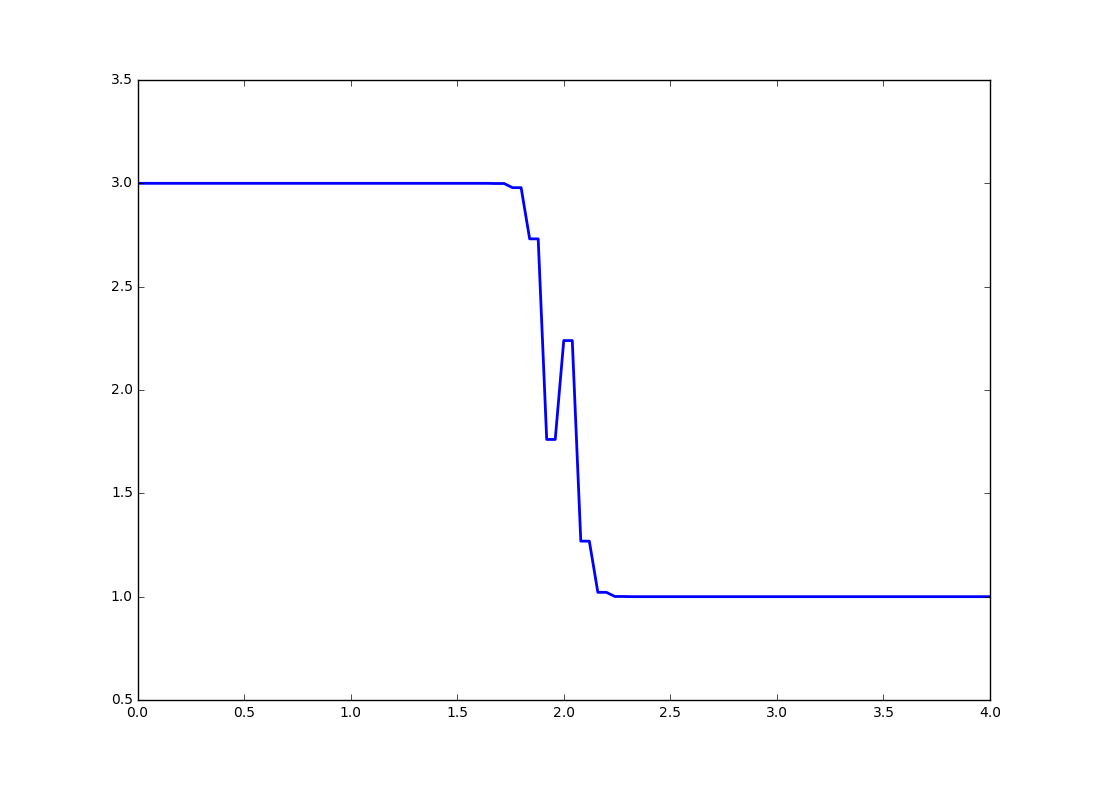
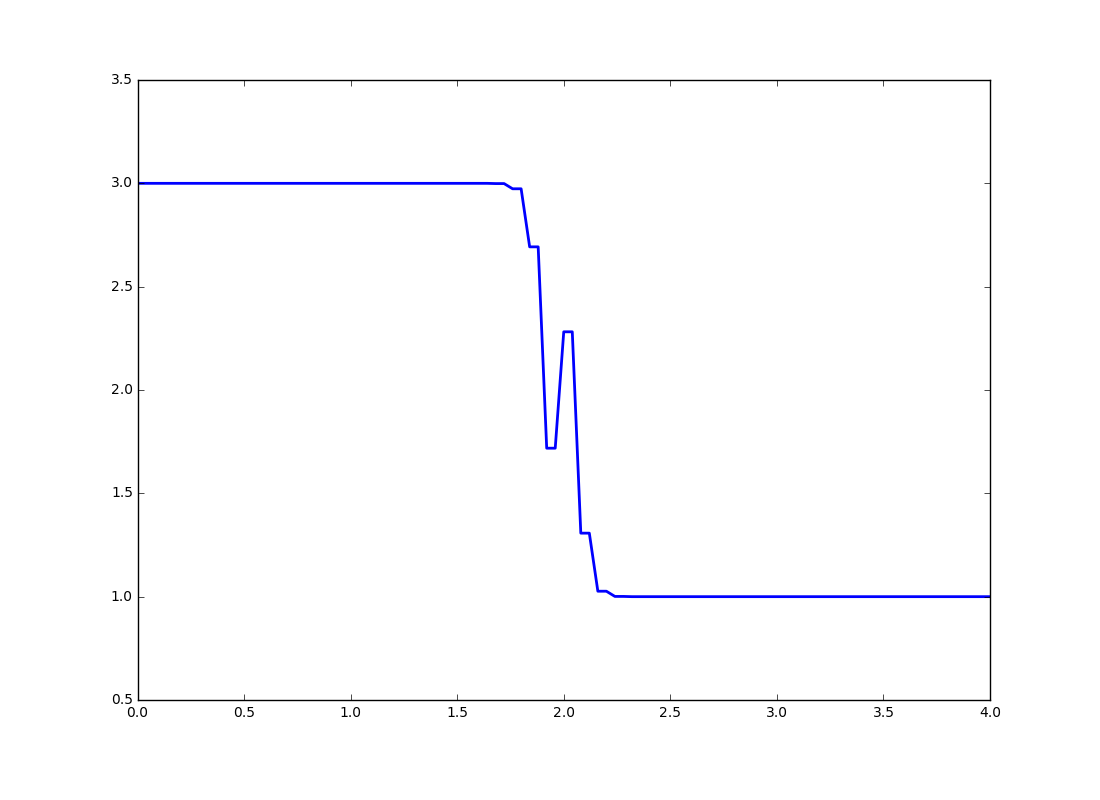
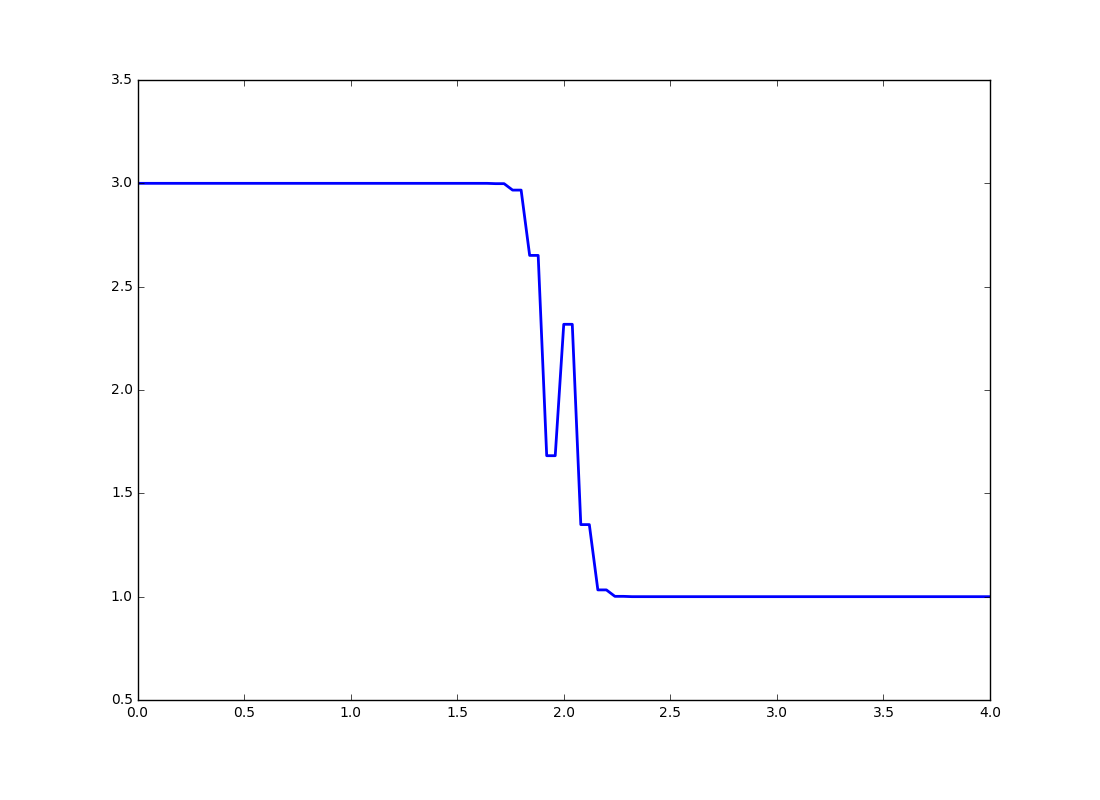
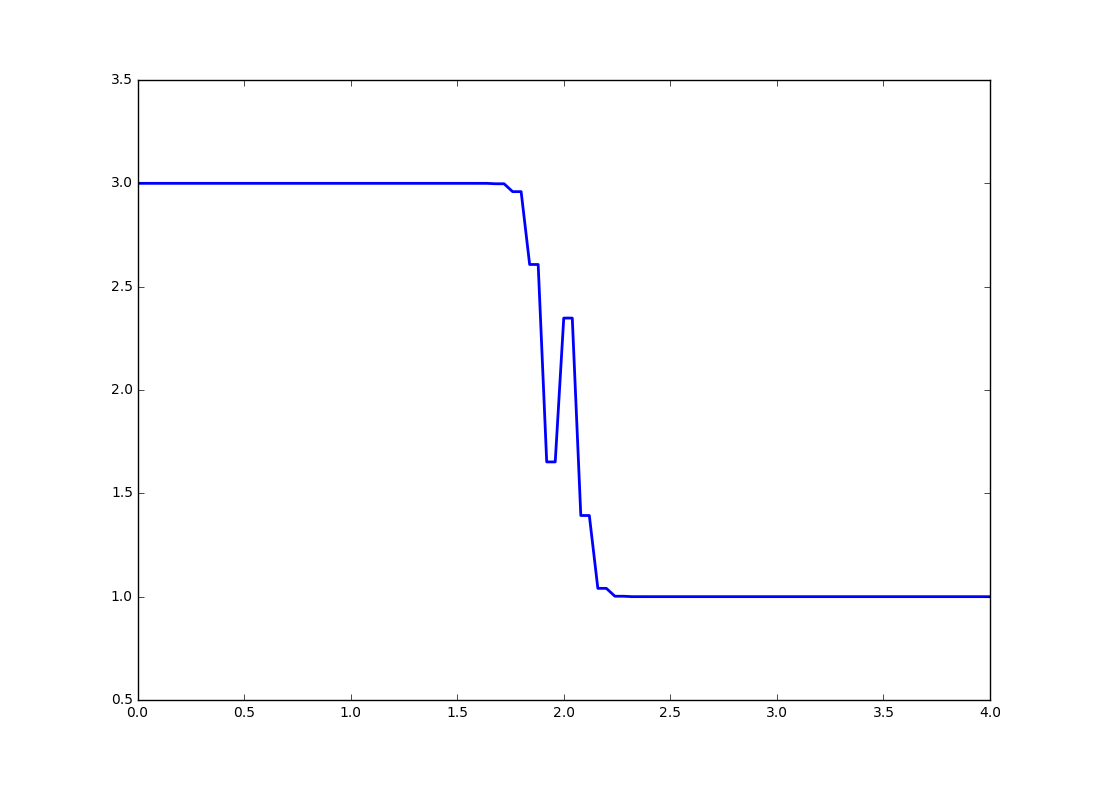
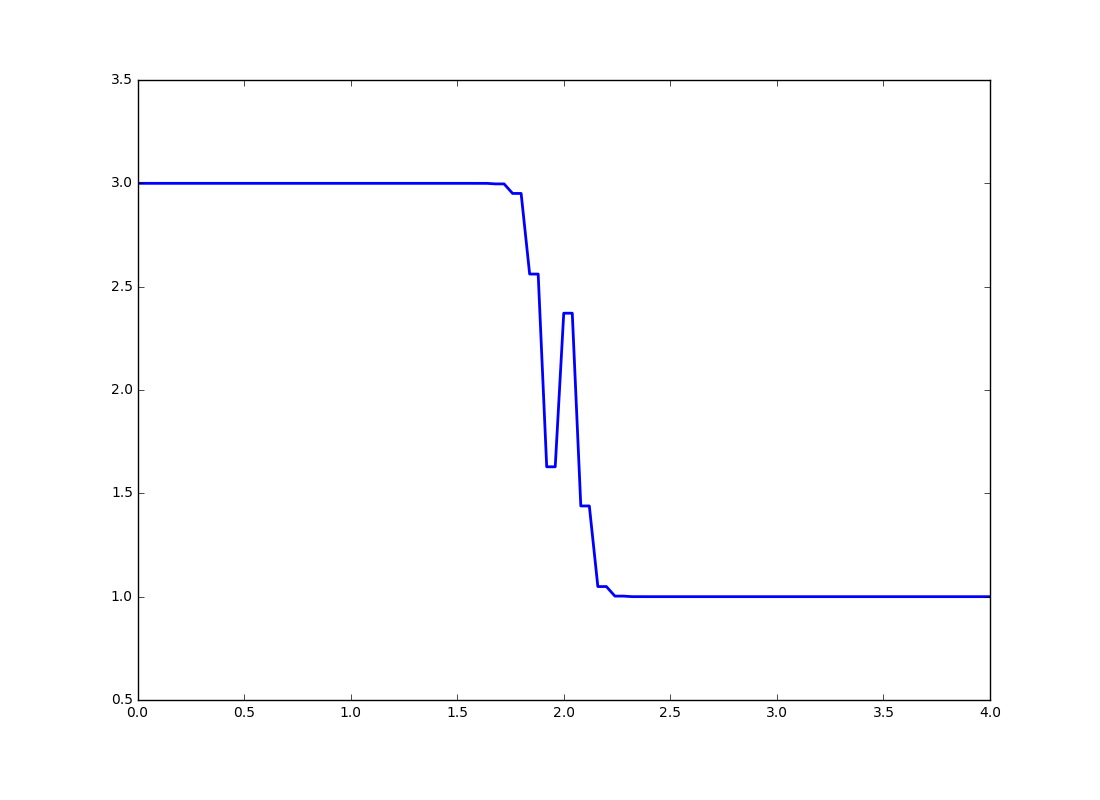
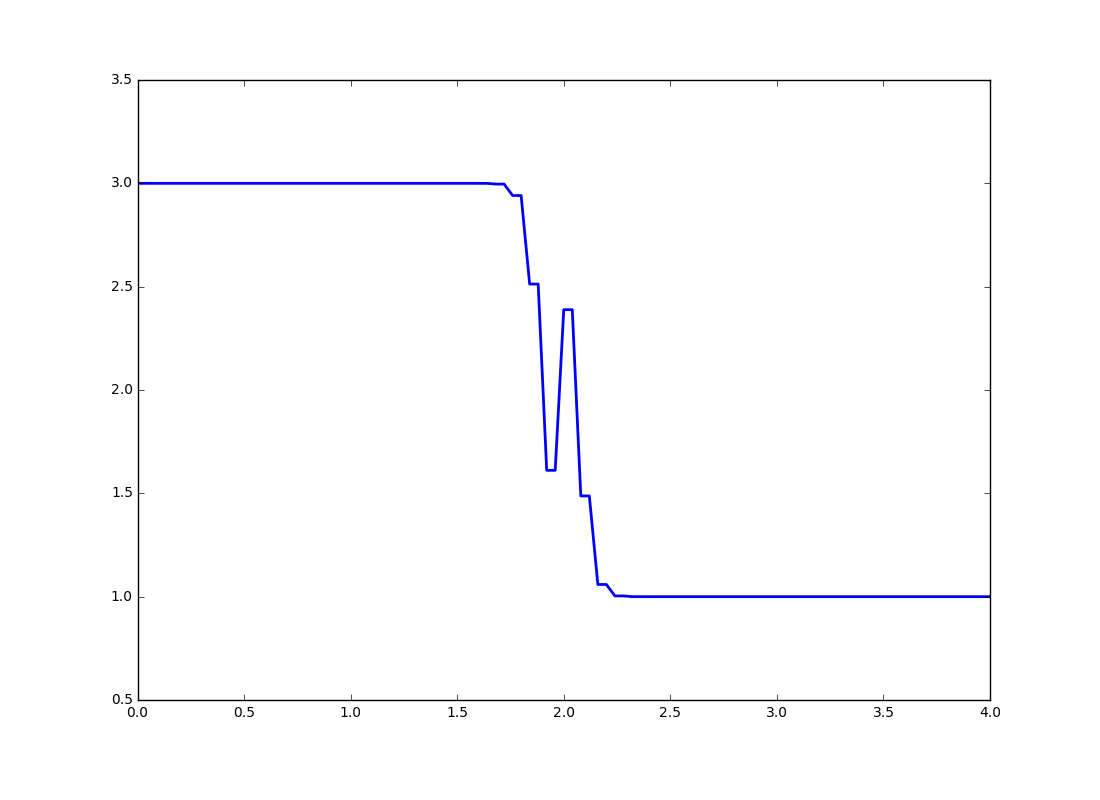
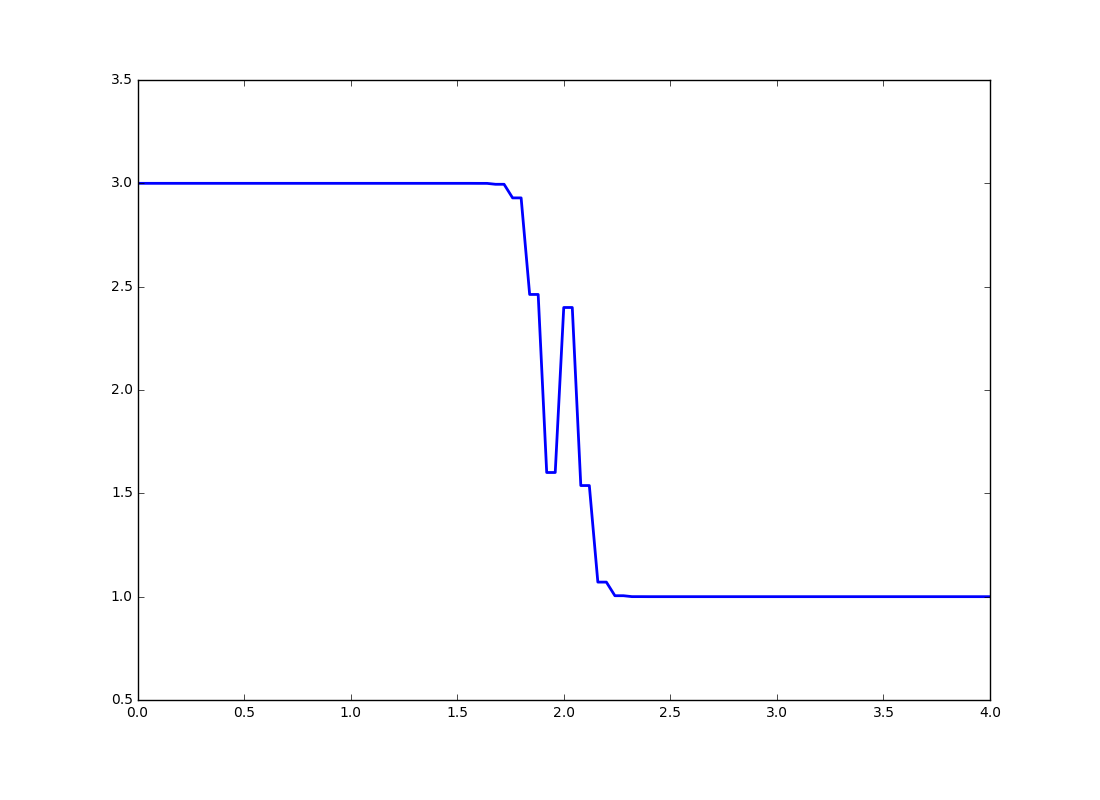
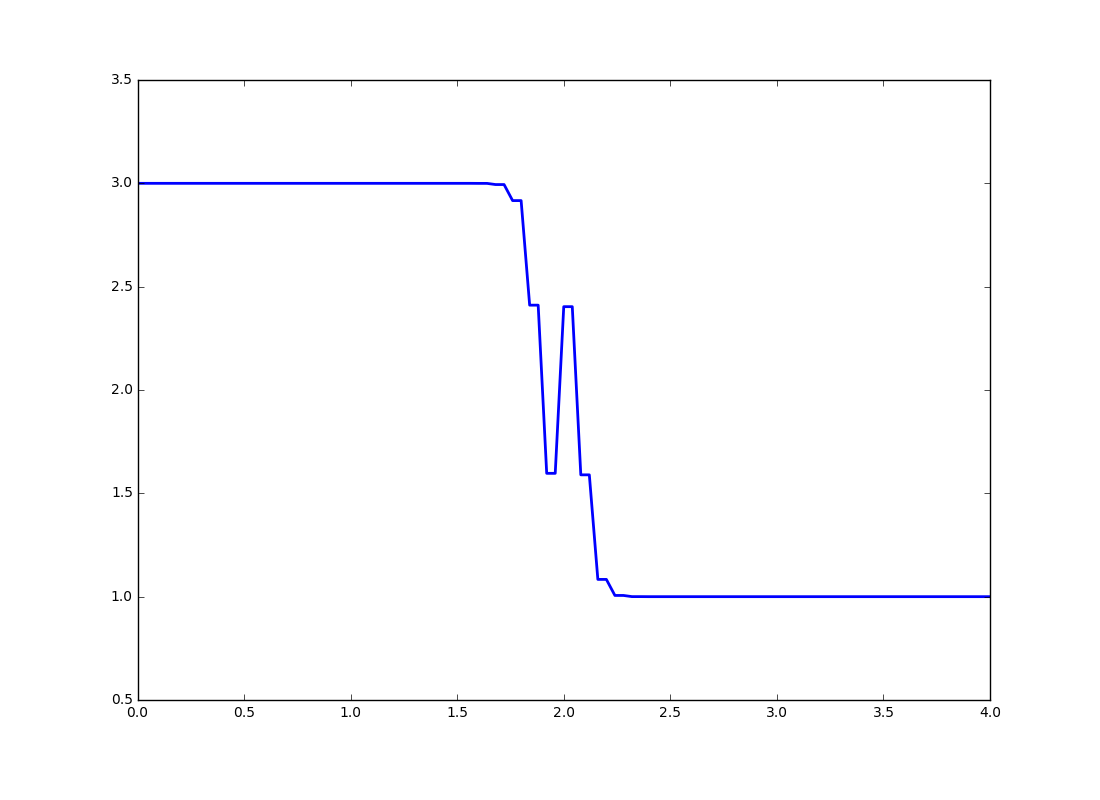
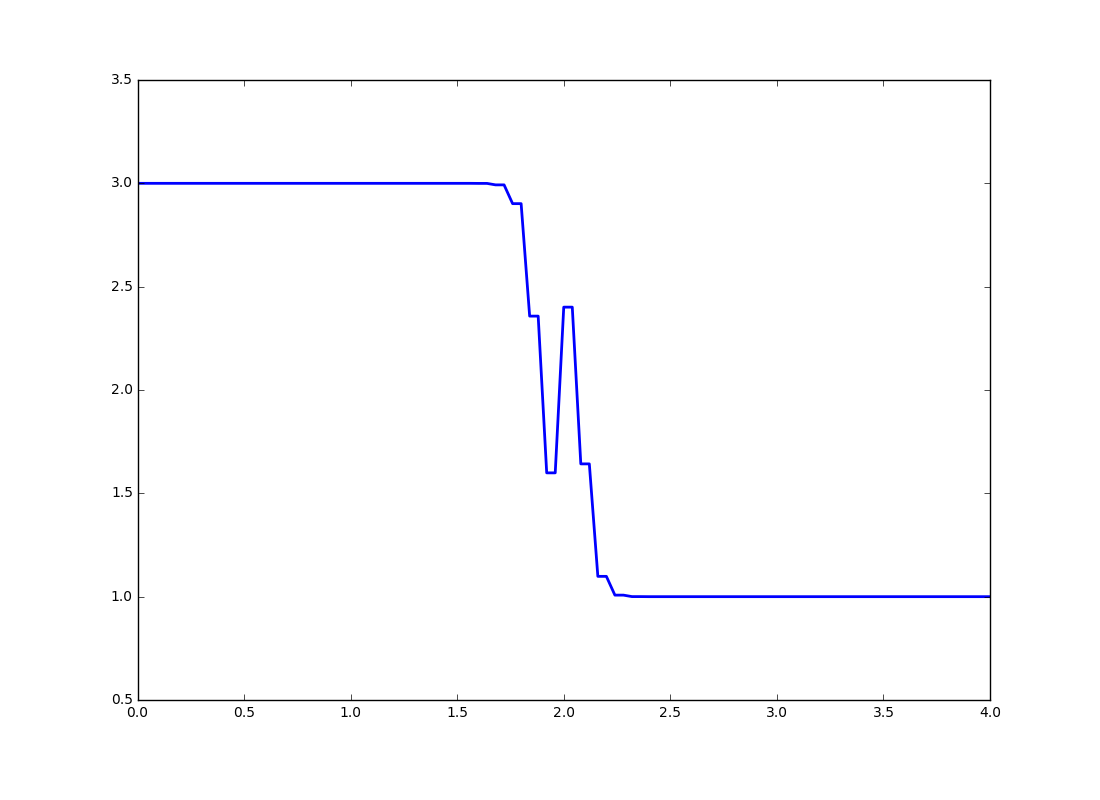
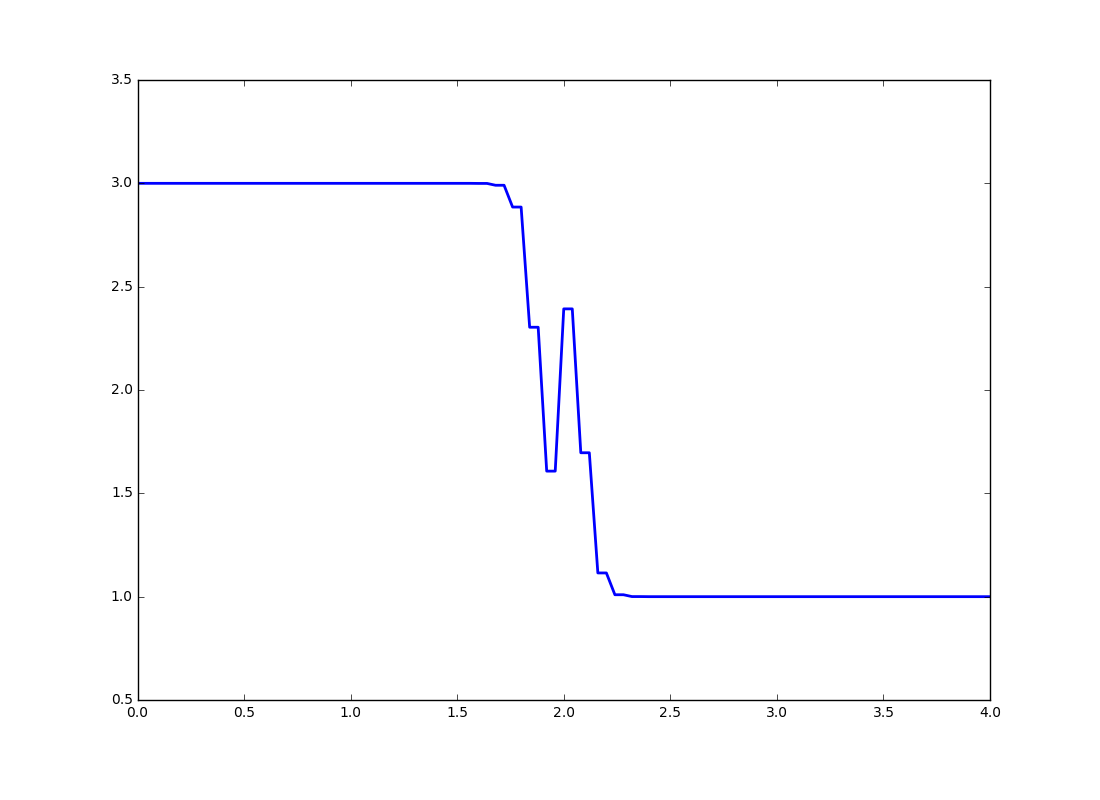
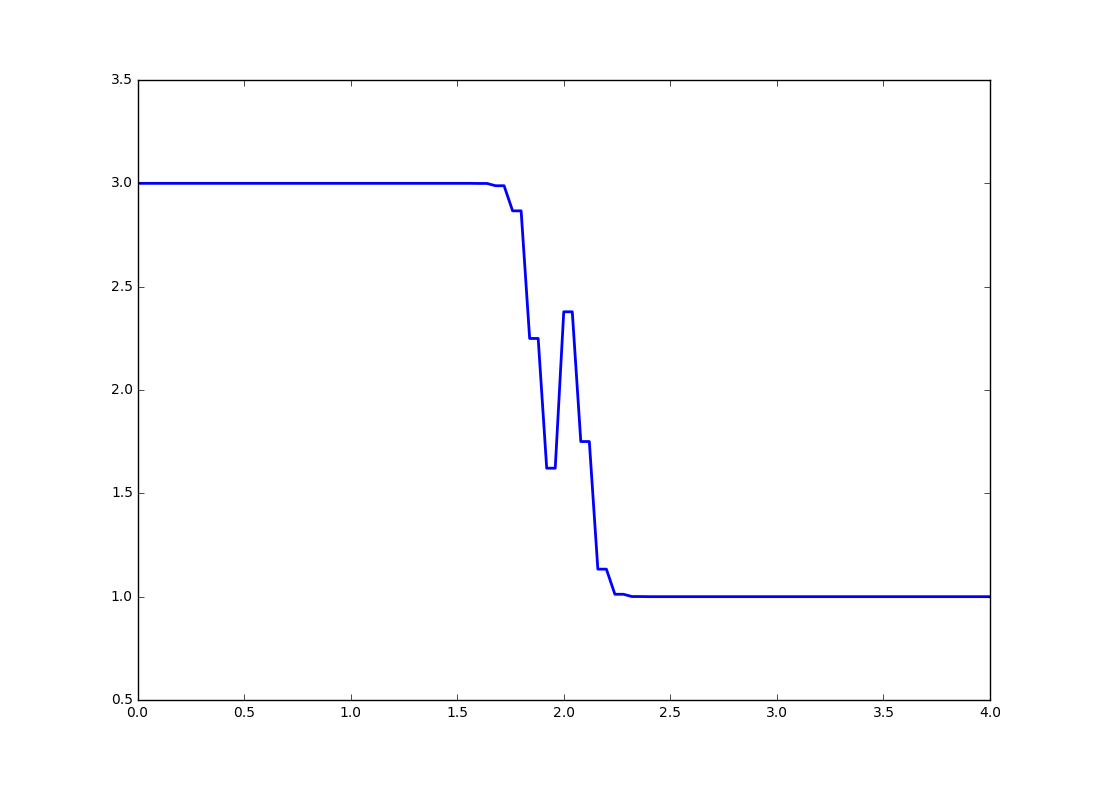
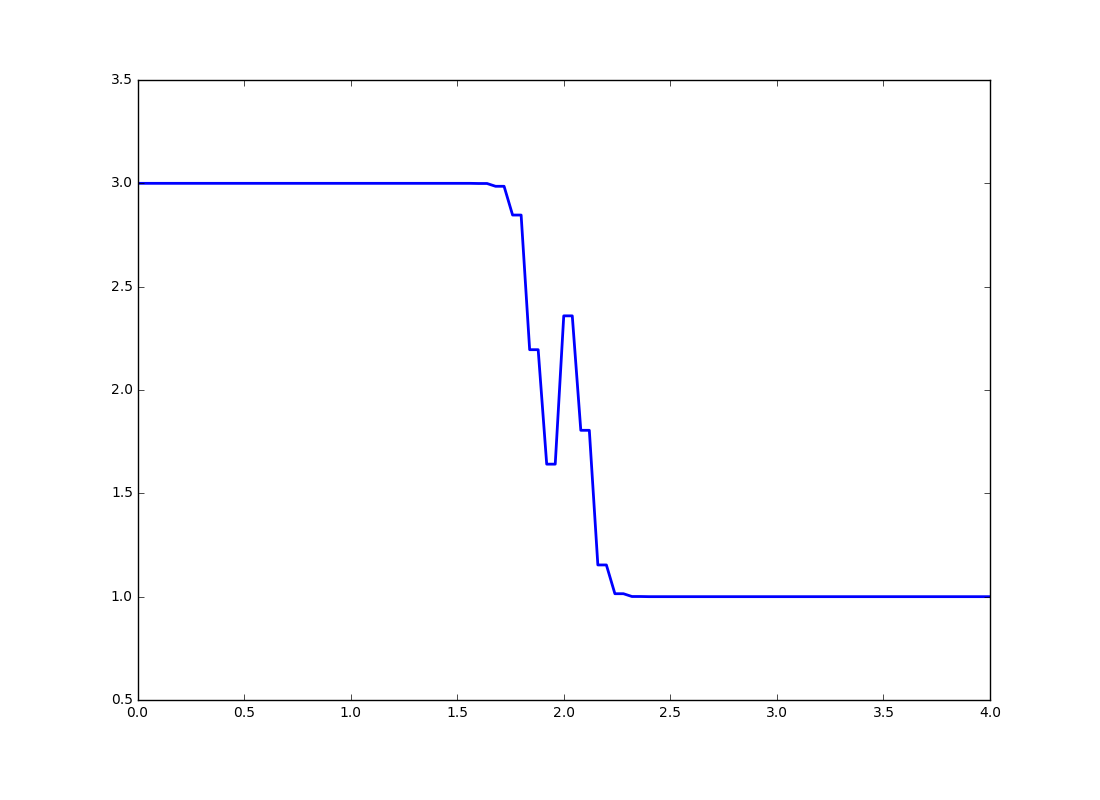
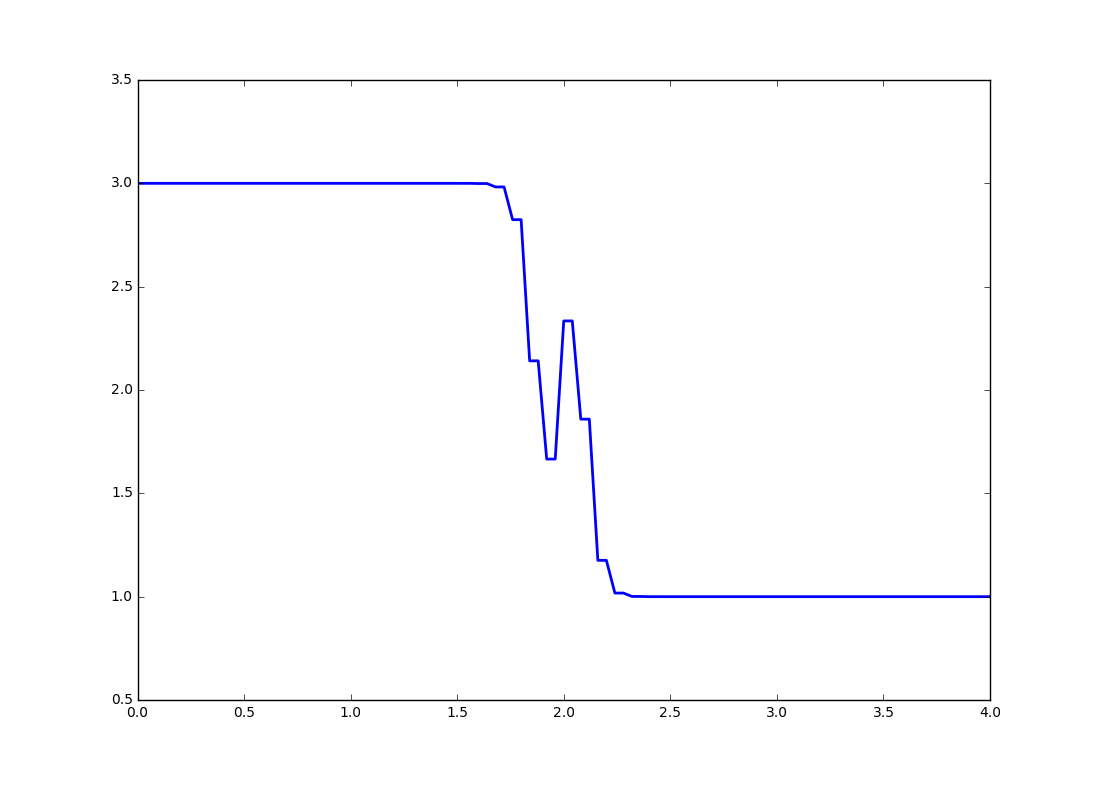
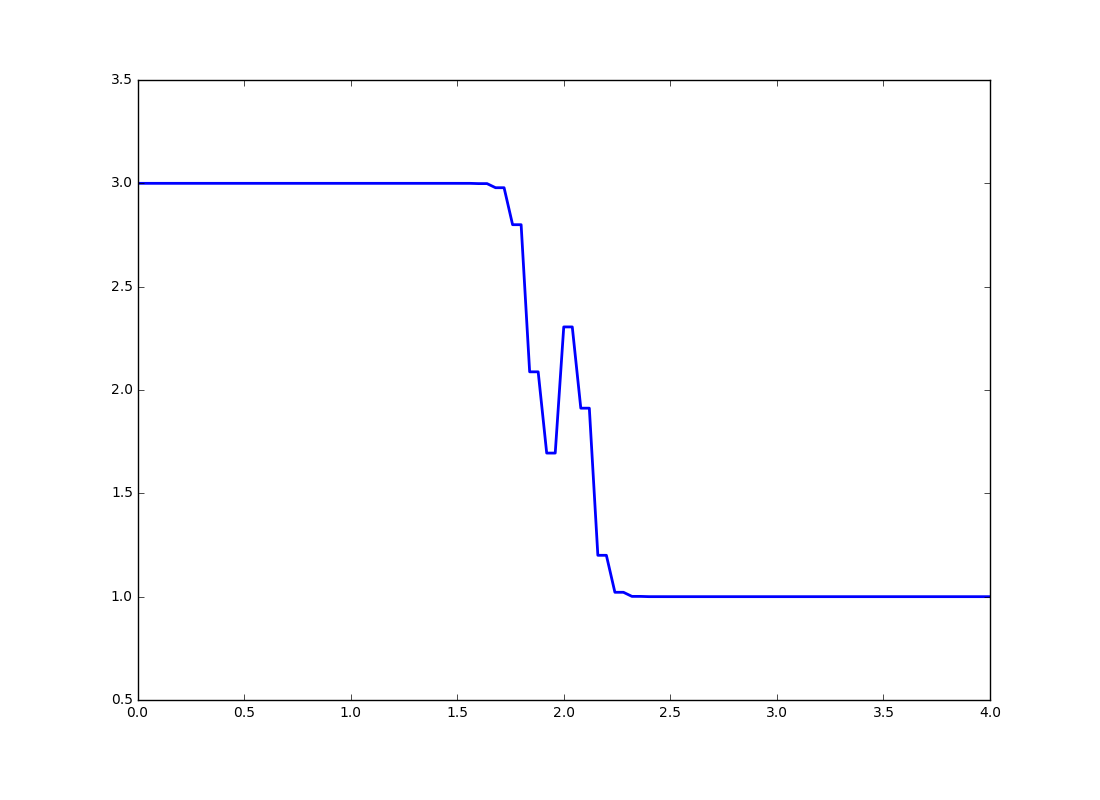
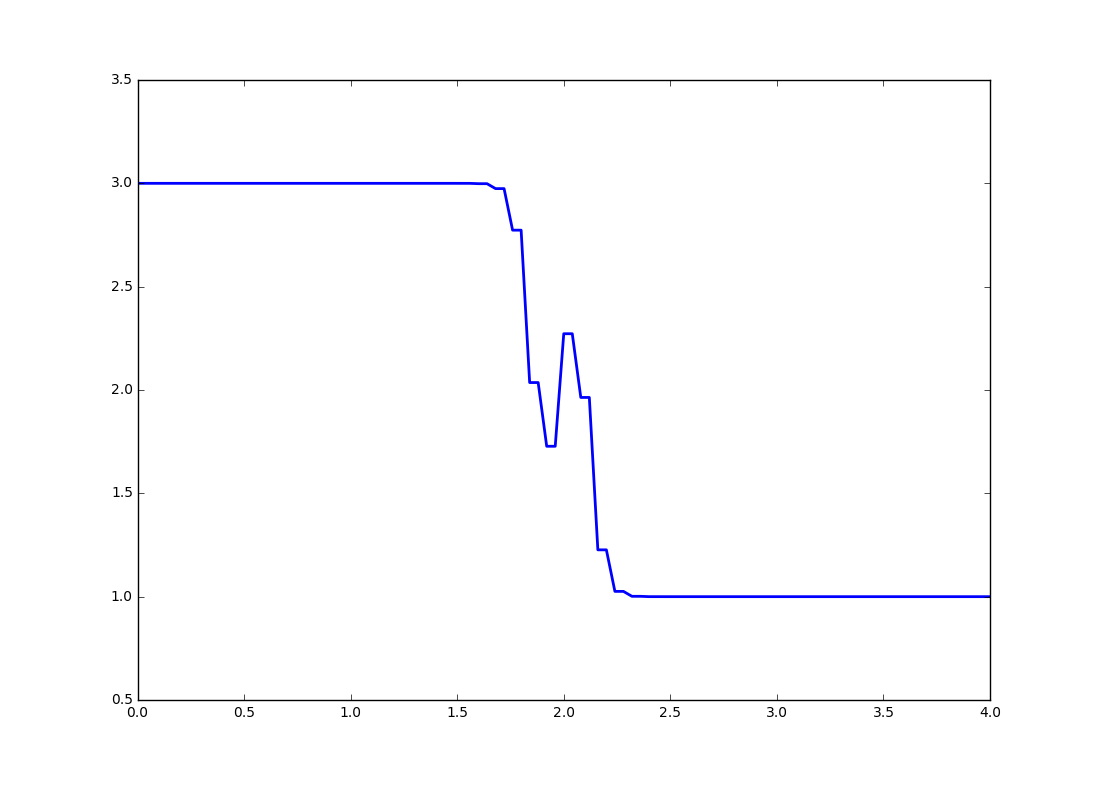
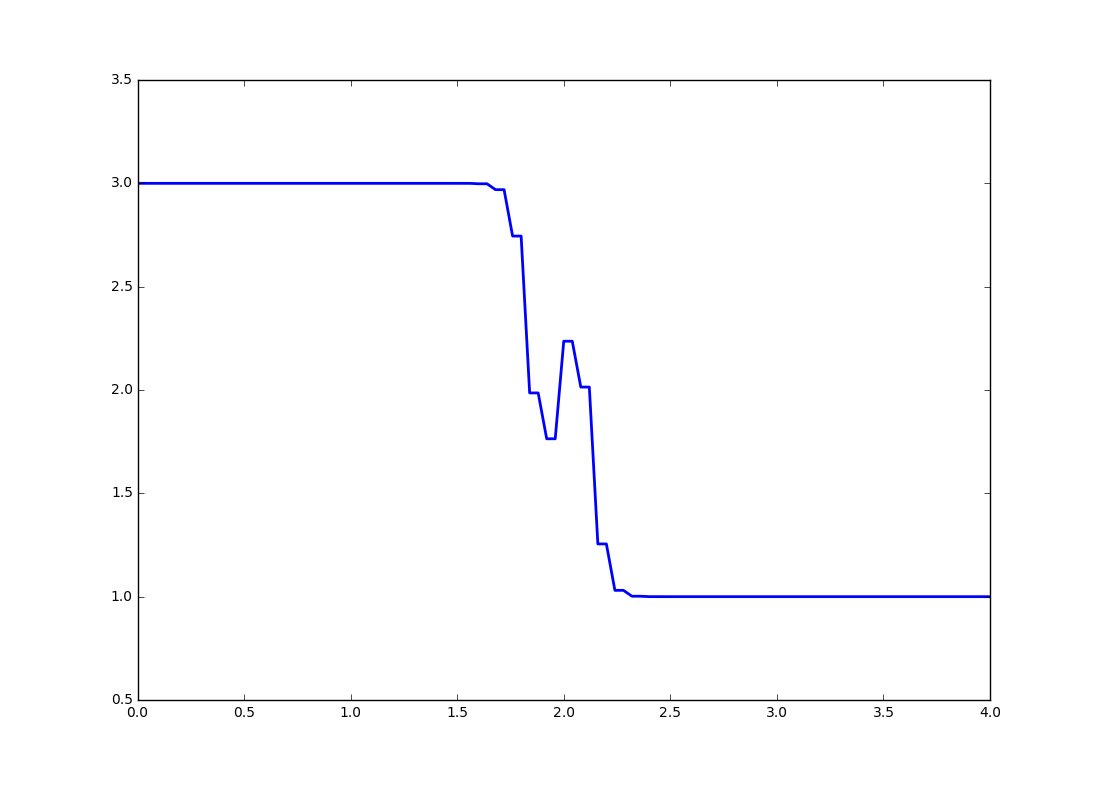
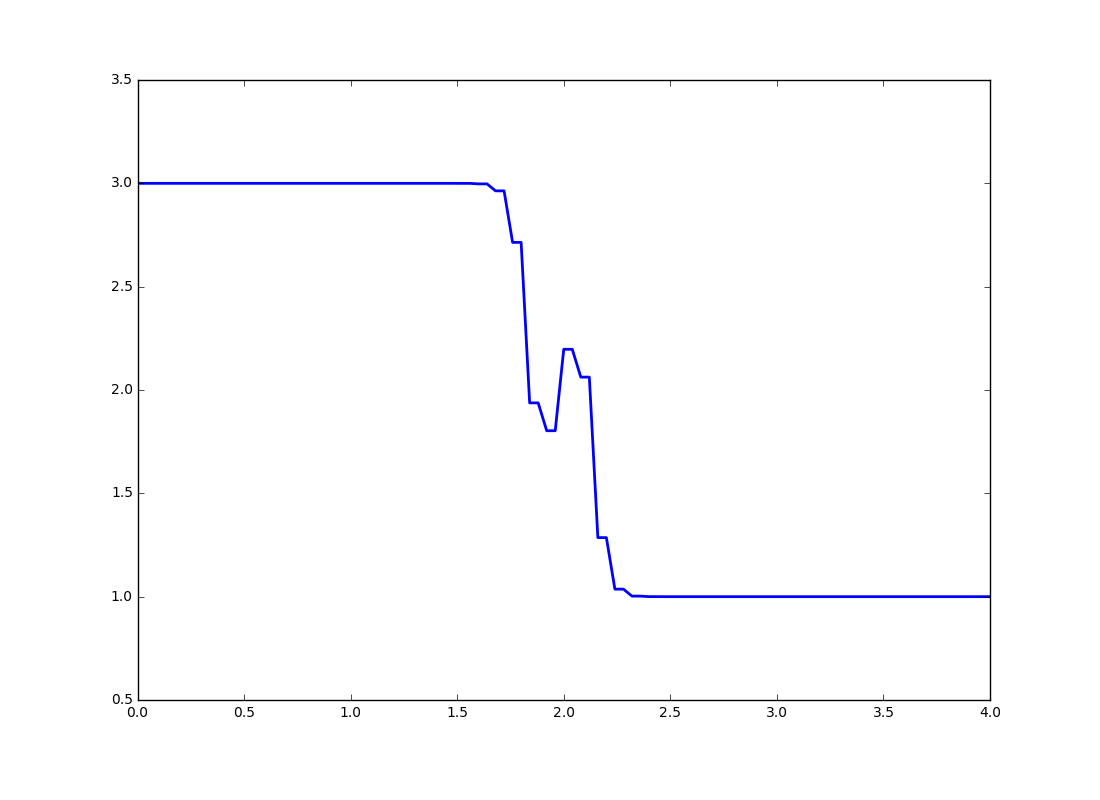
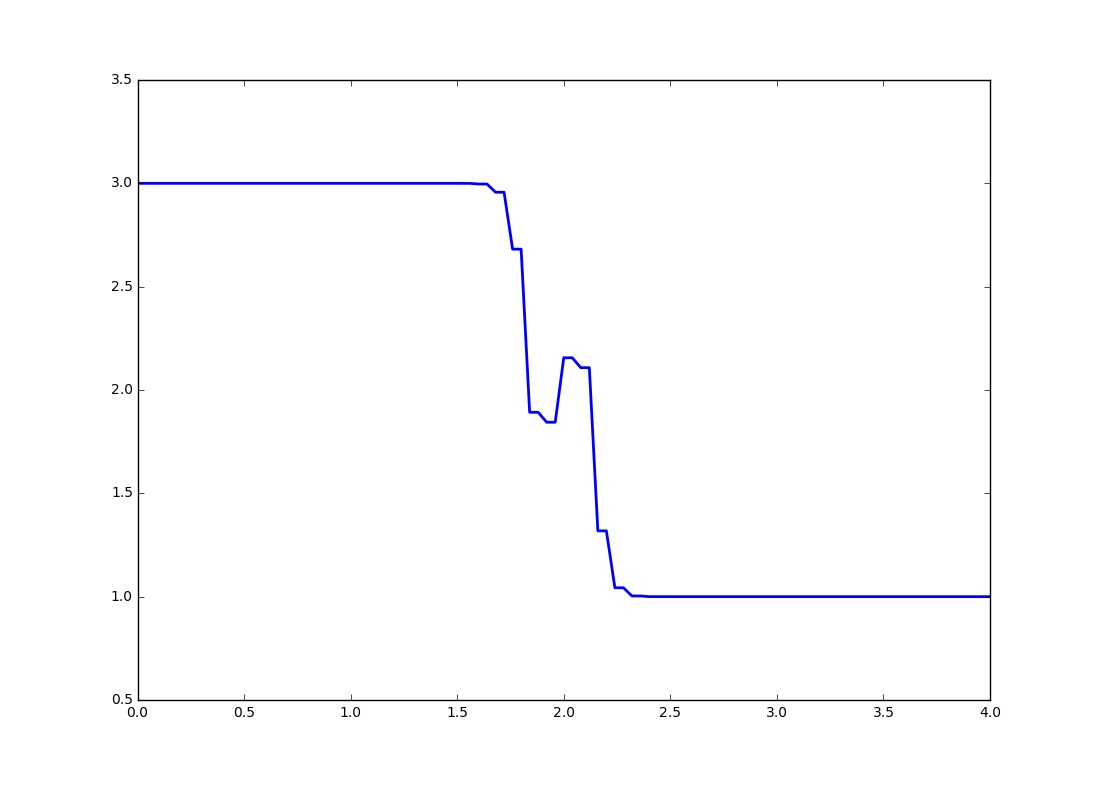
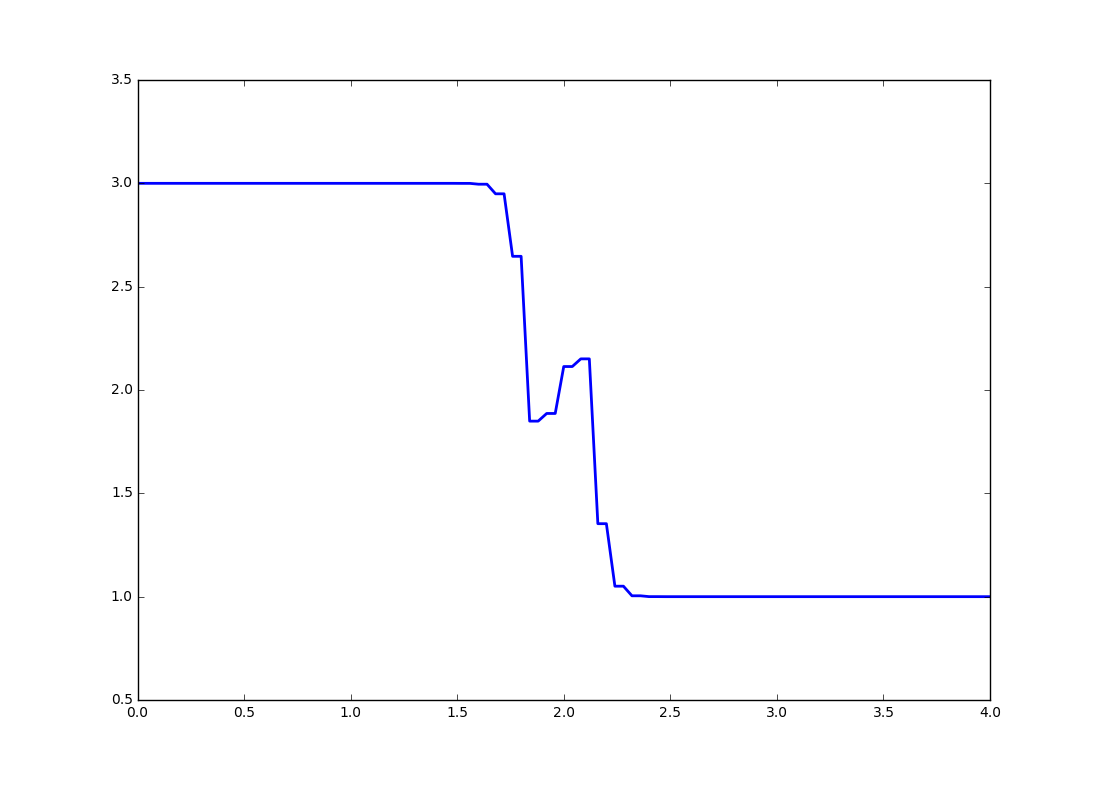
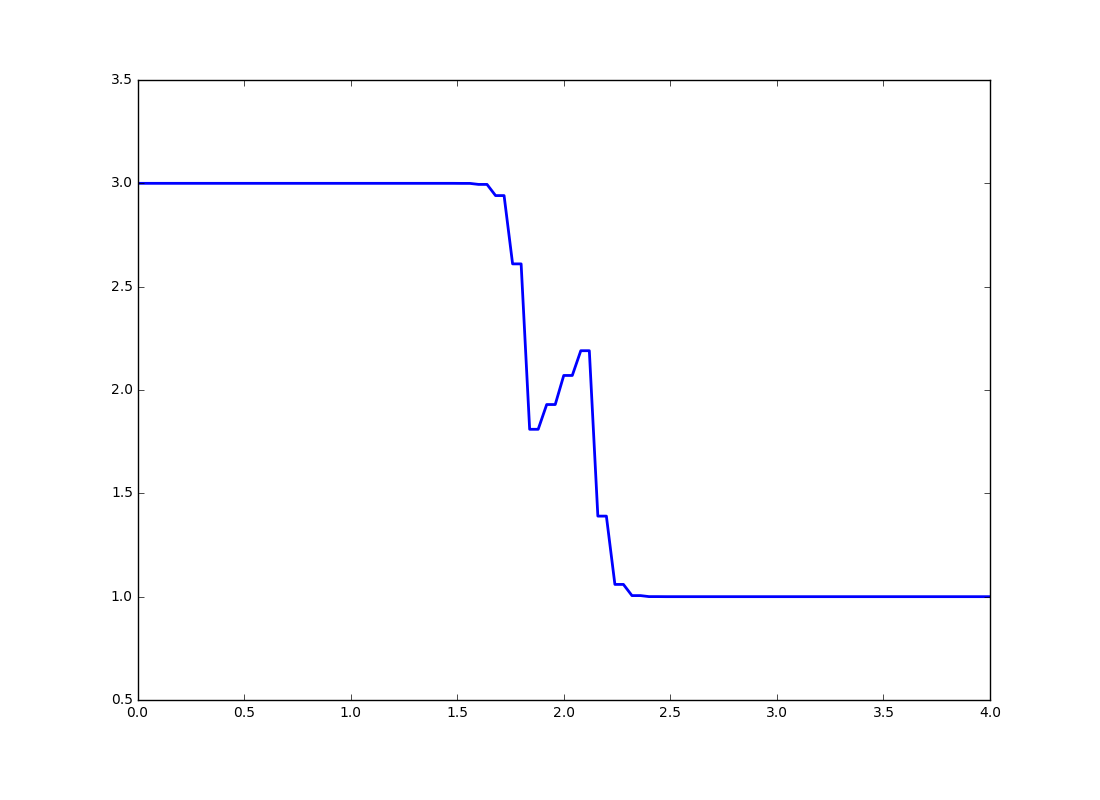
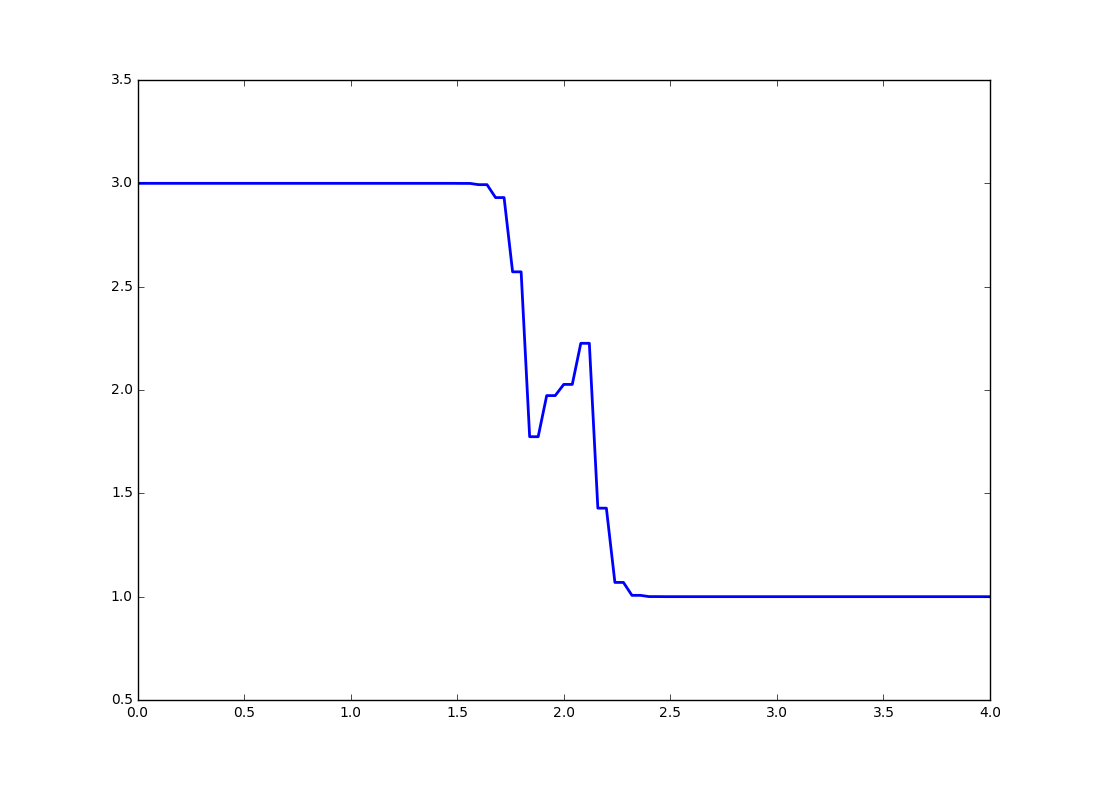
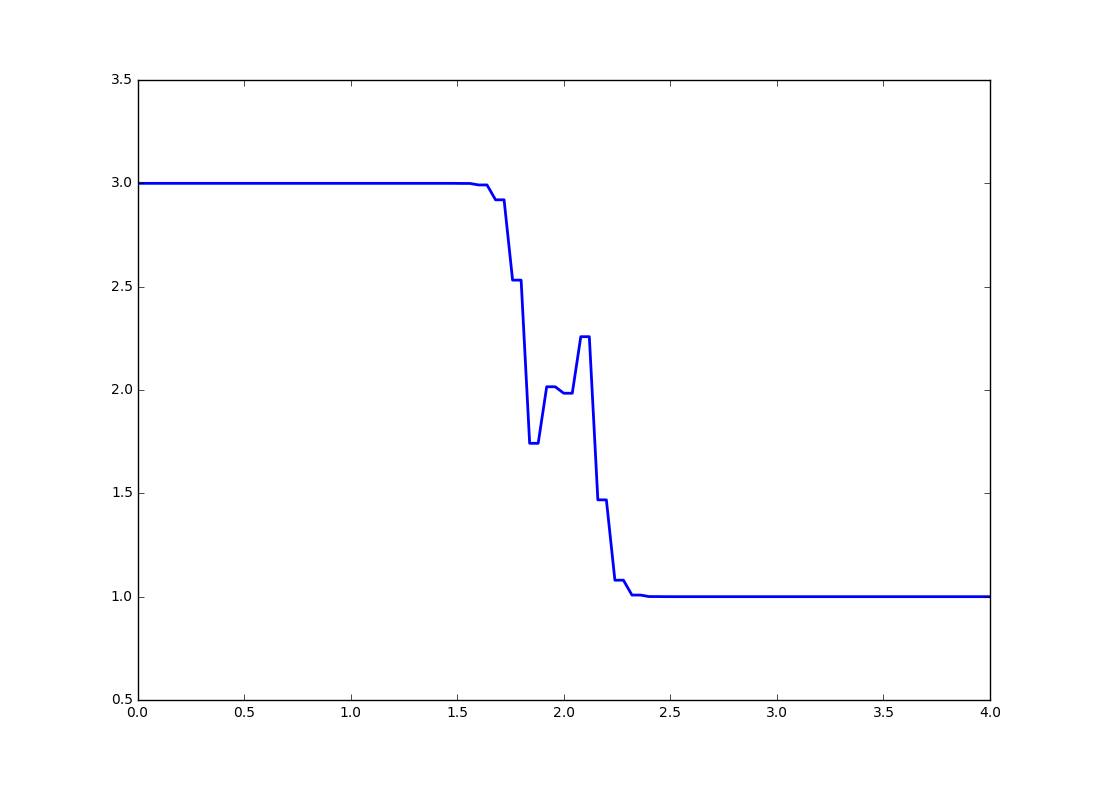
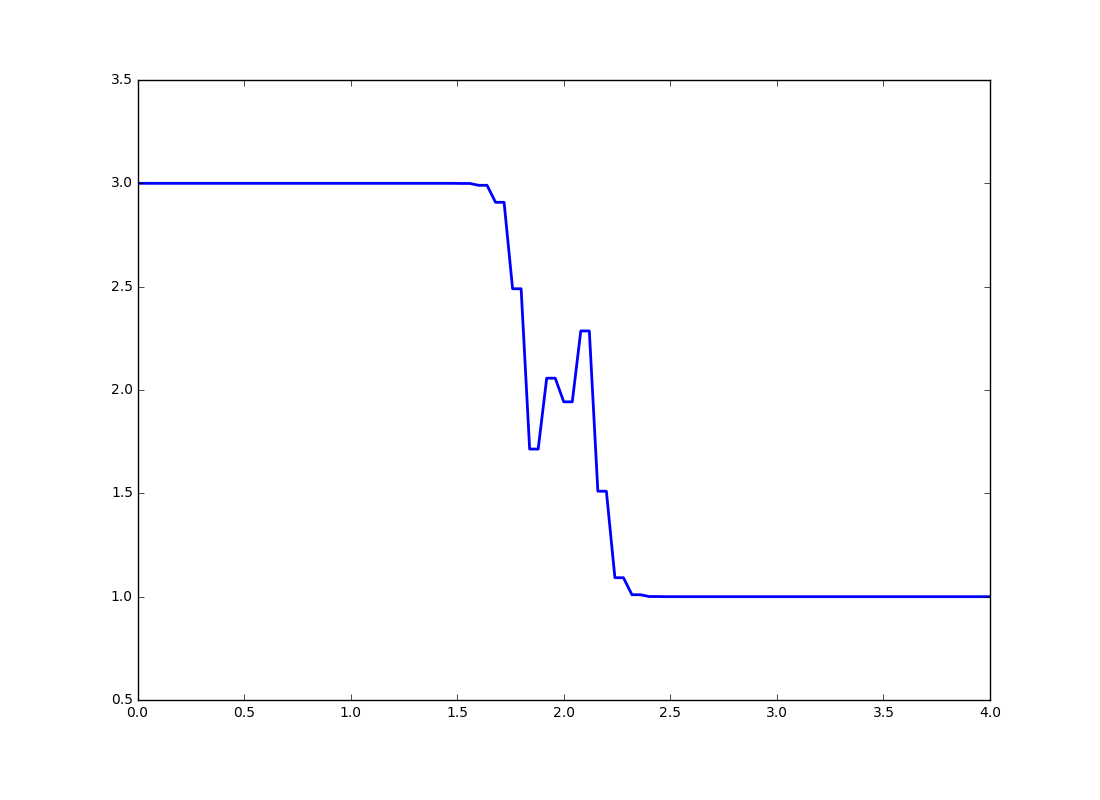
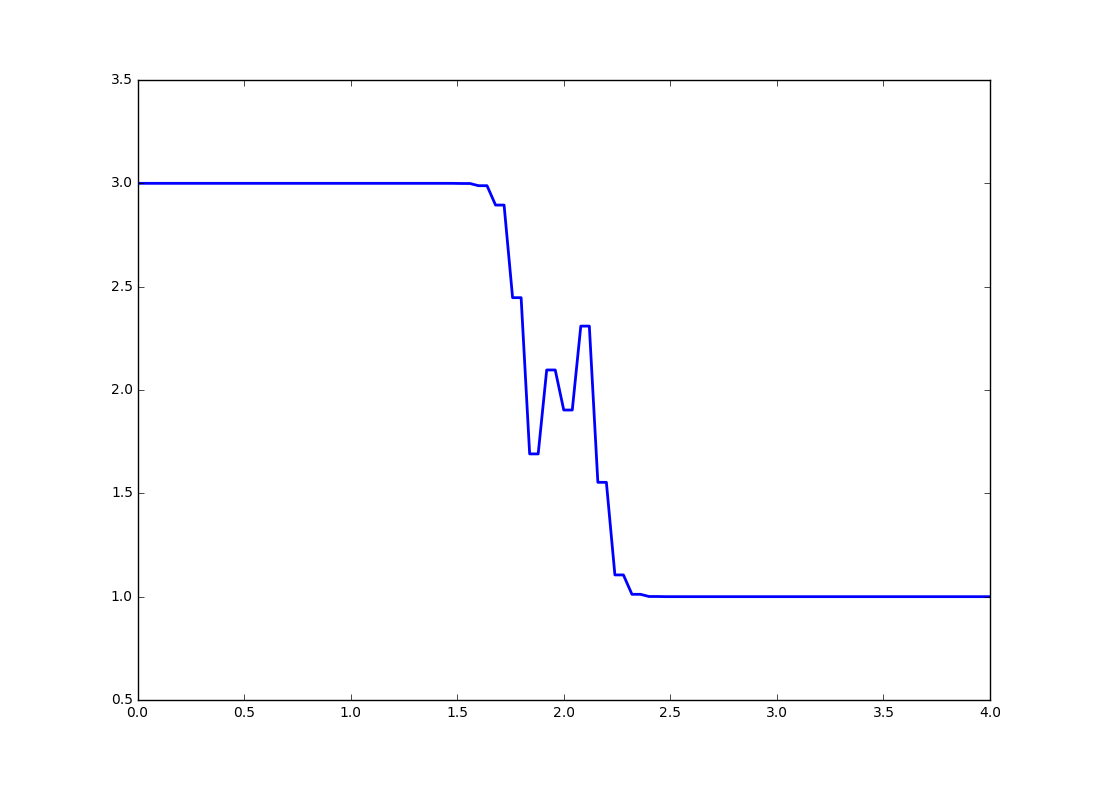
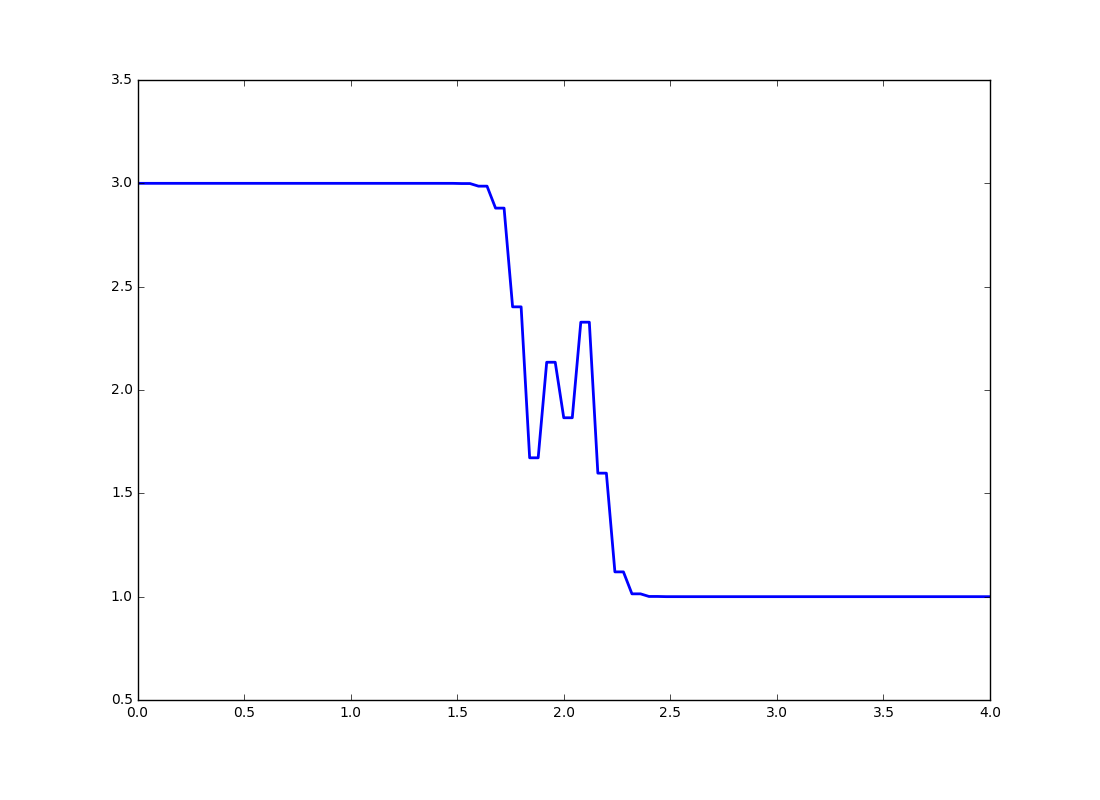
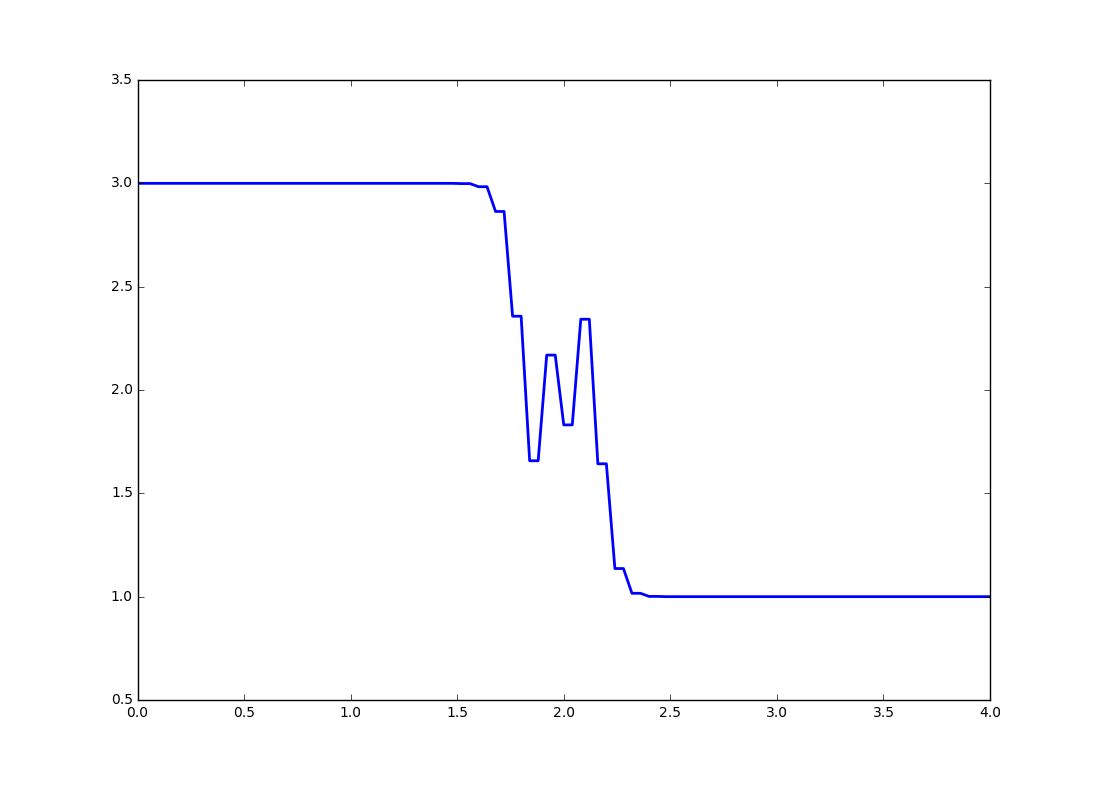

In [5]:
x = np.linspace(0,4,101)
fig = plt.figure(figsize=(11,8))
ax = plt.axes(xlim=(0,4), ylim=(0.5,3.5))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return line, 

def animate(i):
    line.set_data(x, python_1d_shallow(i, 101, 1, 40., 1))
    return line,

animation.FuncAnimation(fig, animate, init_func=init, frames=50, interval=10, blit=True)

# Exercise
Obviously FTCS is not a very good scheme for this problem (but we already knew this from the advection problem). I would like for you to do three things (PLEASE MAKE A BACKUP OF THIS FILE FIRST):

1\.  change the finite difference expression by using the functions provided in file "shallowwater_base.py". This means first importing the functions containted in the file with the command "from shallowwater_base import *", and then altering the code

2\. type up the code for the Lax-Wendroff scheme and

3\.  compare to the results obtained with this (FTCS) scheme
